In [2]:
import scipy.sparse.linalg as LA
from scipy import sparse
import matplotlib.pylab as plt

import py_plantbox as pb
from rb_tools import *

import xylem_flux 

import timeit

import numpy as np
from scipy.integrate import odeint



# Simulate a root system
name = "PMA2018"
plant = pb.Plant()
#sca = pb.Organ.getScalar('organtype')
plant.openXML(name)
plant.initialize()
ana = pb.SegmentAnalyser(plant)

#for i in range (0,180):
#    plant.simulate(i)
plant.simulate(30)
nodes = vv2a(plant.getNodes())/100 # convert from cm to m 
organtype = vv2a(plant.getNodes())
plant.write("../results/PMA.vtp",15)

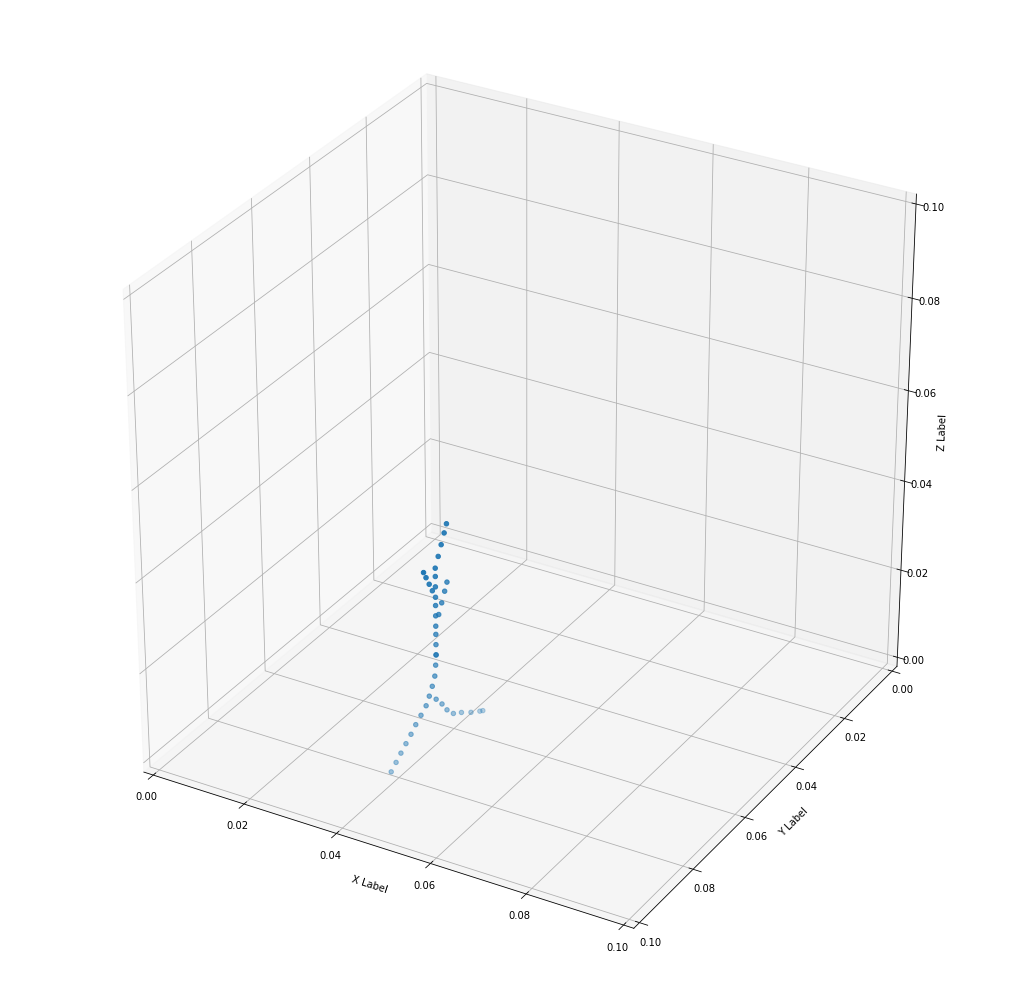

In [3]:


plt.rcParams['figure.figsize'] = [18, 18]


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =nodes[:,0]
y =nodes[:,1]
z =nodes[:,2]



#for i in range(len(nodes_cor)):
#    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(nodes_cor[i,1]),
#            markersize=12, color='black')


ax.scatter(x, y, z)
#ax.scatter([x[715]], [y[715]], [z[715]], c='r', s=99)
#ax.scatter([x[860]], [y[860]], [z[860]], c='g', s=99)
#ax.scatter([x[627]], [y[627]], [z[627]], c='g', s=99)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim3d(0, 0.1)
ax.set_ylim3d(0.1,0)
ax.set_zlim3d(0,0.1)
plt.show()

In [4]:
# Create graph
nodes = vv2a(plant.getNodes())/100 # convert from cm to m 
rseg = seg2a(plant.getSegments(15)) # root system segments
sseg = seg2a(plant.getSegments(4)) # strm system segments
lseg = v2ai(plant.getNodesOrganType())


plant_ana = pb.SegmentAnalyser(plant) 

nodes = vv2a(plant.getNodes())/100 # convert from cm to m 
node_connection = seg2a(plant.getSegments(15)) # plant segments
#sseg = seg2a(plant.getSegments(4)) #
node_organtype = v2ai(plant.getNodesOrganType())


nodes_with_organtype = np.column_stack([node_connection, node_organtype]) #make the node has organtype, to know the source sink relation

node_connection1, node_connection2 = np.split(node_connection.T,2)

node_connection1 = np.row_stack([node_connection1, node_organtype])
node_connection2 = np.row_stack([node_connection2, node_organtype])

nodes_organtype = np.column_stack([node_connection1,node_connection2])
_, indices = np.unique(nodes_organtype.T[:,0], return_index=True)
nodes_organtype = nodes_organtype.T[indices,:]
nodes_cor = np.column_stack([nodes_organtype, nodes])


#print(nodes_organtype)
#print(node_connection2)
#print(nodes_with_organtype)   
print(node_connection)

unq, unq_idx, unq_cnt = np.unique(node_connection, return_inverse=True, return_counts=True)
#print(unq) 

#print(unq_cnt) 

#print(len(nodes))
#print(len(unq))
 
#print(len(unq_cnt))
#print(len(node_connection))

#type = v2a(plant.getScalar(15,"subtype"))
#otype = v2a(plant.getScalar(15,"organtype"))
#print(otype)
#print(len(otype))


nodes_organtype = np.column_stack((nodes_organtype,unq_cnt ))
nodes_organtype.astype(np.int_)

node_connection.astype(np.int_)
print(len(node_connection))
print(len(nodes_organtype))
print(nodes_organtype)
print(node_connection)



stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)|(nodes_organtype[:,1]== 4)][:,0]
index_stem= list(range(1, len(stem_nodes)+1))
for i in range(len(stem_nodes)):
    index_stem[i] = np.where( node_connection[:,1] == stem_nodes[i])

for i in range(len(index_stem)-1):
    node_connection[index_stem[i+1][0][0]]=node_connection[index_stem[i+1][0][0]][::-1]
node_connection
index_stem

[[ 0  2]
 [ 2  3]
 [ 3  4]
 [ 4  5]
 [ 5 14]
 [14 15]
 [15 16]
 [16 17]
 [17 18]
 [18 19]
 [19 20]
 [20 21]
 [ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9 10]
 [10 11]
 [11 12]
 [12 13]
 [ 1 22]
 [22 23]
 [23 24]
 [24 29]
 [29 30]
 [30 31]
 [31 36]
 [36 37]
 [37 38]
 [24 25]
 [25 26]
 [26 27]
 [27 28]
 [31 32]
 [32 33]
 [33 34]
 [34 35]
 [38 39]
 [39 40]
 [40 41]
 [41 42]]
41
43
[[ 0  2  1]
 [ 1  4  1]
 [ 2  2  2]
 [ 3  2  2]
 [ 4  2  2]
 [ 5  2  3]
 [ 6  2  2]
 [ 7  2  2]
 [ 8  2  2]
 [ 9  2  2]
 [10  2  2]
 [11  2  2]
 [12  2  2]
 [13  2  1]
 [14  2  2]
 [15  2  2]
 [16  2  2]
 [17  2  2]
 [18  2  2]
 [19  2  2]
 [20  2  2]
 [21  2  1]
 [22  4  2]
 [23  4  2]
 [24  4  3]
 [25  8  2]
 [26  8  2]
 [27  8  2]
 [28  8  1]
 [29  4  2]
 [30  4  2]
 [31  4  3]
 [32  8  2]
 [33  8  2]
 [34  8  2]
 [35  8  1]
 [36  4  2]
 [37  4  2]
 [38  8  2]
 [39  8  2]
 [40  8  2]
 [41  8  2]
 [42  8  1]]
[[ 0  2]
 [ 2  3]
 [ 3  4]
 [ 4  5]
 [ 5 14]
 [14 15]
 [15 16]
 [16 17]
 [17 18]
 [18 19]
 [19 20]
 [20 21]

[(array([], dtype=int64),),
 (array([20]),),
 (array([21]),),
 (array([22]),),
 (array([29]),),
 (array([30]),),
 (array([31]),),
 (array([32]),),
 (array([23]),),
 (array([24]),),
 (array([25]),),
 (array([33]),),
 (array([34]),),
 (array([35]),),
 (array([36]),),
 (array([26]),),
 (array([27]),),
 (array([28]),),
 (array([37]),),
 (array([38]),),
 (array([39]),),
 (array([40]),)]

In [70]:
root_nodes

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [77]:
# file-output.py



Nt = len(nodes)-1
Nc = len(node_connection)

#condition = ==0
#print(nodes_organtype[:,0])
nodes_organtype[1,2] =2
nodes_organtype[1,1] =1
node_connection[0,0] =1

N1L_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & ((nodes_organtype[:,1] ==8)|(nodes_organtype[:,1] ==4)  ) & (nodes_organtype[:,2] ==1 )]

N1L_c_nd = list(range(1, len(N1L_node)+1))
N1L_conn = list(range(1, len(N1L_node)+1))
for i in range(len(N1L_node)):
    N1L_c_nd[i] = node_connection[(node_connection[:,0] == N1L_node[i][0])]
    N1L_conn[i] = np.where( node_connection[:,1] == N1L_c_nd[i][0,1])[0]


N1R_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & (nodes_organtype[:,1] ==2 ) & (nodes_organtype[:,2] ==1 )]
N1R_c_nd = list(range(1, len(N1R_node)+1))
N1R_conn = list(range(1, len(N1R_node)+1))
for i in range(len(N1R_node)):
    N1R_c_nd[i] = node_connection[(node_connection[:,1] == N1R_node[i][0])]
    N1R_conn[i] = np.where( node_connection[:,1] == N1R_c_nd[i][0,1])[0]
N1R_r_abs = 1e-025

N2_node = nodes_organtype[ (nodes_organtype[:,2] ==2 )]

# #print(N2_node)
# N2_c_nd_1 = list(range(1, len(N2_node)+1))
# N2_conn_1 = list(range(1, len(N2_node)+1))
# for i in range(len(N2_node)):
#     if N2_node[i,1] == 2 or N2_node[i,1] == 1:
#         N2_c_nd_1[i] = node_connection[(node_connection[:,0] == N2_node[i,0])]
#         N2_conn_1[i] = np.where( node_connection[:,0] == N2_c_nd_1[i][0,0])[0]
#     else:
#         N2_c_nd_1[i] = node_connection[(node_connection[:,0] == N2_node[i,0])]
#         N2_conn_1[i] = np.where( node_connection[:,0] == N2_c_nd_1[i][0,0])[0]

# #temp= N2_c_nd_1[0]
# #temp=temp[::-1] 
# #print(temp )
# N2_c_nd_2 = list(range(1, len(N2_node)+1))
# N2_conn_2 = list(range(1, len(N2_node)+1))

# for i in range(len(N2_node)):
#     if N2_node[i,1] == 2 or N2_node[i,1] == 1:
#         N2_c_nd_2[i] = node_connection[(node_connection[:,1] == N2_node[i,0])]
#     else:
#         N2_c_nd_2[i] = node_connection[(node_connection[:,1] == N2_node[i,0])]
# #N2_c_nd_2[0] = np.array([temp]) 
# #print(N2_c_nd_2)
# for i in range(len(N2_node)):
#     N2_conn_2[i] = np.where( node_connection[:,1] == N2_c_nd_2[i][0][0])[0]

# N2_conn_2[0]=[0-(np.where( node_connection[:,0] == 1))[0][1]-2]


################## Nodes With 2 Connections #########################
N2_c_nd_1 = list(range(1, len(N2_node)+1))
N2_conn_1 = list(range(1, len(N2_node)+1))
for i in range(len(N2_node)):
    N2_c_nd_1[i] = node_connection[(node_connection[:,0] == N2_node[i,0])]
    N2_conn_1[i] = np.where( node_connection[:,0] == N2_c_nd_1[i][0,0])[0]


#temp= N2_c_nd_1[0]
#temp=temp[::-1] 
#print(temp )

N2_c_nd_2 = list(range(1, len(N2_node)+1))
N2_conn_2 = list(range(1, len(N2_node)+1))

for i in range(len(N2_node)):
    N2_c_nd_2[i] = node_connection[(node_connection[:,1] == N2_node[i,0])]
    N2_conn_2[i] = np.where( node_connection[:,1] == N2_c_nd_2[i][0][1])[0]

    

################## Nodes With 3 Connections #########################
N3_node = nodes_organtype[ (nodes_organtype[:,2] ==3 )]
print(N3_node)

N3_c_nd_1 = list(range(1, len(N3_node)+1))
N3_conn_1 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_1[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][0][0]
        N3_conn_1[i] = 0-np.where( node_connection[:,0] == N3_c_nd_1[i])[0][0]-1
    else:
        N3_c_nd_1[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][0][1]
        N3_conn_1[i] = np.where( node_connection[:,1] == N3_c_nd_1[i])[0][0]+1

N3_c_nd_2 = list(range(1, len(N3_node)+1))
N3_conn_2 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_2[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][0][1]
        N3_conn_2[i] = np.where( node_connection[:,1] == N3_c_nd_2[i])[0][0]+1
    else:
        N3_c_nd_2[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][0][0]
        N3_conn_2[i] = 0-np.where( node_connection[:,0] == N3_c_nd_2[i])[0][0]-1

N3_c_nd_3 = list(range(1, len(N3_node)+1))
N3_conn_3 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_3[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][1][1]
        N3_conn_3[i] = np.where( node_connection[:,1] == N3_c_nd_3[i])[0][0]+1
    else:
        N3_c_nd_3[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][1][0]
        N3_conn_3[i] = 0-np.where( node_connection[:,0] == N3_c_nd_3[i])[0][0]-1
# for i in range(len(N3_node)):
#     print(N3_c_nd_3[i][1,1])
#for i in range(len(N3_node)):
#    print(N3_conn_3[i][0]+1)
# N3_node = nodes_organtype[ (nodes_organtype[:,2] ==3 )]
# #print(N3_node)

# N3_c_nd_1 = list(range(1, len(N3_node)+1))
# N3_conn_1 = list(range(1, len(N3_node)+1))
# for i in range(len(N3_node)):
#     N3_c_nd_1[i] = node_connection[(node_connection[:,1] == N3_node[i,0])]
#     N3_conn_1[i] = np.where( node_connection[:,0] == N3_c_nd_1[i][0,0])[0]

# #print(len(N3_c_nd_1))
# #print(len(N3_conn_1))
# #for i in range(len(N3_node)):
# #    print(N3_c_nd_1[i][0,0])
# #for i in range(len(N3_node)):
# #    print(N3_conn_1[i][0]+1)
    
    
# N3_c_nd_2 = list(range(1, len(N3_node)+1))
# N3_conn_2 = list(range(1, len(N3_node)+1))
# for i in range(len(N3_node)):
#     N3_c_nd_2[i] = node_connection[(node_connection[:,0] == N3_node[i,0])]
#     N3_conn_2[i] = np.where( node_connection[:,1] == N3_c_nd_2[i][0,1])[0]

# #print(len(N3_c_nd_2))
# #print(len(N3_conn_2))
# #for i in range(len(N3_node)):
# #    print(N3_c_nd_2[i][0,1])
# #for i in range(len(N3_node)):
# #    print(N3_conn_2[i][0]+1)
    
# N3_c_nd_3 = list(range(1, len(N3_node)+1))
# N3_conn_3 = list(range(1, len(N3_node)+1))
# for i in range(len(N3_node)):
#     N3_c_nd_3[i] = node_connection[(node_connection[:,0] == N3_node[i,0])]
#     N3_conn_3[i] = np.where( node_connection[:,1] == N3_c_nd_3[i][1,1])[0]

# #print(N3_c_nd_3)
# #print(len(N3_conn_3))
# #for i in range(len(N3_node)):
# #    print(N3_c_nd_3[i][1,1])
# #for i in range(len(N3_node)):
# #    print(N3_conn_3[i][0]+1)

N4_node = nodes_organtype[ (nodes_organtype[:,2] ==4 )]
#print(N4_node)

N4_c_nd_1 = list(range(1, len(N4_node)+1))
N4_conn_1 = list(range(1, len(N4_node)+1))
for i in range(len(N4_node)):
    N4_c_nd_1[i] = node_connection[(node_connection[:,0] == N4_node[i,0])][0][1]
    N4_conn_1[i] = np.where( node_connection[:,1] == N4_c_nd_1[i])[0][0]+1

print(N4_c_nd_1)
print(N4_conn_1)
#for i in range(len(N4_node)):
#    print(N4_c_nd_1[i])
#for i in range(len(N4_node)):
#    print(N4_conn_1[i][0]+1)
    
    
N4_c_nd_2 = list(range(1, len(N4_node)+1))
N4_conn_2 = list(range(1, len(N4_node)+1))
N4_conn_3 = list(range(1, len(N4_node)+1))
N4_conn_4 = list(range(1, len(N4_node)+1))
for i in range(len(N4_node)):
    N4_c_nd_2[i] = node_connection[(node_connection[:,1] == N4_node[i,0])]
    N4_conn_2[i] = np.where( node_connection[:,0] == N4_c_nd_2[i][0][0])[0]
    N4_conn_3[i] = np.where( node_connection[:,0] == N4_c_nd_2[i][1][0])[0]
    N4_conn_4[i] = np.where( node_connection[:,0] == N4_c_nd_2[i][2][0])[0]

# print(N4_c_nd_2[0][0][1])
# print(N4_c_nd_2[0][1][1])    
# print(N4_c_nd_2[0][2][1]) 

# print(N4_c_nd_2[0][0][0])
# print(N4_c_nd_2) 
# print(N4_conn_2) 
# print(N4_conn_3) 
# print(N4_conn_4) 










#'******** CARBON Lateral FLUX - RELATED PARAMETERS *********\n'
#initialization of the parameters
kML = np.zeros(len(nodes_organtype))
vML = np.zeros(len(nodes_organtype))
kMU = np.zeros(len(nodes_organtype))
vMU = np.zeros(len(nodes_organtype))
kMParMb = np.zeros(len(nodes_organtype))
vMParMb = np.zeros(len(nodes_organtype))
kM = np.zeros(len(nodes_organtype))
Vmax = np.zeros(len(nodes_organtype))
C_targ = np.zeros(len(nodes_organtype))
kHyd = np.zeros(len(nodes_organtype))
k1 = np.zeros(len(nodes_organtype))
k2 = np.zeros(len(nodes_organtype))
k3 = np.zeros(len(nodes_organtype))
StructC = np.zeros(len(nodes_organtype))
vol_ST = np.zeros(len(nodes_organtype))
volPhlApo = np.zeros(len(nodes_organtype))
volParApo = np.zeros(len(nodes_organtype))
k_Lockhart = np.zeros(len(nodes_organtype))
P_thr = np.zeros(len(nodes_organtype))
vol_Sympl_max = np.zeros(len(nodes_organtype))

r_Xyl = np.full(len(nodes_organtype), 1e-025)
r_ST = np.full(len(nodes_organtype), 1405.03/200)
r_Trsv = np.full(len(nodes_organtype), 100)
r_PhlMb = np.full(len(nodes_organtype), 135.785)
r_ParMb = np.full(len(nodes_organtype), 1e+025)
r_Apo = np.full(len(nodes_organtype), 1e+025)
r_Sympl = np.full(len(nodes_organtype), 1e+025)




for i in range(len(nodes_organtype)): #given different value based on whether it is source, sink or connection
    if (nodes_organtype[i,1] == 8 or nodes_organtype[i,1] == 4) and nodes_organtype[i,2] == 1: #all the sources       
        kML[i]     =  1e-100
        vML[i]        = 0.000143136      #different in source, sink or connection of piafmunch2
        kMU[i]        = 10e-100     #different in source, sink or connection of piafmunch2
        vMU[i]        = 0      #different in source, sink or connection of piafmunch2
        kMParMb[i]    = 1
        vMParMb[i]    = 0
        kM[i]         = 0
        Vmax[i]       = 5e-5
        C_targ[i]     = 0.17      #different in source, sink or connection of piafmunch2
        kHyd[i]       = 0
        k1[i]         = 0
        k2[i]         = 0
        k3[i]         = 0
        StructC[i]    = 0      #different in source, sink or connection of piafmunch2
        vol_ST[i]     = 8.83573e-05
        volPhlApo[i]  = 0.1
        volParApo[i]  = 0.1
        k_Lockhart[i] = 0
        P_thr[i]      = 1
        vol_Sympl_max[i] = 0.00018
    elif nodes_organtype[i,0]>0 and nodes_organtype[i,1]==2 and nodes_organtype[i,2]==1:   #all the sinks  
        kML[i]     =  1e-100
        vML[i]        = 0      #different in source, sink or connection of piafmunch2
        kMU[i]        =   1e+99      #different in source, sink or connection of piafmunch2
        vMU[i]        = 2.82627e+95      #different in source, sink or connection of piafmunch2
        kMParMb[i]    = 1
        vMParMb[i]    = 0
        kM[i]         = 10
        Vmax[i]       = 50
        C_targ[i]     =     0.1     #different in source, sink or connection of piafmunch2
        kHyd[i]       = 0
        k1[i]         = 0
        k2[i]         = 0
        k3[i]         = 0
        StructC[i]    = 1      #different in source, sink or connection of piafmunch2
        vol_ST[i]     = 8.83573e-05
        volPhlApo[i]  = 0.1
        volParApo[i]  = 0.1
        k_Lockhart[i] = 0
        P_thr[i]      = 1
        vol_Sympl_max[i] = 0.00018        
    elif nodes_organtype[i,2]!=1:
        kML[i]     =  1e-100
        vML[i]        = 0      #different in source, sink or connection of piafmunch2
        kMU[i]        = 1e-100      #different in source, sink or connection of piafmunch2
        vMU[i]        = 0      #different in source, sink or connection of piafmunch2
        kMParMb[i]    = 1
        vMParMb[i]    = 0
        kM[i]         = 10           #1e-100
        Vmax[i]       = 1e-5       # 0 default
        C_targ[i]     = 0.1      #different in source, sink or connection of piafmunch2
        kHyd[i]       = 0
        k1[i]         = 0
        k2[i]         = 0
        k3[i]         = 0
        StructC[i]    = 1      #different in source, sink or connection of piafmunch2
        vol_ST[i]     = 8.83573e-05
        volPhlApo[i]  = 0.1
        volParApo[i]  = 0.1
        k_Lockhart[i] = 0
        P_thr[i]      = 1
        vol_Sympl_max[i] = 0.00018



#'******** INITIAL VALUES *********\n'
#initialization of the parameters
Q_ST = np.full(len(nodes_organtype), 0)
Q_Sympl = np.full(len(nodes_organtype), 4.4e-006)
Starch = np.full(len(nodes_organtype), 1)
Q_PhlApo = np.full(len(nodes_organtype), 4.4e-006)
Q_ParApo = np.full(len(nodes_organtype), 4.4e-006)
Tr_Q_ST = np.full(len(nodes_organtype), 0)
Tr_Q_Sympl = np.full(len(nodes_organtype), 4.4e-006)
Tr_Starch = np.full(len(nodes_organtype), 1)
Tr_Q_PhlApo = np.full(len(nodes_organtype), 0)
Tr_Q_ParApo = np.full(len(nodes_organtype), 0)
vol_Sympl = np.full(len(nodes_organtype), 8.83573e-005)

#******** SIMULATION SOLVING PARAMETERS *********


#'******** CARBON Lateral FLUX - RELATED PARAMETERS *********\n'
#initialization of the parameters

Q_ST_Abs = np.full(len(nodes_organtype), 8.83573e-012)
Q_Sympl_Abs = np.full(len(nodes_organtype), 1e-007)
Starch_Abs = np.full(len(nodes_organtype), 1e-007)
Q_PhlApo_Abs = np.full(len(nodes_organtype), 8.83573e-012)
Q_ParApo_Abs = np.full(len(nodes_organtype), 1e-007)
Tr_Q_ST_Abs = np.full(len(nodes_organtype), 8.83573e-012)
Tr_Q_Sympl_Abs = np.full(len(nodes_organtype), 1e-007)
Tr_Starch_Abs = np.full(len(nodes_organtype), 1e-007)
Tr_Q_PhlApo_Abs = np.full(len(nodes_organtype), 8.83573e-012)
Tr_Q_ParApo_Abs = np.full(len(nodes_organtype), 1e-007)
vol_Sympl_Abs = np.full(len(nodes_organtype), 8.83573e-012)



for i in range(len(nodes_organtype)): #given different value based on whether it is source, sink or connection
    if (nodes_organtype[i,1] == 8 or nodes_organtype[i,1] == 4) and nodes_organtype[i,2] == 1: #all the sources       
        Q_ST_Abs[i] =  1e-015
        Q_Sympl_Abs[i] =  1e-015
        Starch_Abs[i] =  1e-012
        Q_PhlApo_Abs[i] =  1e-015
        Q_ParApo_Abs[i] =  1e-015
        Tr_Q_ST_Abs[i] =  1e-012
        Tr_Q_Sympl_Abs[i] =  1e-012
        Tr_Starch_Abs[i] =  1e-012
        Tr_Q_PhlApo_Abs[i] =  1e-015
        Tr_Q_ParApo_Abs[i] =  1e-015
        vol_Sympl_Abs[i] = 1e-012













f = open('PiafMunch2_PMA1.ini','w')
f.write('******** DESCRIPTION OF ARCHITECTURE *********\n\n')

f.write("Total number of Nodes : {0} = {1}\n".format('Nt', Nt))
f.write("number of Internode Connections : {0} = {1}\n\n".format('Nc', Nc))

f.write("Nodes Of Connectivity Order 1, Transpiring Leaf Ends : {0} = {1}\n".format('N1L', len(N1L_node)))
f.write("{:s}  {:s}  {:s}\n".format('node#','c.node','conn.#'))
for i in range(len(N1L_node)):
    f.write("{:d}  {:d}  {:d}\n\n".format(N1L_node[i][0],N1L_c_nd[i][0,1],(N1L_conn[i][0]+1)))





f.write("Nodes Of Connectivity Order 1, Absorbing Root Ends : {0} = {1}\n\n".format('N1R', len(N1R_node)))
f.write("{:s}  {:s}  {:s}  {:s}\n".format('node#','c.node','conn.#','r_abs'))
for i in range(len(N1R_node)):
    f.write("{:d}  {:d}  {:d} {:e}\n\n".format(N1R_node[i][0], N1R_c_nd[i][0,0],0- N1R_conn[i][0]-1, 1e-025))

f.write('Nodes Of Connectivity Order 2 :  {0} = {1}\n\n' .format('N2', len(N2_node) ))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2'))
for i in range(len(N2_node)):
    f.write("{:d}  {:d}  {:d} {:d} {:d} \n".format(N2_node[i][0],N2_c_nd_1[i][0,1],N2_conn_1[i][0]+1,N2_c_nd_2[i][0,0],0 -N2_conn_2[i][0]-1))    
f.write('\n')

f.write("Nodes Of Connectivity Order 3 :  {0} = {1}\n".format('N3', np.count_nonzero(unq_cnt == 3)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3'))
for i in range(len(N3_node)):
    f.write("{:d}  {:d}  {:d} {:d} {:d} {:d} {:d}\n".format(N3_node[i][0],N3_c_nd_1[i],N3_conn_1[i],N3_c_nd_2[i],N3_conn_2[i],N3_c_nd_3[i],N3_conn_3[i]))    
f.write('\n')




f.write("Nodes Of Connectivity Order 4 :  {0} = {1}\n\n".format('N4', np.count_nonzero(unq_cnt == 4)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4'))

for i in range(len(N4_node)):
    f.write("{:d}  {:d}  {:d} {:d} {:d} {:d} {:d} {:d} {:d}\n".format(N4_node[i][0],N4_c_nd_1[i],N4_conn_1[i],N4_c_nd_2[i][0][0],0-N4_conn_2[i][0]-1,N4_c_nd_2[i][1][0],0-N4_conn_3[i][0]-1,N4_c_nd_2[i][2][0],0-N4_conn_4[i][0]-1))    
f.write('\n')



f.write("Nodes Of Connectivity Order 5 :  {0} = {1}\n\n".format('N5', np.count_nonzero(unq_cnt == 5)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5'))
f.write("Nodes Of Connectivity Order 6 :  {0} = {1}\n".format('N6', np.count_nonzero(unq_cnt == 6)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5','c.nd.6','conn.6'))
f.write("Nodes Of Connectivity Order 7 :  {0} = {1}\n".format('N7', np.count_nonzero(unq_cnt == 7)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5','c.nd.6','conn.6','c.nd.7','conn.7'))
f.write("Nodes Of Connectivity Order 8 :  {0} = {1}\n".format('N8', np.count_nonzero(unq_cnt == 8)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5','c.nd.6','conn.6','c.nd.7','conn.7','c.nd.8','conn.8'))

f.write('******** WATER FLUX - RELATED PARAMETERS *********\n\n')
f.write("{:s}  {:s}  {:s} \n".format('T\xb0 K','visco=f(C)','NonLin.Psi+NonZeroSugarVol.'))
f.write("{:s}  {:s}  {:s} \n".format('293','true','true'))

f.write('InterNode Connections -- Axial Resistances (MPa h / ml) : Nc= {}\n' .format(len(node_connection)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','upfl.node','dnfl.node','r_Xyl','r_ST' ))
for i in range(len(node_connection)):
    f.write("{:d}  {:d}  {:d} {:e} {:e}\n".format(i+1,node_connection[i,0],node_connection[i,1],r_Xyl[i],r_ST[i]))
f.write('\n')

f.write('Individual Node : Lateral Resistances (MPa h / ml)\n')
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','r_Trsv','r_PhlMb','r_ParMb','r_Apo', 'r_Sympl' ))
for i in range(len(nodes_organtype)-1):
    f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}\n".format(nodes_organtype[i+1][0],r_Trsv[i],r_PhlMb[i],r_ParMb[i],r_Apo[i],r_Sympl[i]))
f.write('\n')


f.write('******** CARBON Lateral FLUX - RELATED PARAMETERS *********\n')    
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s} \n".format('node#','kML(M)','vML(mmol/h)','kMU(M)','vMU(mmol/h)', 'kMParMb(M)','vMParMb(mmol/h)','kM(M)','Vmax(M/h)','C_targ(M)','kHyd(h-1)','k1(h-1)','k2','k3(h-1)','StructC','vol_ST(ml)','volPhlApo,ml','volParApo,ml','k_Lockhart','P_thr(MPa)','vol_Sympl_max,ml' ))    
for i in range(len(nodes_organtype)-1):
    f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e}\n"
    .format(nodes_organtype[i+1][0],kML[i+1], vML[i+1], kMU[i+1], vMU[i+1], kMParMb[i+1], vMParMb[i+1], kM[i+1], Vmax[i+1], C_targ[i+1], kHyd[i+1], 
    k1[i+1], k2[i+1], k3[i+1], StructC[i+1], vol_ST[i+1], volPhlApo[i+1], volParApo[i+1], k_Lockhart[i+1], P_thr[i+1], vol_Sympl_max[i+1]))
f.write('\n')



f.write('******** INITIAL VALUES  *********\n')
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s} {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','Q.ST(mmol)','Q.Sympl(mmol)','Starch','Q.PhlApo(mmol)', 'Q.ParApo(mmol)',
                                            'Tr.Q.ST(mmol)','Tr.Q.Sympl(mmol)','Tr.Starch','Tr.Q.PhlApo(mmol)', 'Tr.Q.ParApo(mmol)','vol_Sympl(ml)' ))
for i in range(len(nodes_organtype)-1):
    f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e} {:e}\n"
            .format(nodes_organtype[i+1][0], Q_ST[i+1],Q_Sympl[i+1],Starch[i+1],Q_PhlApo[i+1],Q_ParApo[i+1], 
                    Tr_Q_ST[i+1],Tr_Q_Sympl[i+1],Tr_Starch[i+1],Tr_Q_PhlApo[i+1],Tr_Q_ParApo[i+1],vol_Sympl[i+1]))
f.write('\n')    
    
f.write('******** SIMULATION SOLVING PARAMETERS *********\n')
f.write('{:s}  {:s}  {:s}   {:s}  {:s}\n'.format('StartTime','EndTime','OutputStep', 'TracerHalfLife','Rel_Tol'))
f.write('{:s}  {:s}  {:s}   {:s}  {:s}\n'.format('0', '100', '0.166667', '0.33967', '1e-007'))
f.write('\n')     

f.write('***Abs_Tols for individual  nodes ***')
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s} {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','Q.ST(mmol)','Q.Sympl(mmol)','Starch','Q.PhlApo(mmol)', 'Q.ParApo(mmol)',
                                            'Tr.Q.ST(mmol)','Tr.Q.Sympl(mmol)','Tr.Starch','Tr.Q.PhlApo(mmol)', 'Tr.Q.ParApo(mmol)','vol_Sympl(ml)' ))
for i in range(len(nodes_organtype)-1):
    f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e} {:e}\n"
            .format(nodes_organtype[i+1][0], Q_ST_Abs[i+1],Q_Sympl_Abs[i+1],Starch_Abs[i+1],Q_PhlApo_Abs[i+1],Q_ParApo_Abs[i+1], 
                    Tr_Q_ST_Abs[i+1],Tr_Q_Sympl_Abs[i+1],Tr_Starch_Abs[i+1],Tr_Q_PhlApo_Abs[i+1],Tr_Q_ParApo_Abs[i+1],vol_Sympl_Abs[i+1]))
f.write('\n')     
    
f.write('******** OUTPUT SETTINGS : INDIVIDUAL NODE - LATERAL FLUXES-RELATED VARIABLES *********\n')    
f.write('Nodes selected for plotting  : nsp = {:d}\n' .format((len(nodes_organtype))-1 ))    
for i in range(len(nodes_organtype)-1):
    f.write('{:d}\n'.format(nodes_organtype[i+1][0]))
    
f.write('individual-Node-related variables selected for plotting : nvp = 1\n')    
f.write('C_ST (mmol / ml)\n')        
#f.write('JS_PhlMb (mmol / h)\n')        
#f.write('JW_Trsv (ml / h)\n')        

   
f.write('Nodes selected for saving  : nss = {:d}\n' .format((len(nodes_organtype))-1 ))    
for i in range(len(nodes_organtype)-1):
    f.write('{:d}\n'.format(nodes_organtype[i+1][0]))
f.write('\n')    


f.write('individual-Node-related variables selected for saving : nvs = 30\n')    
f.write('''
C_ApoUpflow (mmol / ml)
C_ParApo (mmol / ml)
C_PhlApo (mmol / ml)
C_ST (mmol / ml)
C_Sympl (mmol / ml)
C_SymplUpflow (mmol / ml)
JS_Apo (mmol / h)
JS_ParMb (mmol / h)
JS_PhlMb (mmol / h)
JS_Sympl (mmol / h)
JW_Apo (ml / h)
JW_ParMb (ml / h)
JW_Sympl (ml / h)
JW_Trsv (ml / h)
P_PhlApo (MPa)
P_ST (MPa)
P_ST_dot (MPa / h)
P_Sympl (MPa)
P_Sympl_dot (MPa / h)
P_Xyl (MPa)
PsiSoil (MPa)
Psi_ParApo (MPa)
Psi_PhlApo (MPa)
Psi_ST (MPa)
Q_PhlApo (mmol)
Q_PhlApo_dot (mmol / h)
Q_Sympl_dot (mmol / h)
Transpirat (ml / h)
vol_Sympl (ml)
vol_Sympl_dot (ml / h)
StarchSyn (mmol eq. Glu / h)
Starch (mmol eq. Glu)
Q_ST (mmol)
Q_ParApo (mmol)
''')

f.write('******** OUTPUT SETTINGS : INTERNODE CONNECTION - AXIAL FLUXES-RELATED VARIABLES *********\n')  
f.write('node-to-node Fluxes selected for plotting  : fsp = {} \n' .format(len(node_connection)))
for i in range(len(node_connection)):
    f.write("{:d}\n".format((i+1)))
f.write('\n')

f.write('node-to-node-Fluxes-related variables selected for plotting : fvp = 1\n')    
#f.write('JS_ST (mmol / h)\n')        
f.write('JW_ST (ml / h)\n')        
      
 
f.write('node-to-node Fluxes selected for saving  : fss = {} \n' .format(len(node_connection)))
for i in range(len(node_connection)):
    f.write("{:d}\n".format((i+1)))
f.write('\n')

f.write('node-to-node-Fluxes-related variables selected for saving : fvs = 4\n')    
f.write('JS_ST (mmol / h)\n')        
f.write('JW_ST (ml / h)\n')  
f.write('C_Upflow (mmol / ml)\n')
f.write('JW_Xyl (ml / h)\n')  

print('out put successful')




f.close()

[[ 5  2  3]
 [24  4  3]
 [31  4  3]]
[]
[]
out put successful


NameError: name 'vmax' is not defined

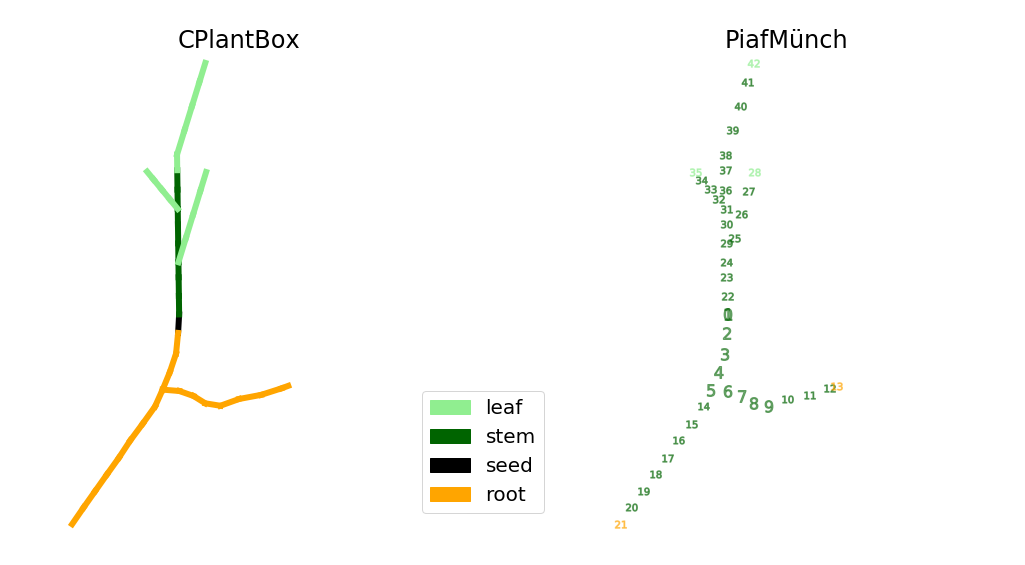

In [479]:

nodes_cor = np.column_stack([nodes_organtype, nodes])

plt.rcParams['figure.figsize'] = [18, 10]

import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt




fig = plt.figure()

ax = fig.add_subplot(122, projection='3d')
plt.title('PiafMünch')
x =nodes[:,0]*100
y =nodes[:,1]*100
z =nodes[:,2]*100

# Get rid of colored axes planes
# First remove fill
#ax.set_axis_off()
# Get rid of the panes
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
#ax.xaxis.pane.set_edgecolor('w')
#ax.yaxis.pane.set_edgecolor('w')
#ax.zaxis.pane.set_edgecolor('w')


ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Bonus: To get rid of the grid as well:
ax.grid(False)

def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
    


for i in range(len(nodes_cor)):
    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(i),
            markersize=12, color=so_si_color(i), alpha=0.5)
    #ax.scatter(cor_x[i], cor_y[i],cor_z[i], s=100, marker = organ_marker(node_connection[i,0]) ,edgecolors= organ_color3(i))

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
ax.set_xlim3d(0, 3)
ax.set_ylim3d(3 ,0)
ax.set_zlim3d(-3,2)

#ax.elev = 89.9
#ax.azim = 270.1
ax.dist = 6.0
#ax.view_init(0, 90)

stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 
#(nodes_organtype[:,1]== 8)|
#print(stem_nodes)



ax = fig.add_subplot(121, projection='3d')
plt.rcParams.update({'font.size': 20})
plt.title('CPlantBox')
x =nodes[:,0]*100
y =nodes[:,1]*100
z =nodes[:,2]*100
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Bonus: To get rid of the grid as well:
#ax.grid(False)
#for i in range(len(nodes_cor)):
#    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(nodes_cor[i,1]),
#            markersize=12, color='black')
def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'orange'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'black'

for i in range(len(node_connection)):
    #xline = [x[node_connection[:,0][i]]],[x[node_connection[:,1][i]]] )
    #yline = np.array([y[node_connection[:,0][i]]],[y[node_connection[:,1][i]]] )
    #zline = np.array([z[node_connection[:,0][i]]],[z[node_connection[:,1][i]]] )
    ax.plot3D(np.array([[x[node_connection[:,0][i]]][0],[x[node_connection[:,1][i]]][0]]), 
              np.array([[y[node_connection[:,0][i]]][0],[y[node_connection[:,1][i]]][0]]), 
              np.array([[z[node_connection[:,0][i]]][0],[z[node_connection[:,1][i]]][0]]), 
              color=organ_color(node_connection[i,0]), alpha=1, linewidth=6)

    
#ax.scatter([x[715]], [y[715]], [z[715]], c='r', s=99)
#ax.scatter([x[860]], [y[860]], [z[860]], c='g', s=99)
#ax.scatter([x[627]], [y[627]], [z[627]], c='g', s=99)

ax.dist = 6.0
ax.set_xlabel('',labelpad=0)
ax.set_ylabel('',labelpad=0)
ax.set_zlabel('',labelpad=0)
ax.set_xlim3d(0, 3)
ax.set_ylim3d(3 ,0)
ax.set_zlim3d(-3,2)
#ax.xaxis.set_ticks(np.arange(0, 3, 1))
#ax.yaxis.set_ticks(np.arange(0 ,3, 1))
#ax.zaxis.set_ticks(np.arange(-3,2, 1))
root_patch = mpatches.Patch(color='orange', label='root')
seed_patch = mpatches.Patch(color='black', label='seed')
stem_patch = mpatches.Patch(color='darkgreen', label='stem')
leaf_patch = mpatches.Patch(color='lightgreen', label='leaf')
plt.legend(handles=[leaf_patch,stem_patch, seed_patch, root_patch],bbox_to_anchor=(0.9, 0.3), loc=2, borderaxespad=0.)

plt.show()


fig.savefig("{}.png".format('3d with node number'), bbox_inches='tight')

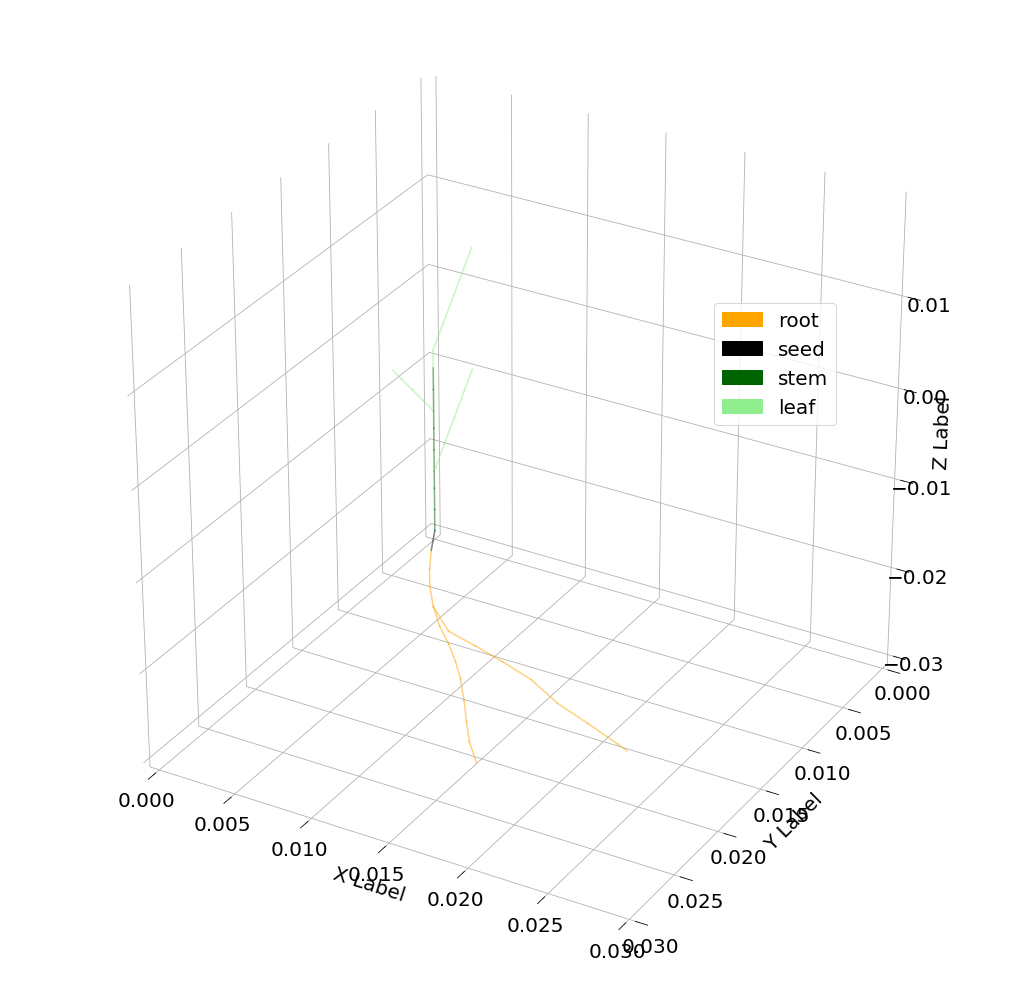

In [387]:
plt.rcParams['figure.figsize'] = [18, 18]

import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 
#(nodes_organtype[:,1]== 8)|
#print(stem_nodes)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =nodes[:,0]
y =nodes[:,1]
z =nodes[:,2]
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
#ax.xaxis.pane.set_edgecolor('w')
#ax.yaxis.pane.set_edgecolor('w')
#ax.zaxis.pane.set_edgecolor('w')

#ax.set_xticks([]) 
#ax.set_yticks([]) 
#ax.set_zticks([])

# Bonus: To get rid of the grid as well:
#ax.grid(False)
#for i in range(len(nodes_cor)):
#    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(nodes_cor[i,1]),
#            markersize=12, color='black')
def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'orange'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'black'

for i in range(len(node_connection)):
    #xline = [x[node_connection[:,0][i]]],[x[node_connection[:,1][i]]] )
    #yline = np.array([y[node_connection[:,0][i]]],[y[node_connection[:,1][i]]] )
    #zline = np.array([z[node_connection[:,0][i]]],[z[node_connection[:,1][i]]] )
    organ= ax.plot3D(np.array([[x[node_connection[:,0][i]]][0],[x[node_connection[:,1][i]]][0]]), np.array([[y[node_connection[:,0][i]]][0],[y[node_connection[:,1][i]]][0]]), np.array([[z[node_connection[:,0][i]]][0],[z[node_connection[:,1][i]]][0]]), color=organ_color(node_connection[i,0]), alpha=0.5)
#ax.scatter([x[715]], [y[715]], [z[715]], c='r', s=99)
#ax.scatter([x[860]], [y[860]], [z[860]], c='g', s=99)
#ax.scatter([x[627]], [y[627]], [z[627]], c='g', s=99)

#ax.dist = 5.0
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim3d(0, 0.03)
ax.set_ylim3d(0.03 ,0)
ax.set_zlim3d(-0.03,0.02)

root_patch = mpatches.Patch(color='orange', label='root')
seed_patch = mpatches.Patch(color='black', label='seed')
stem_patch = mpatches.Patch(color='darkgreen', label='stem')
leaf_patch = mpatches.Patch(color='lightgreen', label='leaf')
plt.legend(handles=[root_patch, seed_patch,stem_patch,leaf_patch],bbox_to_anchor=(0.7, 0.7), loc=2, borderaxespad=0.)
plt.show()
fig.savefig("{}.pdf".format('organtype_structure'), bbox_inches='tight')

array([ 1,  2,  3,  4,  5, 14, 15, 16, 17, 18, 19, 20,  5,  6,  7,  8,  9,
       10, 11, 12, 22, 23, 24, 29, 30, 31, 36, 37, 38, 25, 26, 27, 28, 32,
       33, 34, 35, 39, 40, 41, 42], dtype=uint32)

In [91]:
import pandas as pd
path = 'PiafMunch2_PMA1_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)
JS_ST_begin = (len(node_connection)+1)*3+1
JS_ST_end = JS_ST_begin +(len(node_connection))
output.iloc[54, JS_ST_begin:JS_ST_end]
plant_ana.clearUserData()
JS_ST_0_out=output.iloc[1, JS_ST_begin:JS_ST_end]
JS_ST_0_out_array = JS_ST_0_out.values
plant_ana.addUserData(a2v(JS_ST_0_out_array),"JS_ST_0")

JS_ST_1_out=output.iloc[7, JS_ST_begin:JS_ST_end]
JS_ST_1_out_array = JS_ST_1_out.values
plant_ana.addUserData(a2v(JS_ST_1_out_array),"JS_ST_1")


JS_ST_5_out=output.iloc[30, JS_ST_begin:JS_ST_end]
JS_ST_5_out_array = JS_ST_5_out.values
plant_ana.addUserData(a2v(JS_ST_5_out_array),"JS_ST_5")

JS_ST_9_out=output.iloc[50, JS_ST_begin:JS_ST_end]
JS_ST_9_out_array = JS_ST_9_out.values
plant_ana.addUserData(a2v(JS_ST_9_out_array),"JS_ST_9")



#print(len(segP[sseg.shape[0]:]))
print(len(JS_ST_1_out_array))
plant_ana.write("results/PMA.vtp")
#plant_ana.write("results/PMA.txt")

41


In [52]:
C_ST_begin = (len(node_connection)+1)*3+1
C_ST_end = C_ST_begin +(len(node_connection))

output.iloc[100, C_ST_begin:C_ST_end]

C_ST (mmol / ml)[ 1]    0.880587
C_ST (mmol / ml)[ 2]     0.86767
C_ST (mmol / ml)[ 3]    0.854484
C_ST (mmol / ml)[ 4]    0.841214
C_ST (mmol / ml)[ 5]     0.82786
C_ST (mmol / ml)[ 6]    0.820811
C_ST (mmol / ml)[ 7]     0.81407
C_ST (mmol / ml)[ 8]    0.807309
C_ST (mmol / ml)[ 9]    0.800524
C_ST (mmol / ml)[10]    0.793712
C_ST (mmol / ml)[11]    0.786874
C_ST (mmol / ml)[12]    0.780008
C_ST (mmol / ml)[13]    0.759674
C_ST (mmol / ml)[14]    0.820811
C_ST (mmol / ml)[15]     0.81407
C_ST (mmol / ml)[16]    0.807309
C_ST (mmol / ml)[17]    0.800524
C_ST (mmol / ml)[18]    0.793712
C_ST (mmol / ml)[19]    0.786874
C_ST (mmol / ml)[20]    0.780008
C_ST (mmol / ml)[21]    0.759674
C_ST (mmol / ml)[22]    0.893846
C_ST (mmol / ml)[23]     0.90683
C_ST (mmol / ml)[24]    0.919612
C_ST (mmol / ml)[25]    0.923757
C_ST (mmol / ml)[26]    0.928044
C_ST (mmol / ml)[27]    0.932375
C_ST (mmol / ml)[28]     0.94274
C_ST (mmol / ml)[29]    0.928161
C_ST (mmol / ml)[30]     0.93672
C_ST (mmol

In [30]:
C_ST_begin = (len(node_connection)+1)*3+1
C_ST_end = C_ST_begin +(len(node_connection))

output.iloc[100, C_ST_begin:C_ST_end]

C_ST (mmol / ml)[ 1]    0.784141
C_ST (mmol / ml)[ 2]    0.782796
C_ST (mmol / ml)[ 3]    0.781423
C_ST (mmol / ml)[ 4]    0.780048
C_ST (mmol / ml)[ 5]    0.778672
C_ST (mmol / ml)[ 6]    0.777942
C_ST (mmol / ml)[ 7]    0.777252
C_ST (mmol / ml)[ 8]    0.776563
C_ST (mmol / ml)[ 9]    0.775873
C_ST (mmol / ml)[10]    0.775183
C_ST (mmol / ml)[11]    0.774493
C_ST (mmol / ml)[12]    0.773802
C_ST (mmol / ml)[13]    0.759672
C_ST (mmol / ml)[14]    0.777942
C_ST (mmol / ml)[15]    0.777252
C_ST (mmol / ml)[16]    0.776563
C_ST (mmol / ml)[17]    0.775873
C_ST (mmol / ml)[18]    0.775183
C_ST (mmol / ml)[19]    0.774493
C_ST (mmol / ml)[20]    0.773802
C_ST (mmol / ml)[21]    0.759672
C_ST (mmol / ml)[22]    0.785542
C_ST (mmol / ml)[23]    0.786912
C_ST (mmol / ml)[24]    0.788258
C_ST (mmol / ml)[25]    0.788691
C_ST (mmol / ml)[26]    0.789149
C_ST (mmol / ml)[27]    0.789711
C_ST (mmol / ml)[28]    0.798496
C_ST (mmol / ml)[29]    0.789165
C_ST (mmol / ml)[30]    0.790077
C_ST (mmol

In [92]:
### C_ST
time = np.array(output.iloc[:, 0])
n_begin = (len(node_connection)+1)*3+1
n_end = n_begin +(len(node_connection))
#print(output.iloc[2, n_begin:n_end])

var_leaf = np.array(output.iloc[:,n_begin + N1L_node[:,0]])
var_root = np.array(output.iloc[:,n_begin + N1R_node[:,0]])
var_n2 = np.array(output.iloc[:,n_begin+ N2_node[:,0]])
var_n3 = np.array(output.iloc[:,n_begin + N3_node[:,0]])
var_all = np.array(output.iloc[:,n_begin:n_end])

output.columns[n_begin]

'C_ST (mmol / ml)[ 1]'

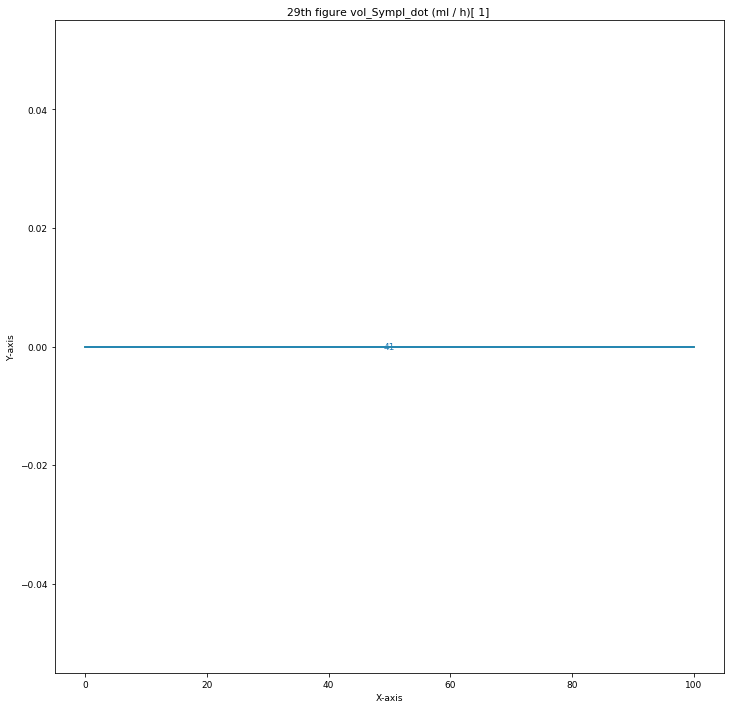

In [93]:
from scipy.stats import loglaplace,chi2
from labellines import labelLine, labelLines
for i in range(28,31):
    f = plt.figure()
    n_begin = (len(node_connection)+1)*i+1
    n_end = n_begin +(len(node_connection))
    var_all = np.array(output.iloc[:,n_begin:n_end])
    x = np.array(time)
    y = np.array(var_all)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
    
    for i in range(len(np.transpose(y))):
        plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    #plt.legend()
    labelLines(plt.gca().get_lines(), xvals=(45, 50), zorder=0)
    plt.show()
    s =output.columns[n_begin]
    s = s.replace('/', '')
    f.savefig("{}.pdf".format(s), bbox_inches='tight')

In [463]:
node_connection[34]


array([33, 32], dtype=uint32)

In [493]:
import matplotlib.lines as mlines
plt.rcParams['figure.figsize'] = [24, 12]
i=37
f = plt.figure()
#ax = f.gca(projection='3d')
n_begin = (len(node_connection))*37-7
n_end = n_begin +(len(node_connection))
var_all = np.array(output.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.xlabel("Time (hours)")
plt.ylabel("{}".format(output.columns[n_begin]))
plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))

def organ_color(int):
    if int == 34: #int is source 
        return 'lightgreen'
    elif int == 10: #int is source 
        return 'orange'
    elif int == 22:
        return 'darkgreen'
    else:
        return 'silver'

def organ_color1(int):
    if int == 34: #int is source 
        return 'lightgreen'
    elif int == 10: #int is source 
        return 'orange'
    elif int == 22:
        return 'darkgreen'
    else:
        return 'None'

def zorder(int):    
    if int == 34: #int is source 
        return 11.
    elif int == 10: #int is source 
        return 11.
    elif int == 22:
        return 11.
    else:
        return 0.
    
def organ_marker(int):
    if int in leaf_nodes:
    #if int == 21: #int is source 
        return 'o'
    elif int in stem_nodes:
        return 's'
    elif int in root_nodes : #int is sink
        return 'v'
    elif int == 1 : #int is sink
        return 'D'
    #elif int == 40 :
    else:
        return 'None'
    
for i in range(41):
    plt.plot(x,[pt[i] for pt in y], marker = organ_marker(node_connection[i,0]),markersize=10, label = '{0}'.format(node_connection[i,0])
                ,c=organ_color1(node_connection[i,0]),alpha=1,zorder=zorder(i))
    plt.scatter(x,[pt[i] for pt in y], marker = organ_marker(node_connection[i,0]), label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
plt.rcParams.update({'font.size': 18})

green_star = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-',
                          markersize=12, label='Water Flow between 24th and 23th node (Stem)')
orange_cross = mlines.Line2D([], [], color='orange', marker='v', linestyle='-',
                          markersize=12, label='Water Flow between 19th and 20th node (Root)')
lgreen_circle = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-',
                          markersize=12, label='Water Flow between 33th and 32th node (Leaf)')
star = mlines.Line2D([], [], color='grey', marker='s', linestyle='',
                          markersize=10, label='Water Flow between nodes of CPlantBox Stem')
cross = mlines.Line2D([], [], color='grey', marker='v', linestyle='',
                          markersize=10, label='Water Flow between nodes of CPlantBox Root')
circle = mlines.Line2D([], [], color='grey', marker='o', linestyle='',
                          markersize=10, label='Water Flow between nodes of CPlantBox Leaf')




plt.legend(handles=[green_star,orange_cross, lgreen_circle, star, cross, circle],bbox_to_anchor=(0.62, 0.27), loc=2, borderaxespad=0.)

plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
f.savefig("{}.pdf".format(s), bbox_inches='tight')



In [114]:
n_begin = (len(node_connection))*37-7
n_end = n_begin +(len(node_connection))
np.array(output.iloc[99,n_begin:n_end])




array([-1310060000000.0, -1123550000000.0, -1505460000000.0,
       -1243450000000.0, -1869620000000.0, -1061370000000.0,
       -2269300000000.0, -1634250000000.0, -1518790000000.0,
       -1620930000000.0, -1421090000000.0, -1754150000000.0,
       -1771920000000.0, -1540990000000.0, -972555000000.0,
       -1669780000000.0, -1398880000000.0, -1953990000000.0,
       -2198240000000.0, -1580960000000.0, -1274540000000.0,
       -1829650000000.0, -2478020000000.0, -2313700000000.0,
       -1745270000000.0, -2184920000000.0, -1132430000000.0,
       -1465490000000.0, -1962870000000.0, -510703000000.0,
       217604000000.0, -452971000000.0, 333067000000.0, 133227000000.0,
       515143000000.0, 213163000000.0, 71054300000.0, -1372240000000.0,
       -1287860000000.0, -1132430000000.0, -235367000000.0], dtype=object)

In [355]:
i=34
n_begin = (len(node_connection))*i-7
n_end = n_begin +(len(node_connection))
output.iloc[1,n_begin:n_end]

JS_ST (mmol / h)[ 1]    2.27223e-07
JS_ST (mmol / h)[ 2]    3.28917e-08
JS_ST (mmol / h)[ 3]    3.81597e-09
JS_ST (mmol / h)[ 4]    3.73017e-10
JS_ST (mmol / h)[ 5]     1.7456e-11
JS_ST (mmol / h)[ 6]    8.41751e-13
JS_ST (mmol / h)[ 7]    3.53997e-14
JS_ST (mmol / h)[ 8]    1.07459e-15
JS_ST (mmol / h)[ 9]    8.63716e-18
JS_ST (mmol / h)[10]   -8.29264e-19
JS_ST (mmol / h)[11]   -2.90633e-20
JS_ST (mmol / h)[12]   -6.72988e-18
JS_ST (mmol / h)[13]     1.7456e-11
JS_ST (mmol / h)[14]    8.41751e-13
JS_ST (mmol / h)[15]    3.53997e-14
JS_ST (mmol / h)[16]    1.07459e-15
JS_ST (mmol / h)[17]    8.63716e-18
JS_ST (mmol / h)[18]   -8.29264e-19
JS_ST (mmol / h)[19]   -2.90633e-20
JS_ST (mmol / h)[20]   -6.72988e-18
JS_ST (mmol / h)[21]    1.23163e-06
JS_ST (mmol / h)[22]    4.68296e-06
JS_ST (mmol / h)[23]    1.37305e-05
JS_ST (mmol / h)[24]    2.31994e-07
JS_ST (mmol / h)[25]    1.75131e-06
JS_ST (mmol / h)[26]    8.29783e-06
JS_ST (mmol / h)[27]    3.35107e-08
JS_ST (mmol / h)[28]    6.85

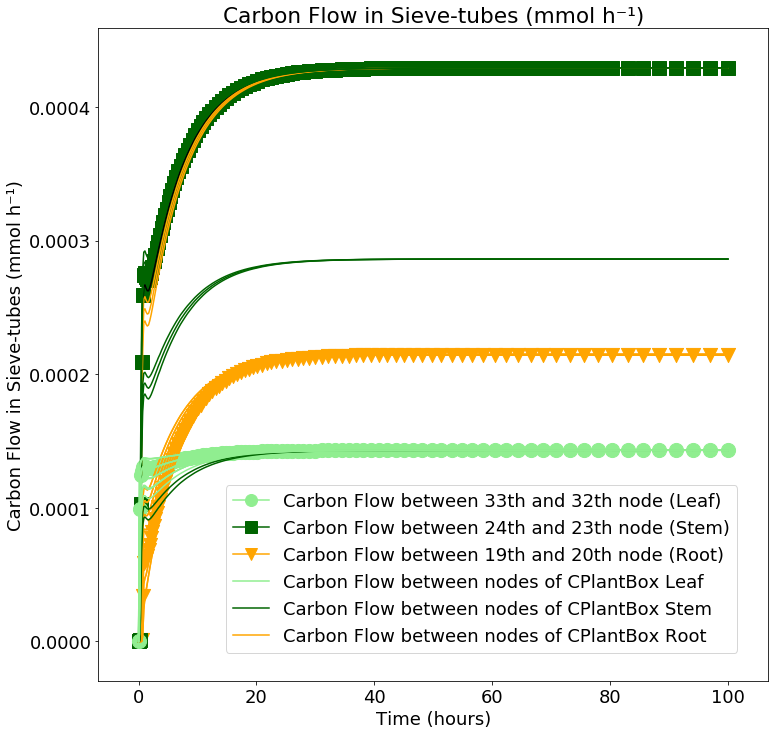

In [486]:
plt.rcParams['figure.figsize'] = [12, 12]
import numpy as np
i=34
f = plt.figure()
n_begin = (len(node_connection))*i-7
n_end = n_begin +(len(node_connection))
var_all = np.array(output.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.xlabel("Time (hours)")
plt.ylabel('Carbon Flow in Sieve-tubes (mmol h⁻¹)')
plt.title('Carbon Flow in Sieve-tubes (mmol h⁻¹)')

def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'orange'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'black'
def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
    
for i in range(len(np.transpose(y))):
    plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(node_connection[i,0]),
    c=organ_color(node_connection[i,0]),alpha=1)
    #plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(node_connection[i,1]),
    #c=so_si_color(node_connection[i,1]),alpha=1)
    plt.scatter(x,[pt[i] for pt in y], marker = organ_marker(node_connection[i,0]), s=200 ,
                label = '{0}'.format(node_connection[i,0])
                ,c=organ_color1(node_connection[i,0]),alpha=1)

stem_carbon = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-',
                          markersize=12, label='Carbon Flow between 24th and 23th node (Stem)')
root_carbon = mlines.Line2D([], [], color='orange', marker='v', linestyle='-',
                          markersize=12, label='Carbon Flow between 19th and 20th node (Root)')
leaf_carbon = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-',
                          markersize=12, label='Carbon Flow between 33th and 32th node (Leaf)')
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-',
                          markersize=10, label='Carbon Flow between nodes of CPlantBox Stem')
root_line = mlines.Line2D([], [], color='orange', marker='', linestyle='-',
                          markersize=10, label='Carbon Flow between nodes of CPlantBox Root')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-',
                          markersize=10, label='Carbon Flow between nodes of CPlantBox Leaf')
#plt.legend(handles=[leaf_patch,stem_patch, seed_patch, root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)
plt.legend(handles=[leaf_carbon,stem_carbon,root_carbon, leaf_line,stem_line, root_line],bbox_to_anchor=(0.19, 0.3), loc=2, borderaxespad=0.)

#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=2.5, alpha=1)
plt.rcParams.update({'font.size': 18})
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
f.savefig("{}JS_STcarbonflow1.pdf".format(s), bbox_inches='tight')

In [300]:
plt.rcParams['figure.figsize'] = [12, 12]
import numpy as np
i=32
f = plt.figure()
n_begin = (len(node_connection))*i-10
n_end = n_begin +(len(node_connection))
var_all = np.array(output.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.xlabel("Time (hours)")
plt.ylabel("{}".format(output.columns[n_begin]))
plt.title(" {:.16s} ".format(output.columns[n_begin]))

def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'orange'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'black'
def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
    
for i in range(len(np.transpose(y))):
    plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(node_connection[i,0]),
    c=organ_color(node_connection[i,0]),alpha=1)
    #plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(node_connection[i,1]),
    #c=so_si_color(node_connection[i,1]),alpha=1)
root_patch = mpatches.Patch(color='orange', label='root')
seed_patch = mpatches.Patch(color='black', label='seed')
stem_patch = mpatches.Patch(color='darkgreen', label='stem')
leaf_patch = mpatches.Patch(color='lightgreen', label='leaf')
plt.legend(handles=[leaf_patch,stem_patch, seed_patch, root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)

labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=2.5, alpha=1)
plt.rcParams.update({'font.size': 9})
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
f.savefig("{}JS_STcarbonflow1.pdf".format(s), bbox_inches='tight')


array([[ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 4,  5],
       [ 5, 14],
       [14, 15],
       [15, 16],
       [16, 17],
       [17, 18],
       [18, 19],
       [19, 20],
       [20, 21],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9, 10],
       [10, 11],
       [11, 12],
       [12, 13],
       [22,  1],
       [23, 22],
       [24, 23],
       [29, 24],
       [30, 29],
       [31, 30],
       [36, 31],
       [37, 36],
       [38, 37],
       [25, 24],
       [26, 25],
       [27, 26],
       [28, 27],
       [32, 31],
       [33, 32],
       [34, 33],
       [35, 34],
       [39, 38],
       [40, 39],
       [41, 40],
       [42, 41]], dtype=uint32)

In [35]:
import pandas as pd
path = 'PiafMunch2_PMA1_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)
JS_ST_begin = (len(node_connection)+1)*33-2
JS_ST_end = JS_ST_begin +(len(node_connection))
output.iloc[100, JS_ST_begin:JS_ST_end]
plant_ana.clearUserData()
for i in range(0,100):
    JS_ST_1_out=output.iloc[i, JS_ST_begin:JS_ST_end]
    JS_ST_1_out_array = JS_ST_1_out.values
    plant_ana.addUserData(a2v(JS_ST_1_out_array),"JS_ST_{}".format(output.iloc[i, 0]))




#print(len(segP[sseg.shape[0]:]))
print(len(JS_ST_1_out_array))
plant_ana.write("../results/PMA_JW_XYL_100.vtp")
#plant_ana.write("results/PMA.txt")



41


In [36]:
import pandas as pd
path = 'PiafMunch2_PMA1_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)
JS_ST_begin = (len(node_connection)+1)*31
JS_ST_end = JS_ST_begin +(len(node_connection))
output.iloc[100, JS_ST_begin:JS_ST_end]
plant_ana.clearUserData()
for i in range(0,100):
    JS_ST_1_out=output.iloc[i, JS_ST_begin:JS_ST_end]
    JS_ST_1_out_array = JS_ST_1_out.values
    plant_ana.addUserData(a2v(JS_ST_1_out_array),"JS_ST_{}".format(output.iloc[i, 0]))




#print(len(segP[sseg.shape[0]:]))
print(len(JS_ST_1_out_array))
plant_ana.write("../results/PMA_JW_ST_100.vtp")
#plant_ana.write("results/PMA.txt")

41


In [49]:
JS_ST_begin = (len(node_connection)+1)*31
JS_ST_end = JS_ST_begin +(len(node_connection))
output.iloc[100, JS_ST_begin:JS_ST_end]

JW_ST (ml / h)[ 1]    0.000547618
JW_ST (ml / h)[ 2]    0.000548558
JW_ST (ml / h)[ 3]    0.000549521
JW_ST (ml / h)[ 4]     0.00055049
JW_ST (ml / h)[ 5]    0.000275732
JW_ST (ml / h)[ 6]     0.00027599
JW_ST (ml / h)[ 7]    0.000276235
JW_ST (ml / h)[ 8]     0.00027648
JW_ST (ml / h)[ 9]    0.000276726
JW_ST (ml / h)[10]    0.000276972
JW_ST (ml / h)[11]    0.000277219
JW_ST (ml / h)[12]    0.000277466
JW_ST (ml / h)[13]    0.000275731
JW_ST (ml / h)[14]     0.00027599
JW_ST (ml / h)[15]    0.000276235
JW_ST (ml / h)[16]     0.00027648
JW_ST (ml / h)[17]    0.000276726
JW_ST (ml / h)[18]    0.000276972
JW_ST (ml / h)[19]    0.000277219
JW_ST (ml / h)[20]    0.000277466
JW_ST (ml / h)[21]    0.000546641
JW_ST (ml / h)[22]    0.000545689
JW_ST (ml / h)[23]    0.000544758
JW_ST (ml / h)[24]    0.000362752
JW_ST (ml / h)[25]    0.000362334
JW_ST (ml / h)[26]    0.000361922
JW_ST (ml / h)[27]    0.000180859
JW_ST (ml / h)[28]    0.000180755
JW_ST (ml / h)[29]    0.000180651
JW_ST (ml / h)

In [311]:
def organ_marker(int):
    if int in leaf_nodes:
    #if int == 21: #int is source 
        return 'o'
    elif int in root_nodes : #int is sink
        return 'x'
    #elif int == 40 :
    elif int in stem_nodes:
        return '*'
    else:
        return 'None'

nodes_org = np.full((41, 1),0)
for i in range(0,len(node_connection)):
    nodes_org[i]= nodes_organtype[node_connection[i][0]][1]
nodes_c_marker = np.full((41, 1),'k')
for i in range(0,len(node_connection)):
    nodes_c_marker[i]= organ_marker(node_connection[i][0])
nodes_c_marker[0][0]= 'D'
nodes_c_marker.astype(str, copy = True)


array([['D'],
       ['x'],
       ['x'],
       ['x'],
       ['x'],
       ['x'],
       ['x'],
       ['x'],
       ['x'],
       ['x'],
       ['x'],
       ['x'],
       ['x'],
       ['x'],
       ['x'],
       ['x'],
       ['x'],
       ['x'],
       ['x'],
       ['x'],
       ['*'],
       ['*'],
       ['*'],
       ['*'],
       ['*'],
       ['*'],
       ['*'],
       ['*'],
       ['o'],
       ['o'],
       ['o'],
       ['o'],
       ['o'],
       ['o'],
       ['o'],
       ['o'],
       ['o'],
       ['o'],
       ['o'],
       ['o'],
       ['o']], dtype='<U1')

In [337]:
import pandas as pd
node_connection
#node_connection_cor
nodes_c_cor = np.full((41, 3),0.0)
#charar = np.chararray((3, 3))

for i in range(0,len(node_connection)):
    nodes_c_cor[i] = (nodes[node_connection[i,0]] + nodes[node_connection[i,1]])/2


b = np.zeros((nodes_organtype.shape[0],nodes_organtype.shape[1]+1)); b[:,:-1] = nodes_organtype
node_c_o = np.zeros((node_connection.shape[0],node_connection.shape[1]+5)); node_c_o[:,:-5] = node_connection

for i in range(0,len(node_connection)):
    node_c_o[i][2:5] = (nodes[node_connection[i,0]] + nodes[node_connection[i,1]])/2
#    node_c_o[i][6] = nodes_organtype[node_c_o[i][0]][0]
    #node_c_o[i][6] = nodes_organtype[node_c_o[i][0]][1]

node_c_o = pd.DataFrame({'1st_node':node_connection[:,0],'2nd_node':node_connection[:,1],'x':node_c_o[:,2]
                        ,'y':node_c_o[:,3],'z':node_c_o[:,4], 'organ_type':nodes_org[:,0],'marker':nodes_c_marker[:,0]})
node_c_o

1st_node  2nd_node             x         y         z  organ_type marker
0          1         2 -4.203073e-05  0.000032 -0.031249           1      D
1          2         3 -7.447373e-05  0.000265 -0.033732           2      x
2          3         4 -2.707373e-04  0.000647 -0.036185           2      x
3          4         5 -7.467404e-04  0.000991 -0.038614           2      x
4          5        14 -1.318928e-03  0.001297 -0.041028           2      x
5         14        15 -2.044098e-03  0.001767 -0.043362           2      x
6         15        16 -2.906828e-03  0.002418 -0.045617           2      x
7         16        17 -3.737028e-03  0.003058 -0.047886           2      x
8         17        18 -4.554772e-03  0.003687 -0.050163           2      x
9         18        19 -5.400867e-03  0.004324 -0.052427           2      x
10        19        20 -6.246838e-03  0.004928 -0.054700           2      x
11        20        21 -7.083949e-03  0.005527 -0.056978           2      x
12         5         6 -7.646851e-04  0.000229 -0.040628           2      x
13         6         7 -2.907270e-04 -0.001478 -0.042380           2      x
14         7         8  1.153662e-04 -0.002932 -0.044367           2      x
15         8         9  5.318433e-04 -0.004480 -0.046265           2      x
16         9        10  1.041208e-03 -0.006503 -0.047541           2      x
17        10        11  1.822089e-03 -0.008717 -0.048368           2      x
18        11        12  2.715702e-03 -0.010918 -0.049131           2      x
19        12        13  3.223510e-03 -0.012457 -0.049607           2      x
20        22         1  0.000000e+00  0.000000 -0.028750           4      *
21        23        22  0.000000e+00  0.000000 -0.026250           4      *
22        24        23  0.000000e+00  0.000000 -0.024000           4      *
23        29        24  0.000000e+00  0.000000 -0.021750           4      *
24        30        29  0.000000e+00  0.000000 -0.019250           4      *
25        31        30  0.000000e+00  0.000000 -0.017000           4      *
26        36        31  0.000000e+00  0.000000 -0.014750           4      *
27        37        36  0.000000e+00  0.000000 -0.012250           4      *
28        38        37  0.000000e+00  0.000000 -0.010000           8      o
29        25        24  3.669543e-20 -0.000599 -0.021903           8      o
30        26        25  1.100863e-19 -0.001798 -0.019709           8      o
31        27        26  1.834772e-19 -0.002996 -0.017515           8      o
32        28        27  2.487559e-19 -0.004062 -0.015564           8      o
33        32        31 -1.100863e-19  0.000599 -0.014903           8      o
34        33        32 -3.302589e-19  0.001798 -0.012709           8      o
35        34        33 -5.504315e-19  0.002996 -0.010515           8      o
36        35        34 -7.462676e-19  0.004062 -0.008564           8      o
37        39        38  1.834772e-19 -0.000599 -0.007903           8      o
38        40        39  5.504315e-19 -0.001798 -0.005709           8      o
39        41        40  9.173859e-19 -0.002996 -0.003515           8      o
40        42        41  1.243779e-18 -0.004062 -0.001564           8      o

In [338]:
node_c_cor

NameError: name 'node_c_cor' is not defined

In [345]:
output.iloc[100, JS_ST_begin:JS_ST_end]

JW_Xyl (ml / h)[ 1]     3.24185e+12
JW_Xyl (ml / h)[ 2]     3.31291e+12
JW_Xyl (ml / h)[ 3]     3.22409e+12
JW_Xyl (ml / h)[ 4]     1.98952e+12
JW_Xyl (ml / h)[ 5]     1.32339e+12
JW_Xyl (ml / h)[ 6]     1.93623e+12
JW_Xyl (ml / h)[ 7]     1.27898e+12
JW_Xyl (ml / h)[ 8]     1.24345e+12
JW_Xyl (ml / h)[ 9]     1.59872e+11
JW_Xyl (ml / h)[10]     5.81757e+11
JW_Xyl (ml / h)[11]    -8.88178e+09
JW_Xyl (ml / h)[12]     4.30767e+11
JW_Xyl (ml / h)[13]     8.26006e+11
JW_Xyl (ml / h)[14]     1.08802e+12
JW_Xyl (ml / h)[15]     1.85185e+12
JW_Xyl (ml / h)[16]     8.08242e+11
JW_Xyl (ml / h)[17]     7.68274e+11
JW_Xyl (ml / h)[18]     6.08402e+11
JW_Xyl (ml / h)[19]      2.9754e+11
JW_Xyl (ml / h)[20]     7.06102e+11
JW_Xyl (ml / h)[21]     3.64153e+12
JW_Xyl (ml / h)[22]     4.03233e+12
JW_Xyl (ml / h)[23]     3.86358e+12
JW_Xyl (ml / h)[24]     3.90799e+11
JW_Xyl (ml / h)[25]     7.28306e+11
JW_Xyl (ml / h)[26]     1.25677e+12
JW_Xyl (ml / h)[27]    -4.57412e+11
JW_Xyl (ml / h)[28]    -7.72

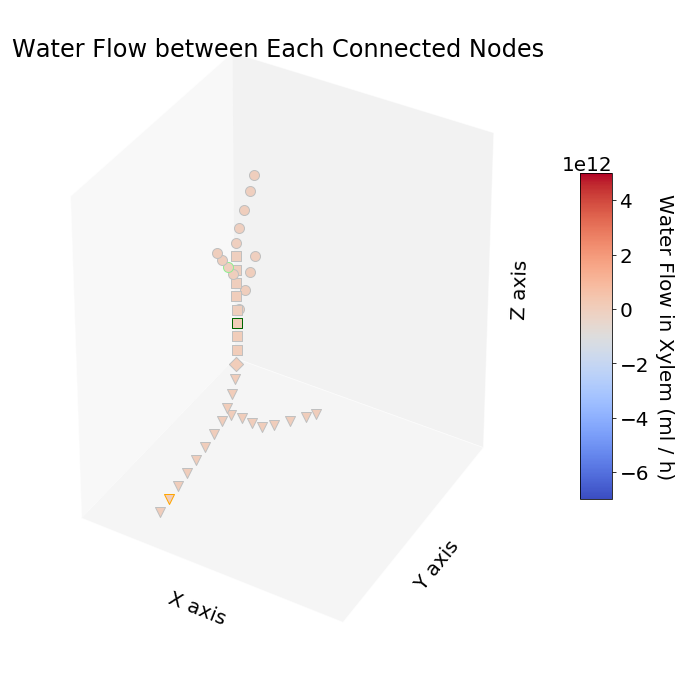

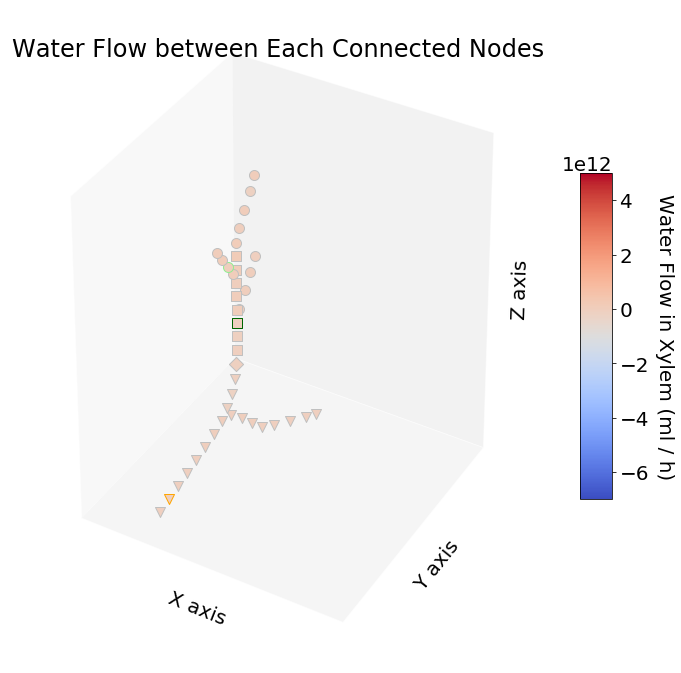

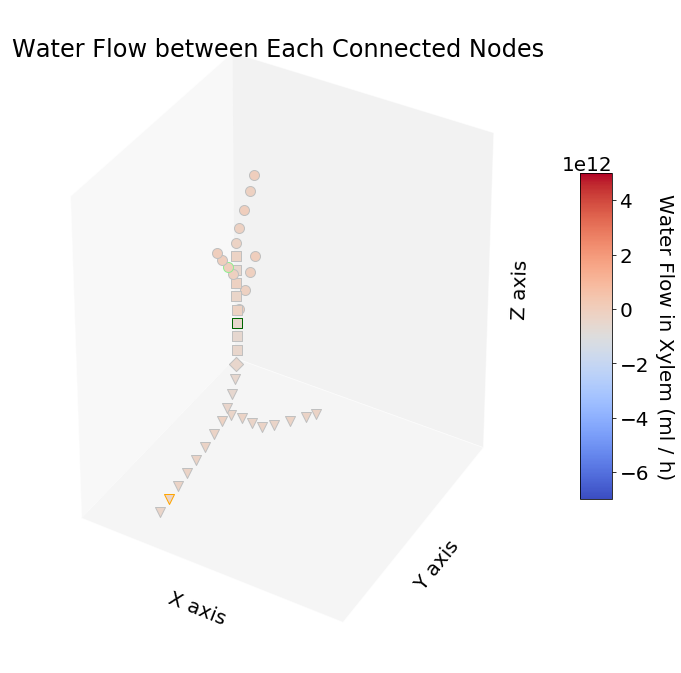

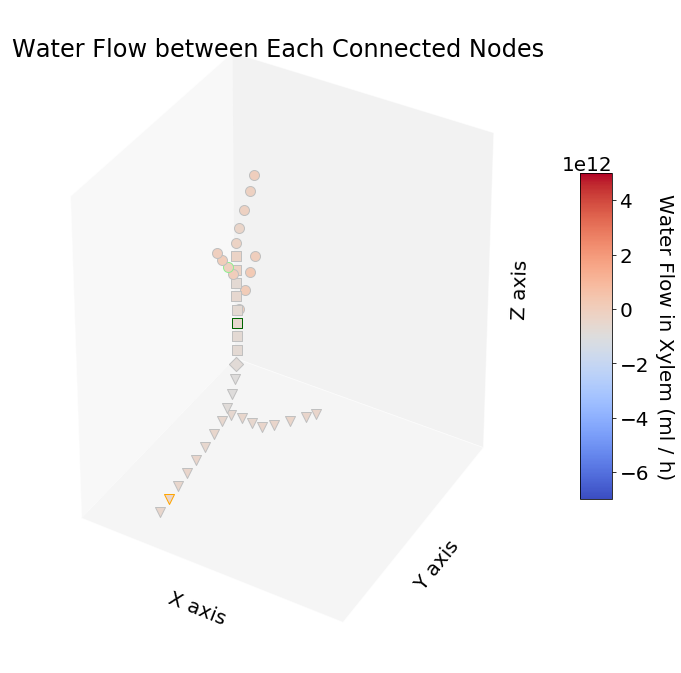

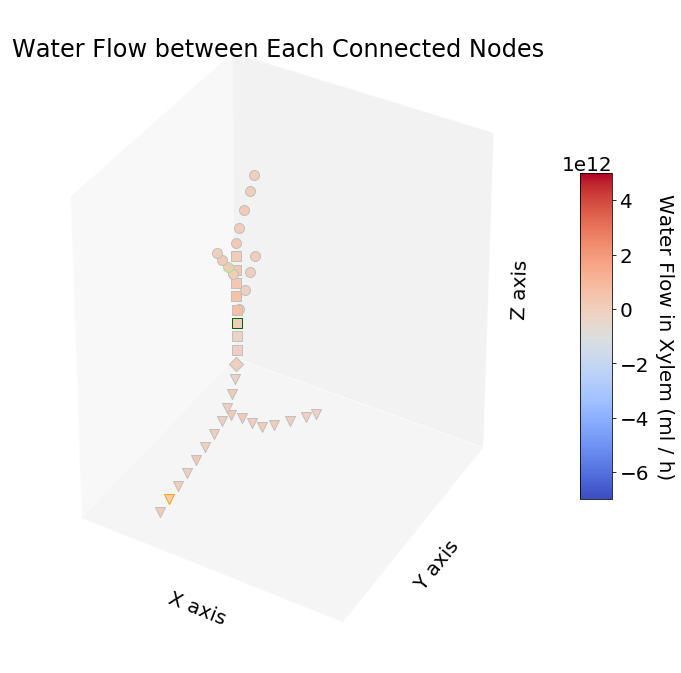

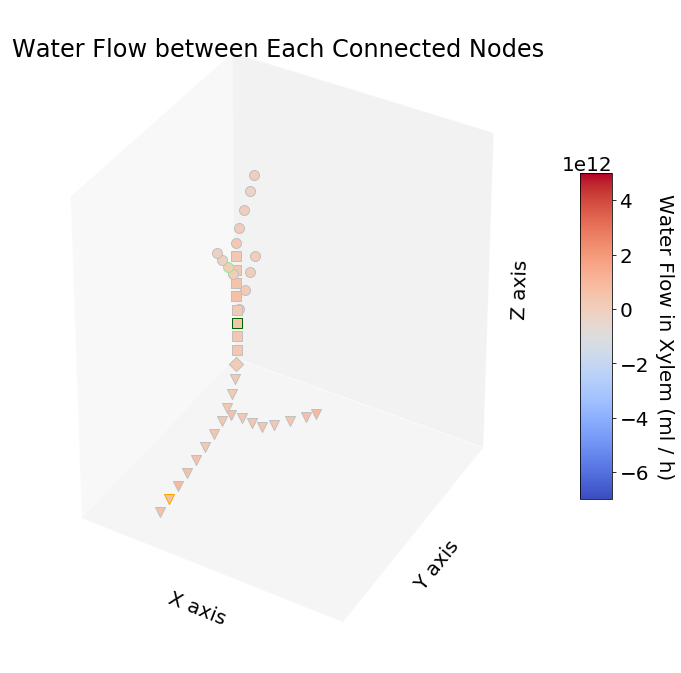

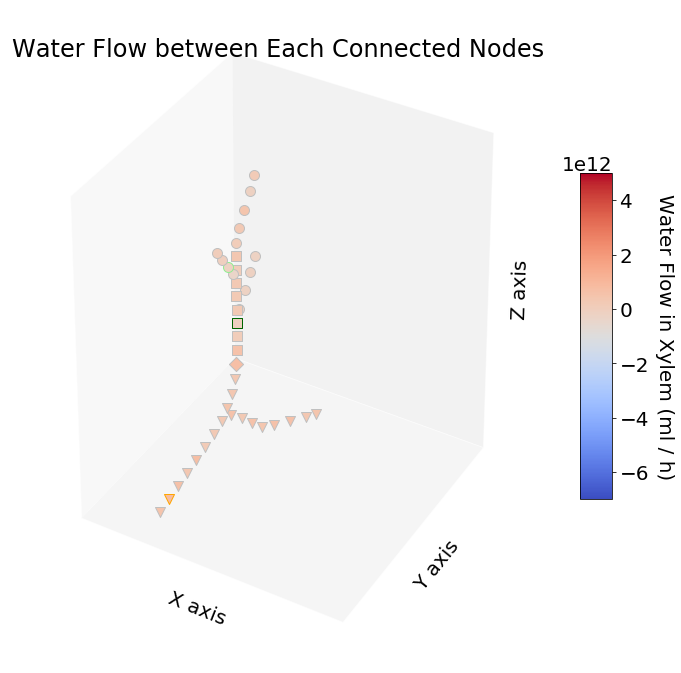

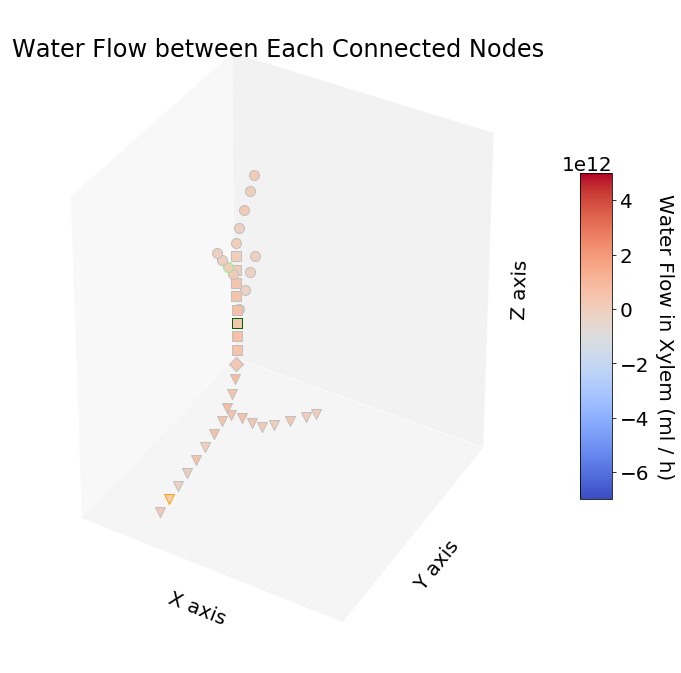

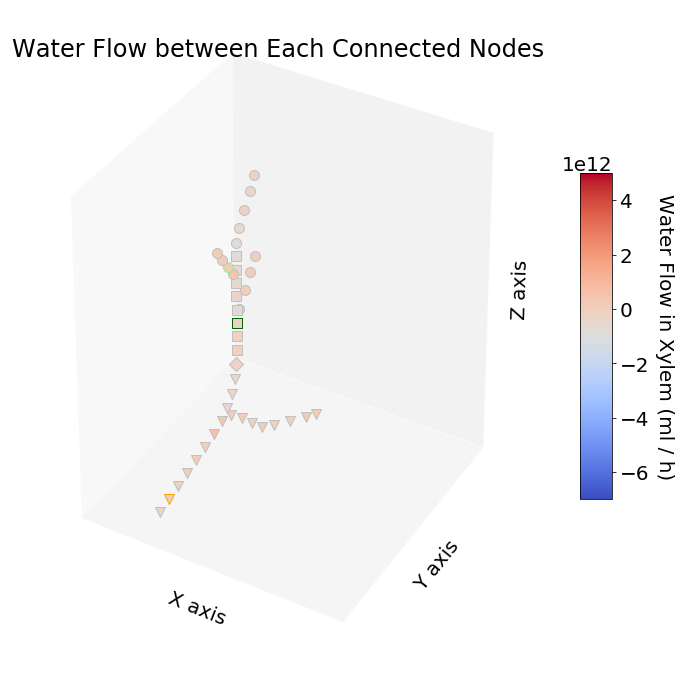

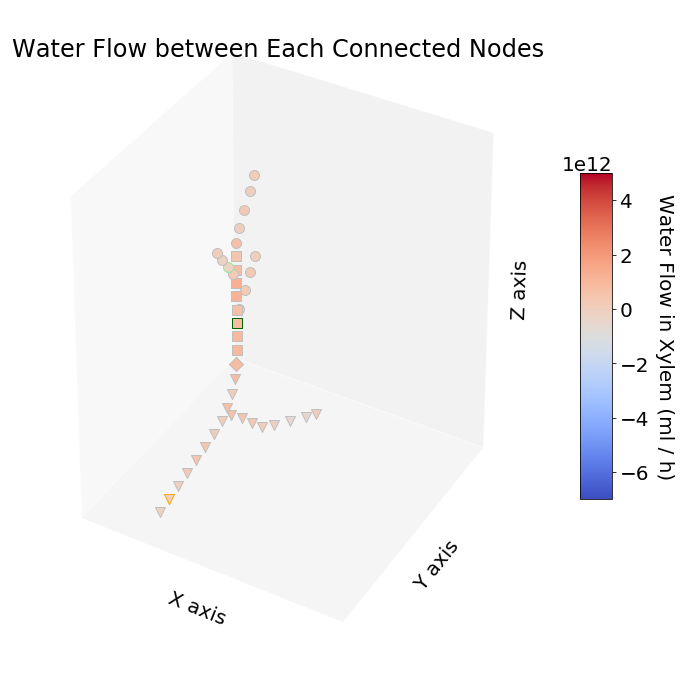

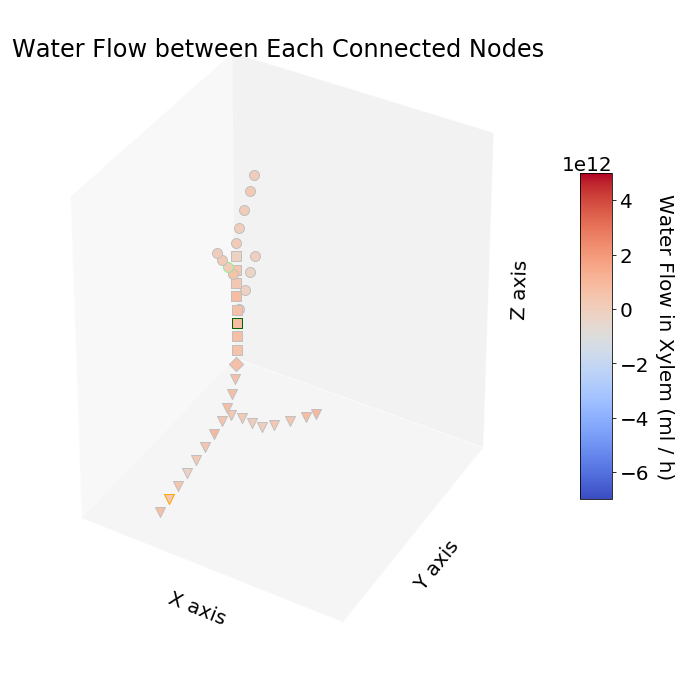

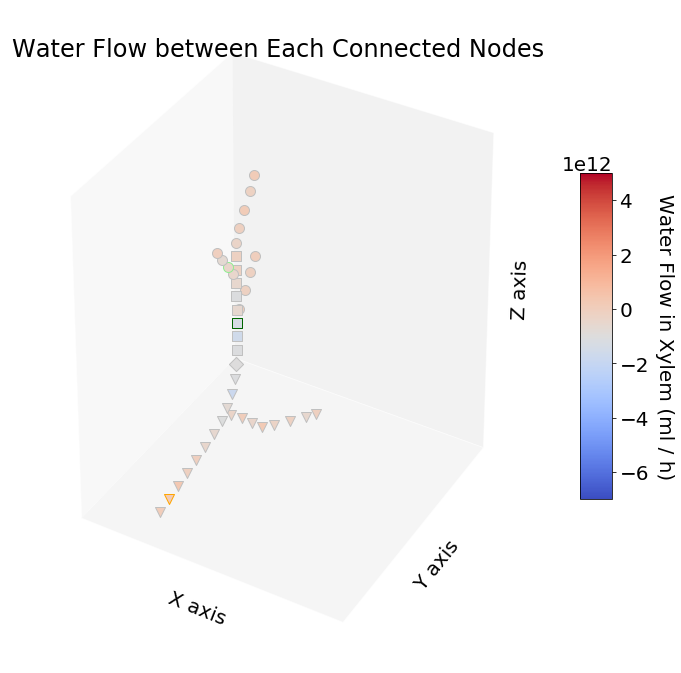

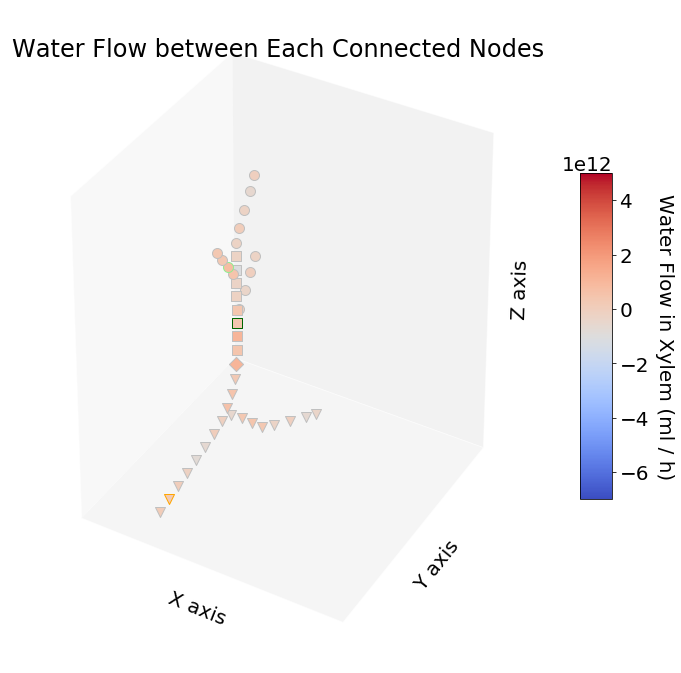

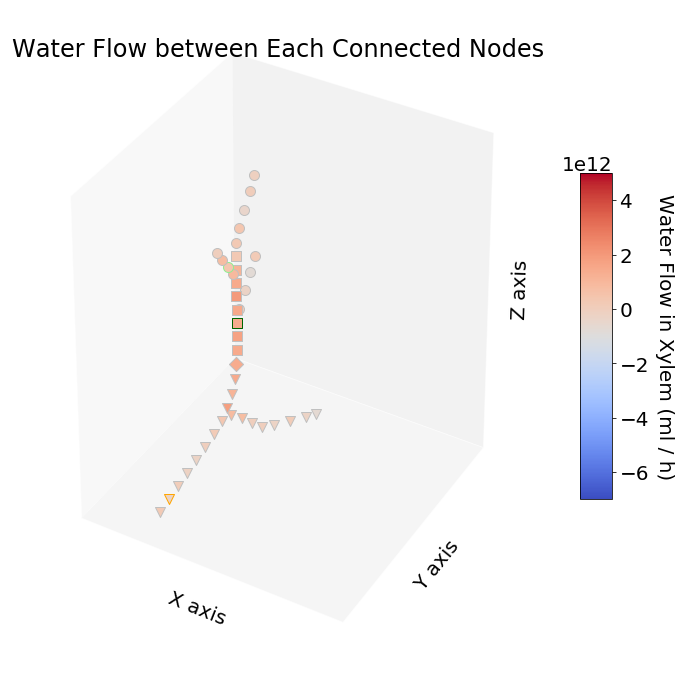

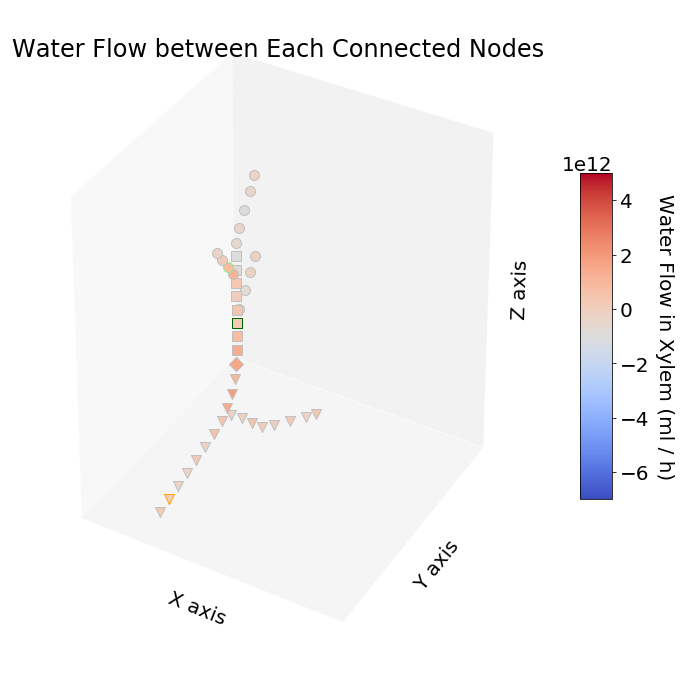

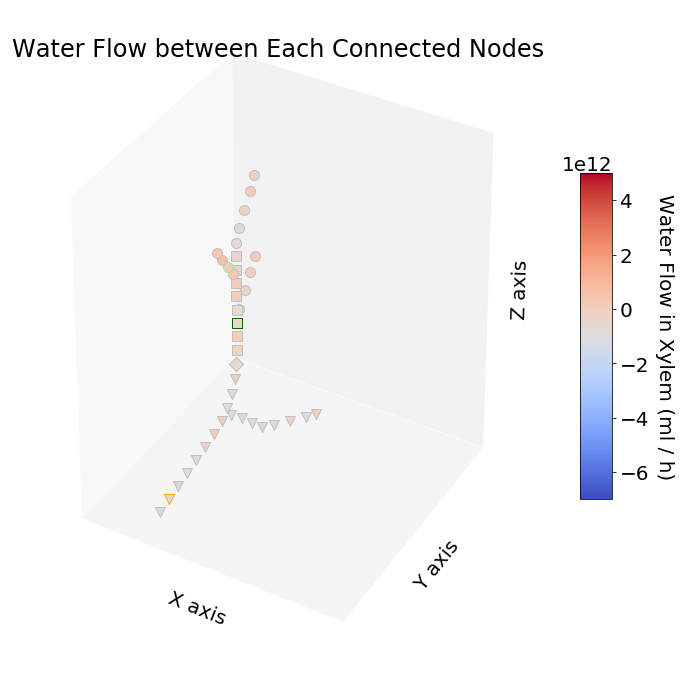

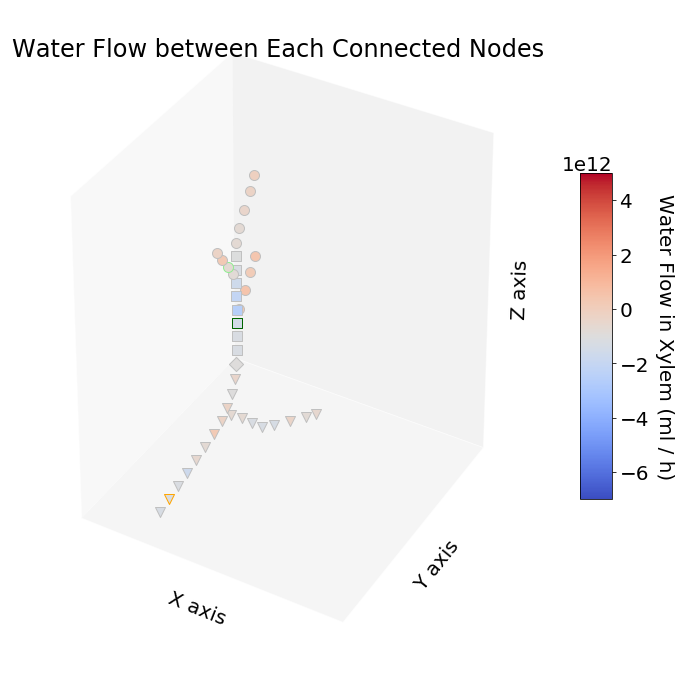

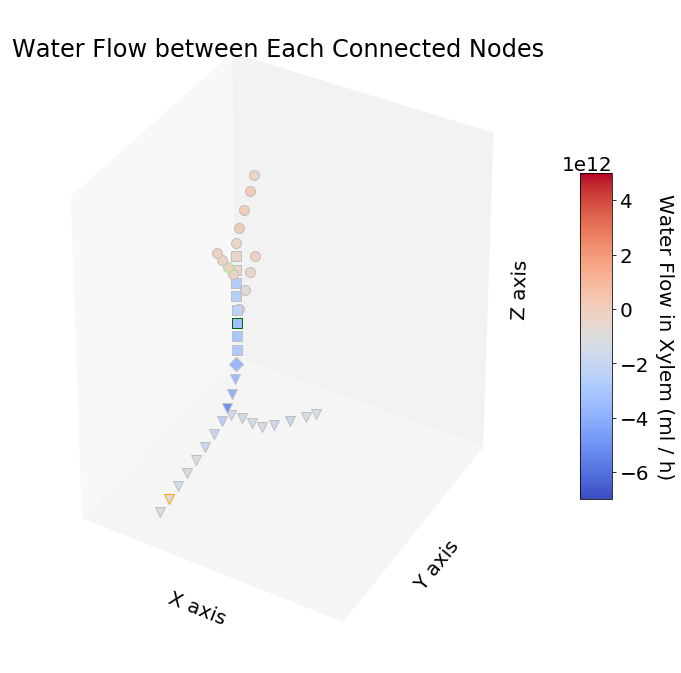

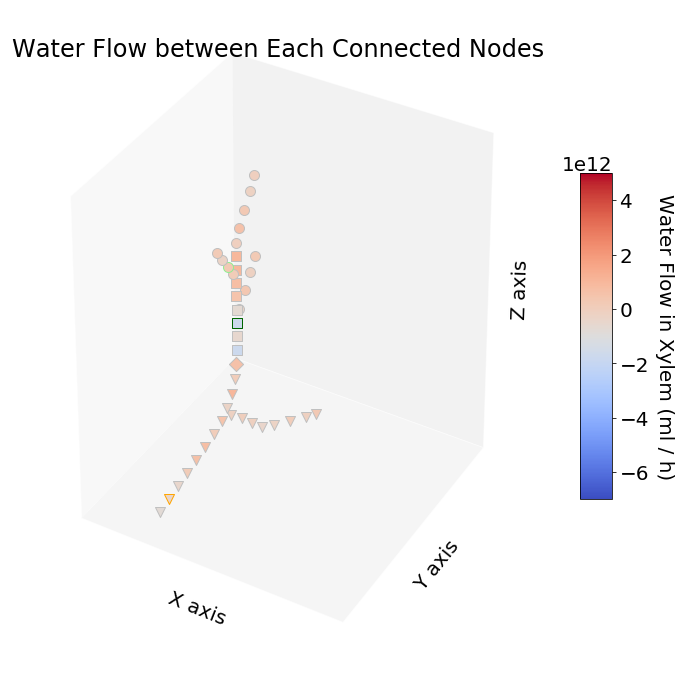

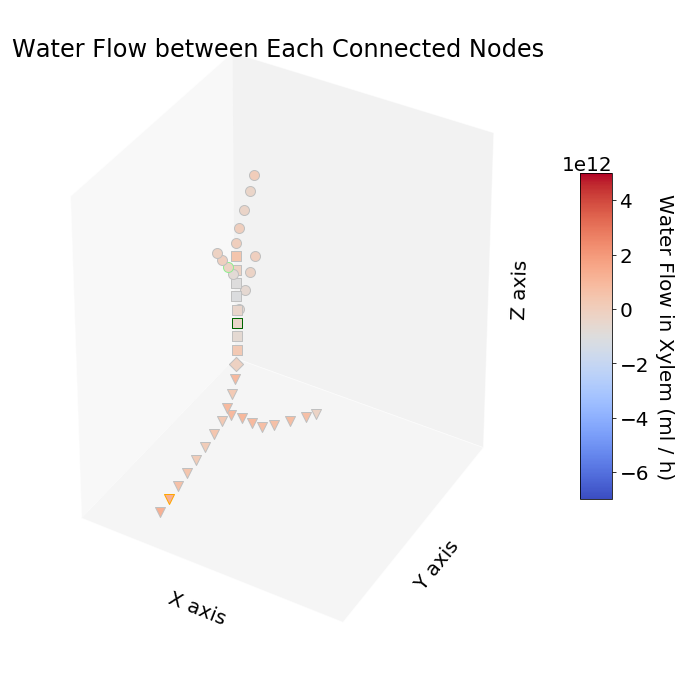

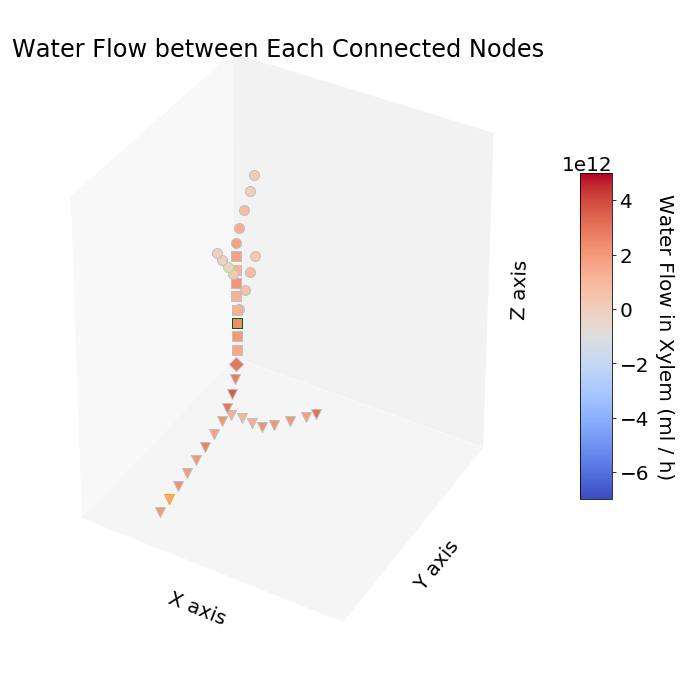

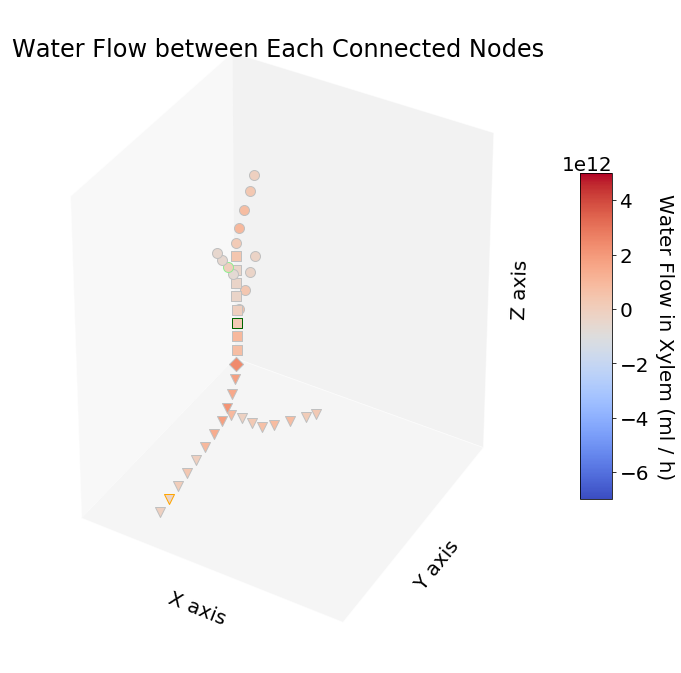

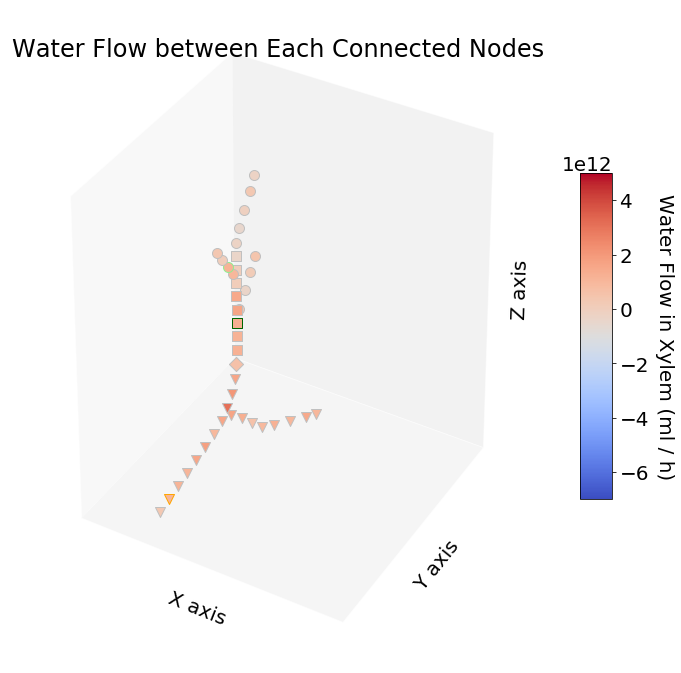

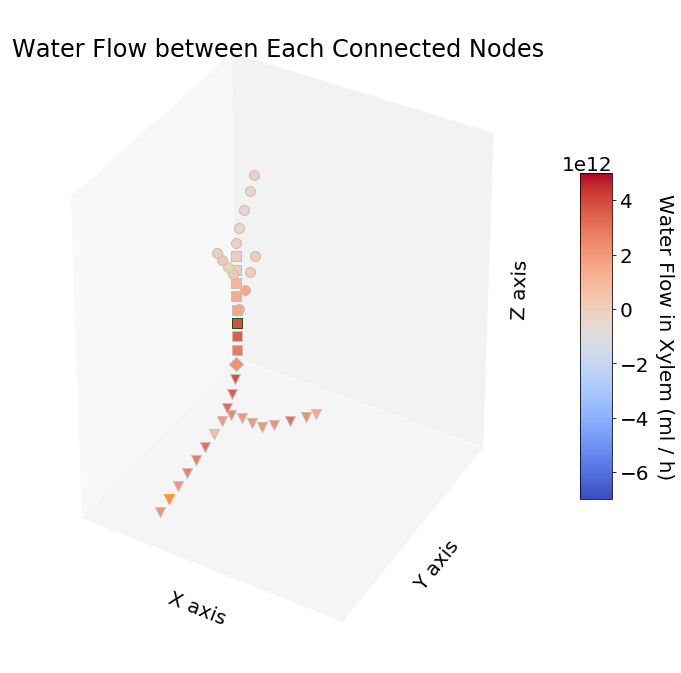

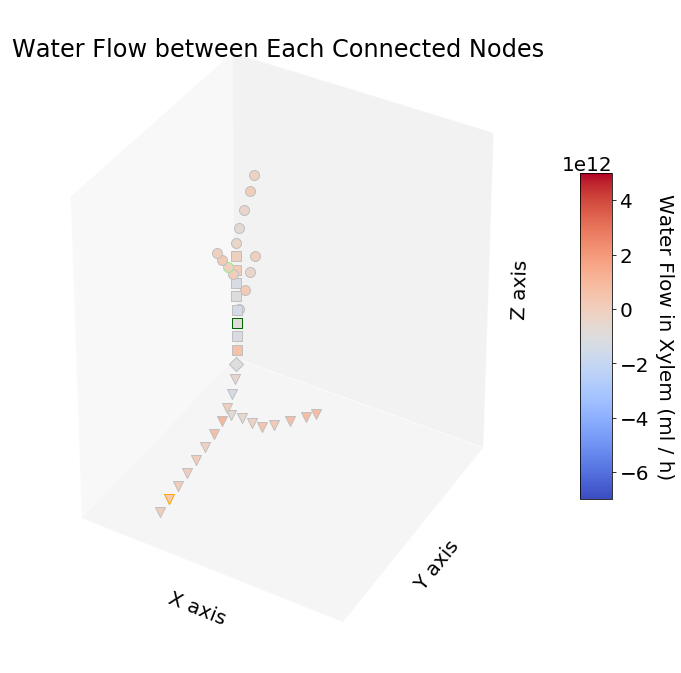

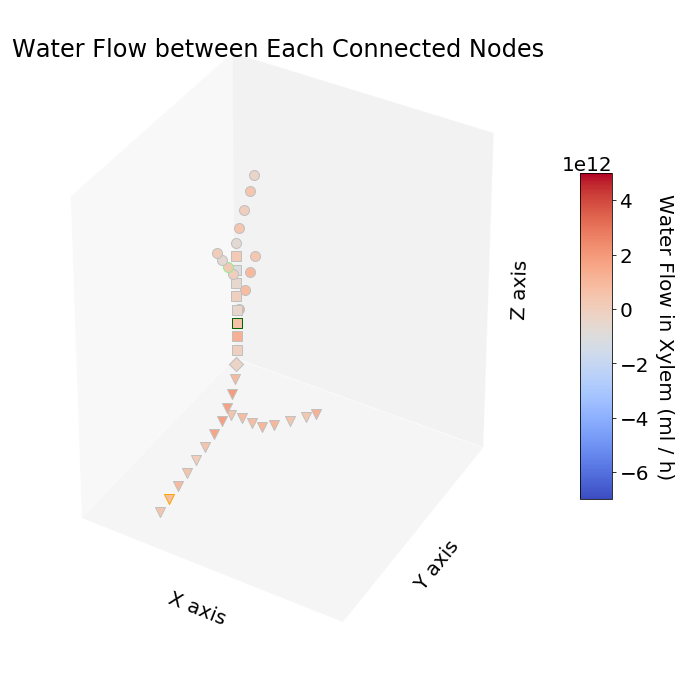

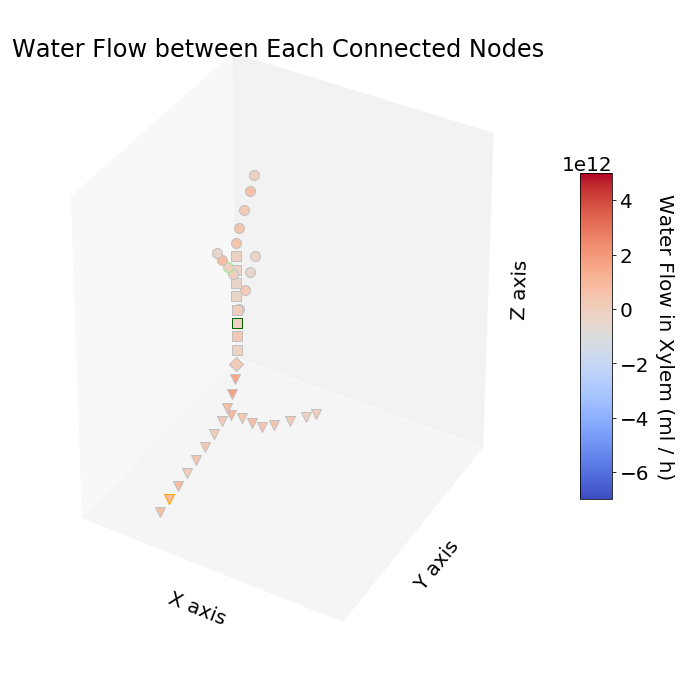

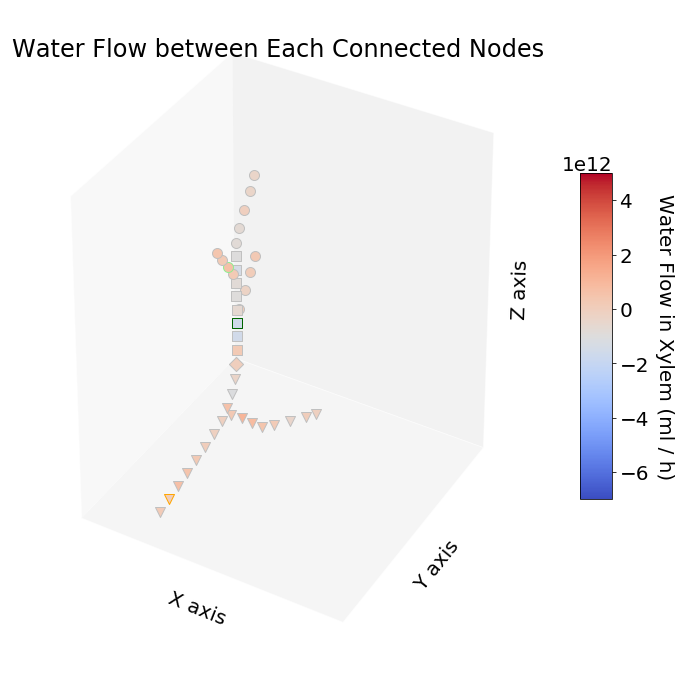

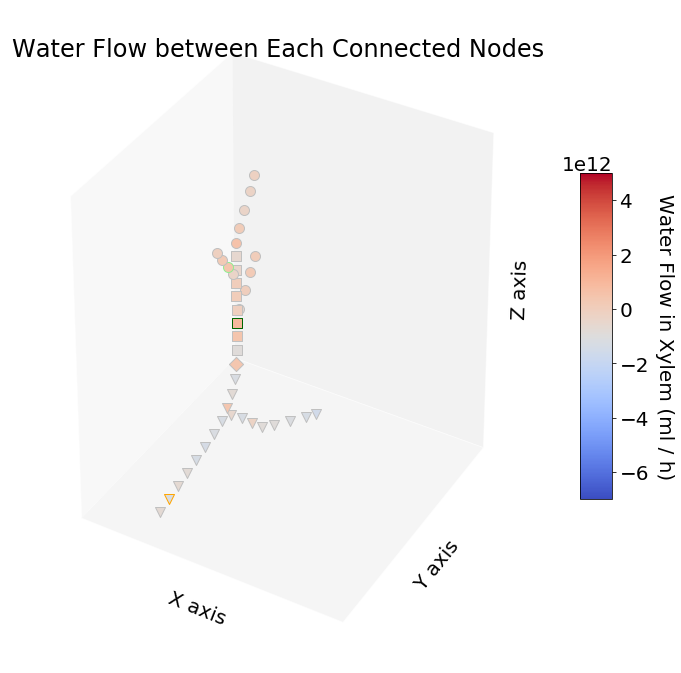

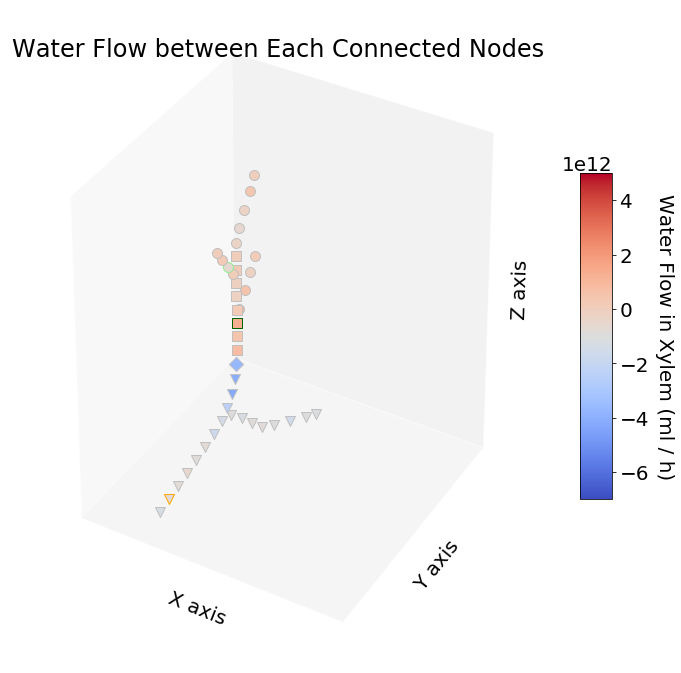

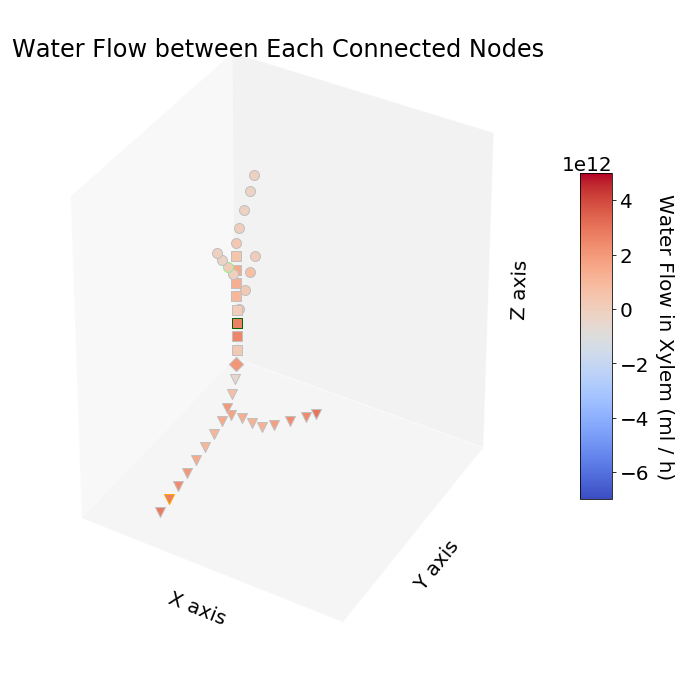

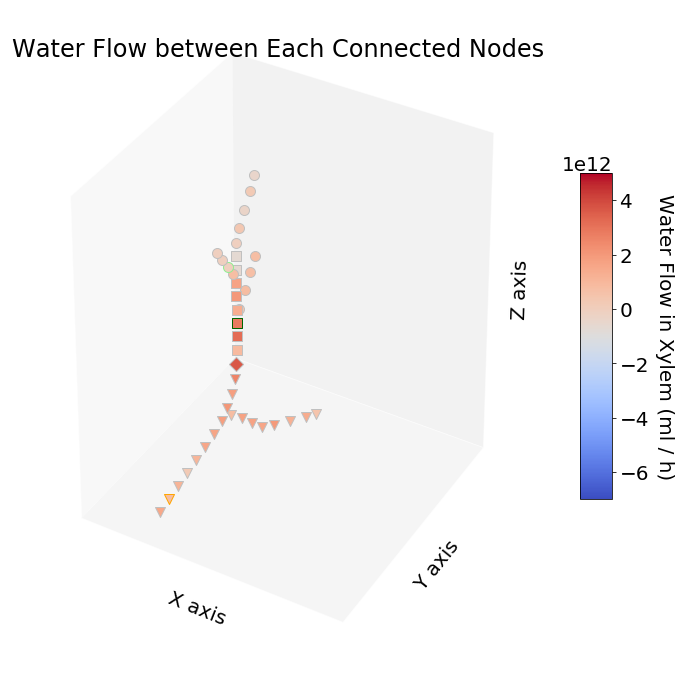

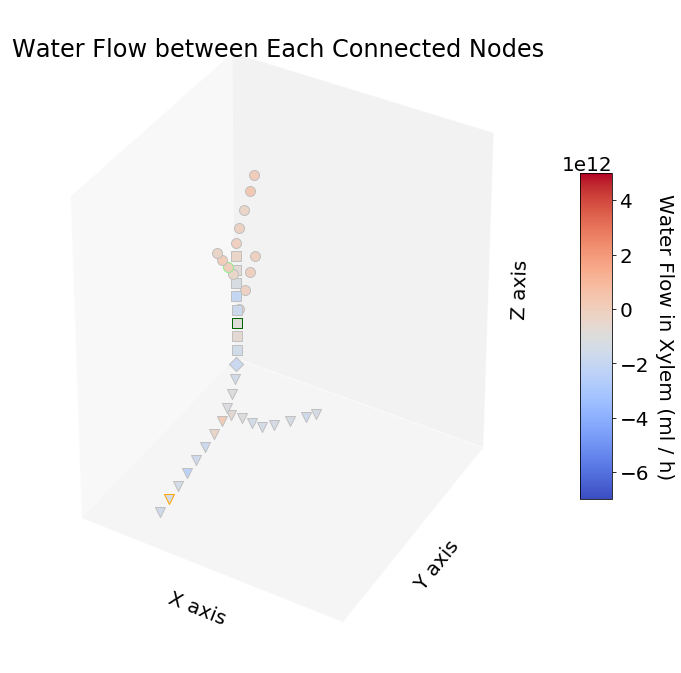

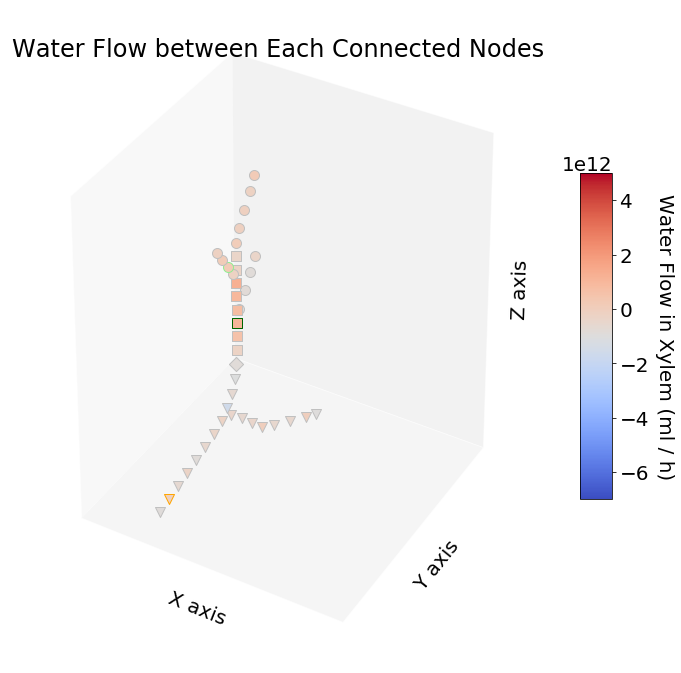

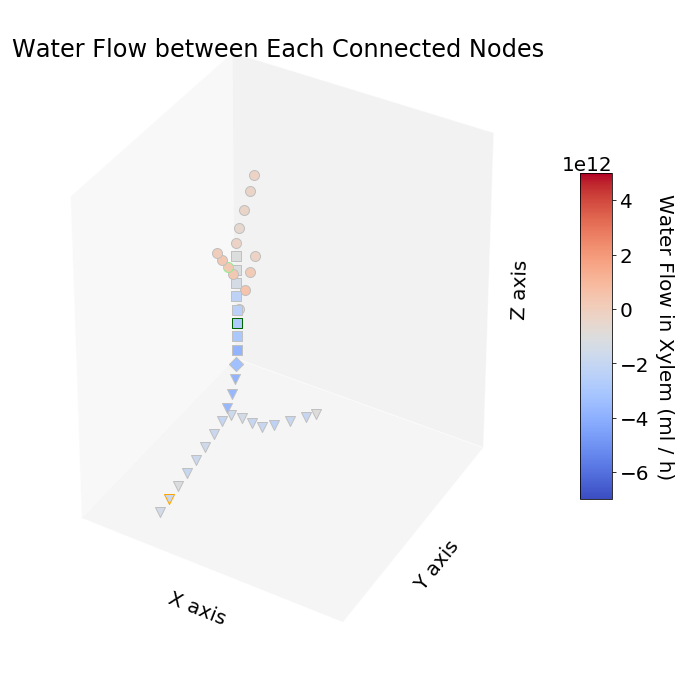

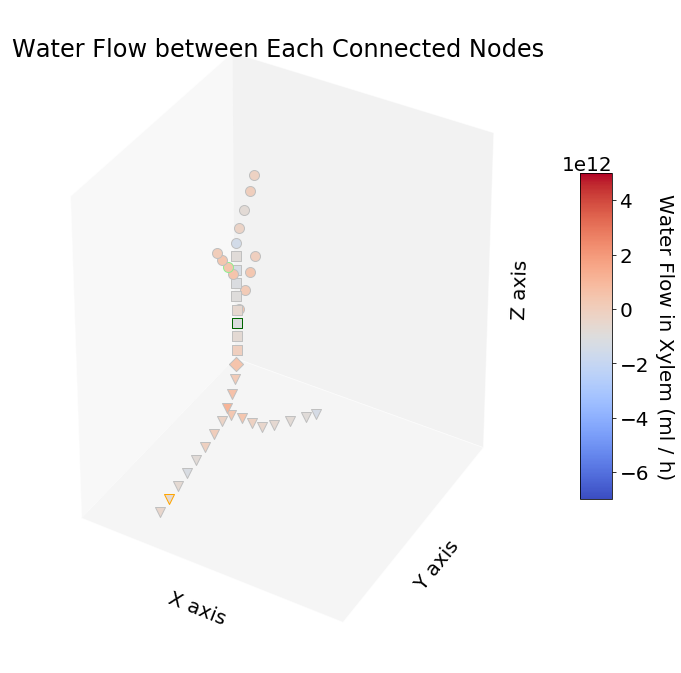

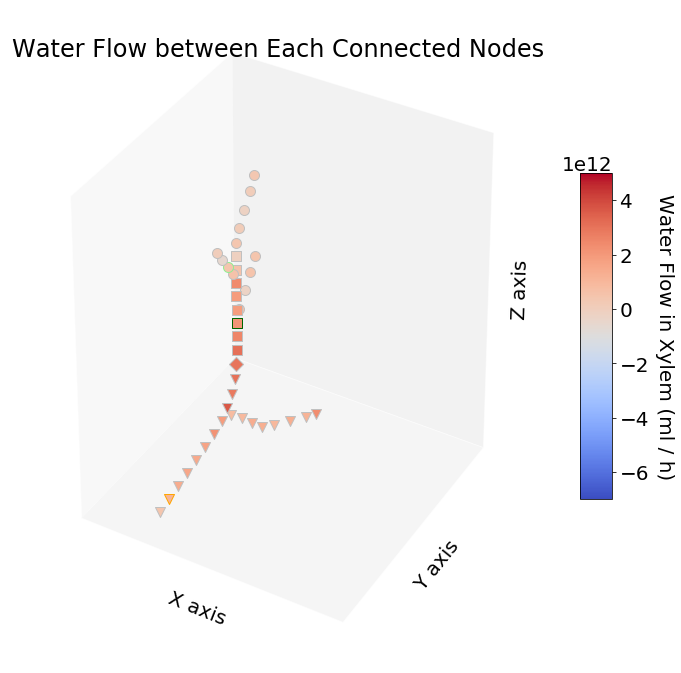

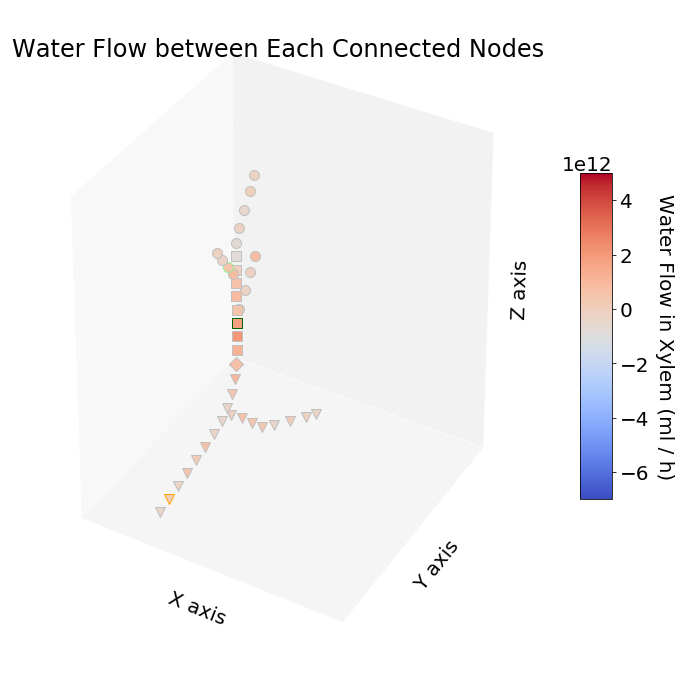

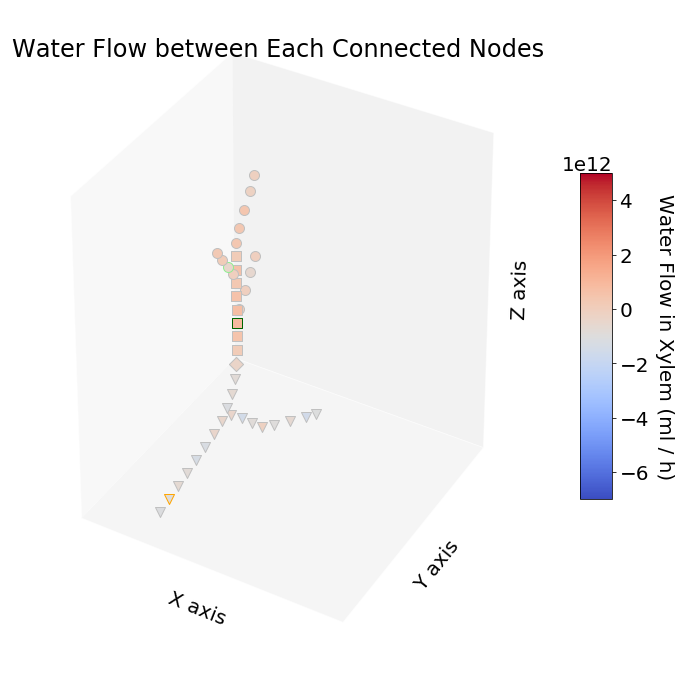

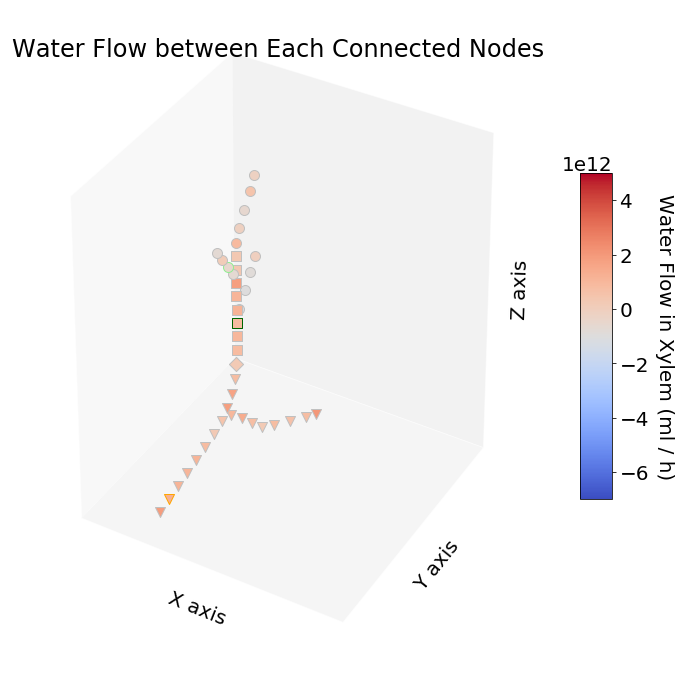

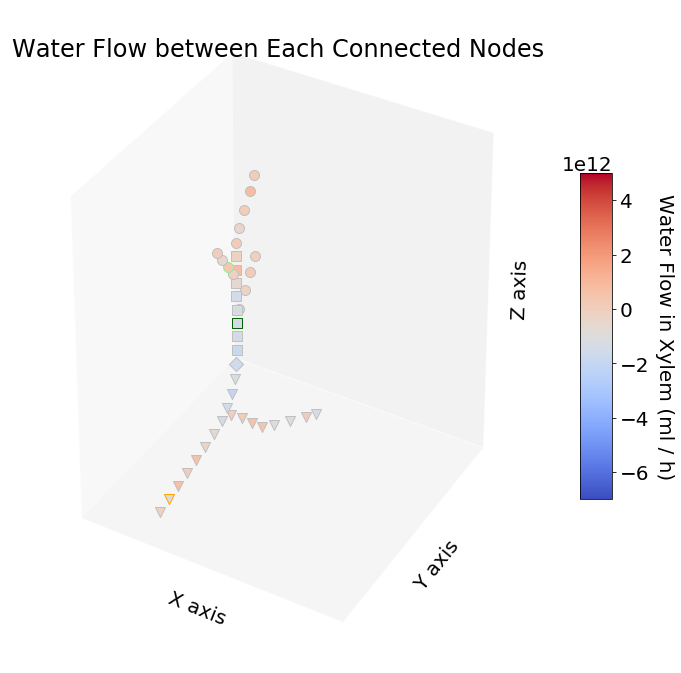

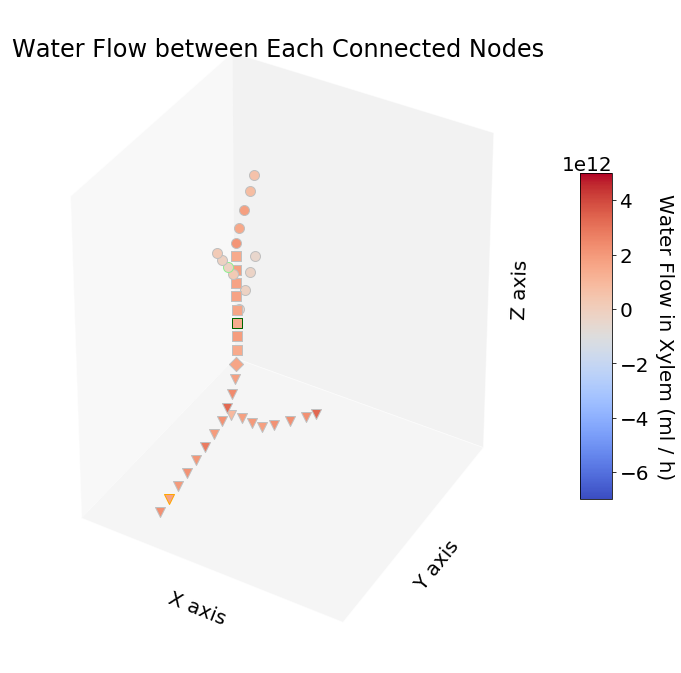

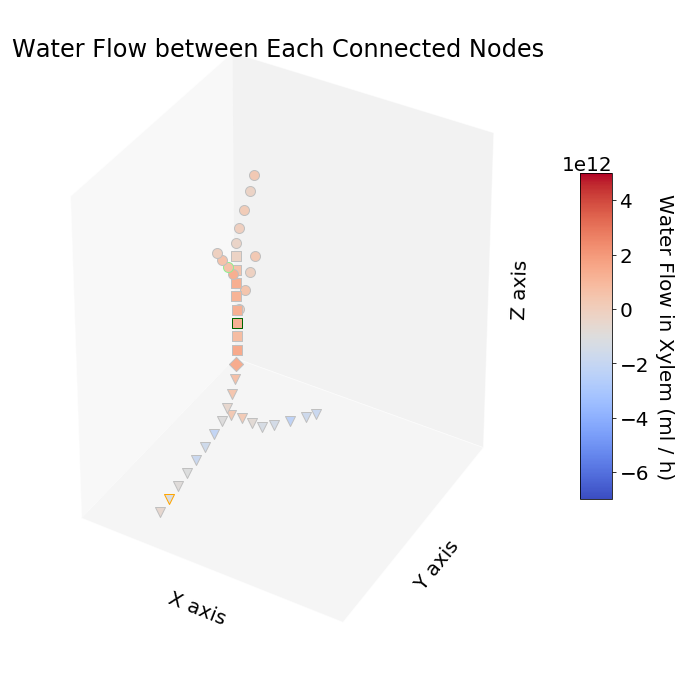

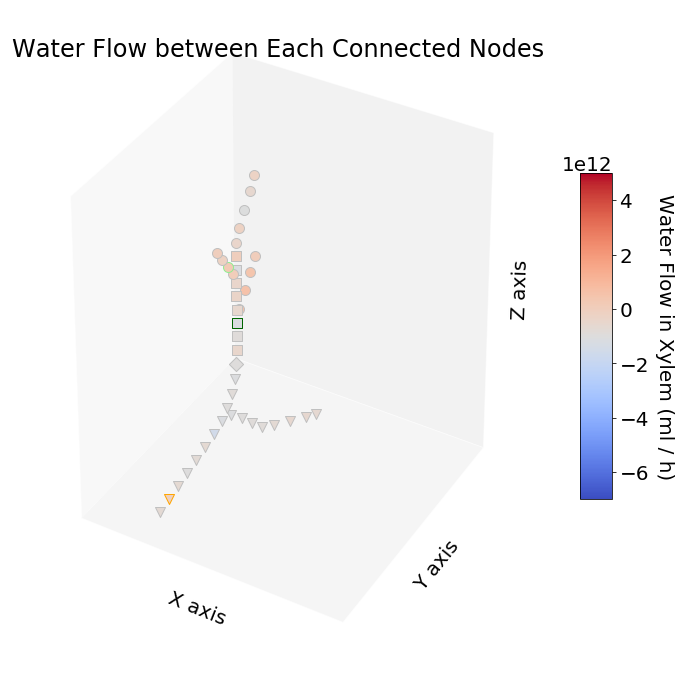

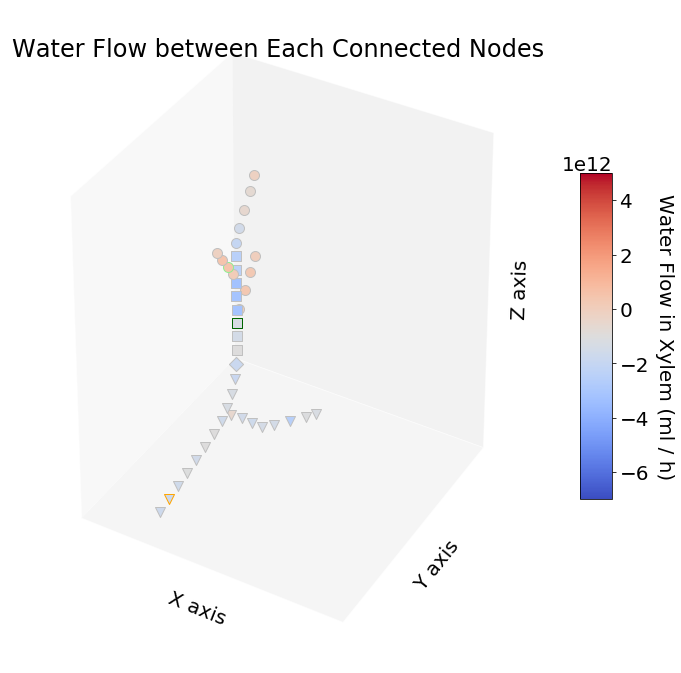

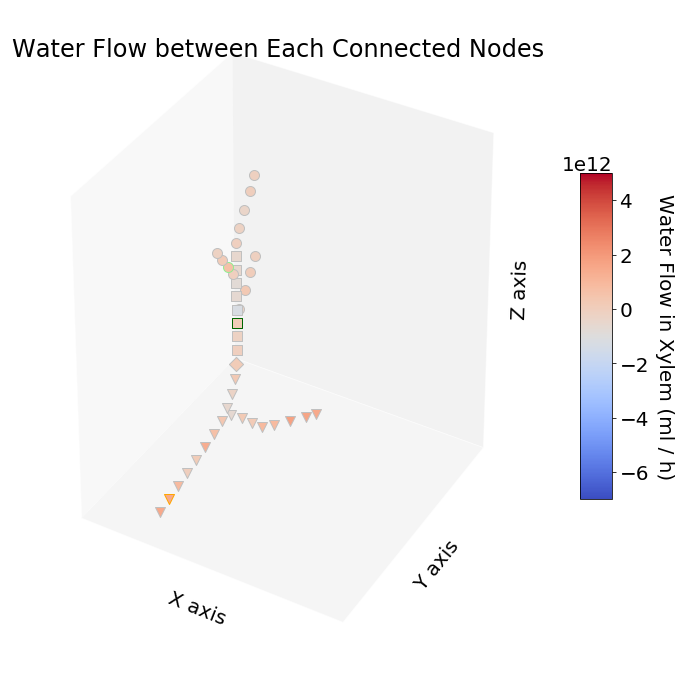

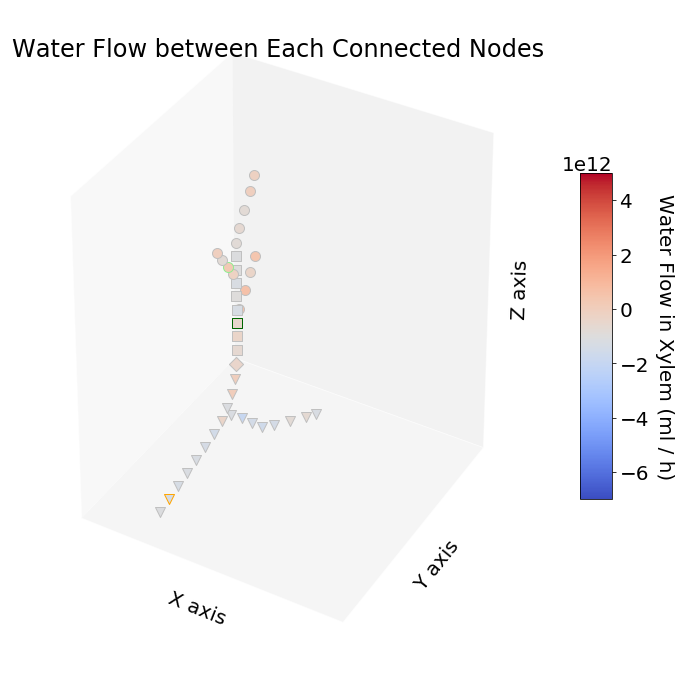

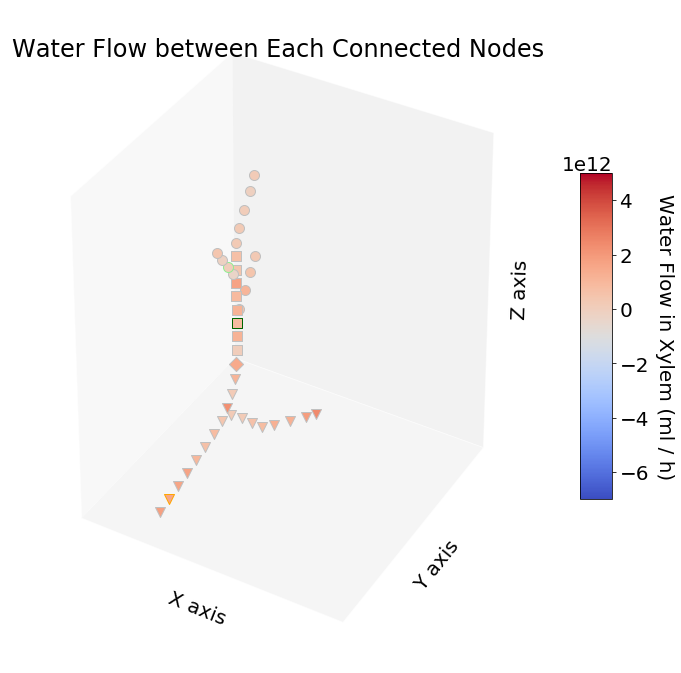

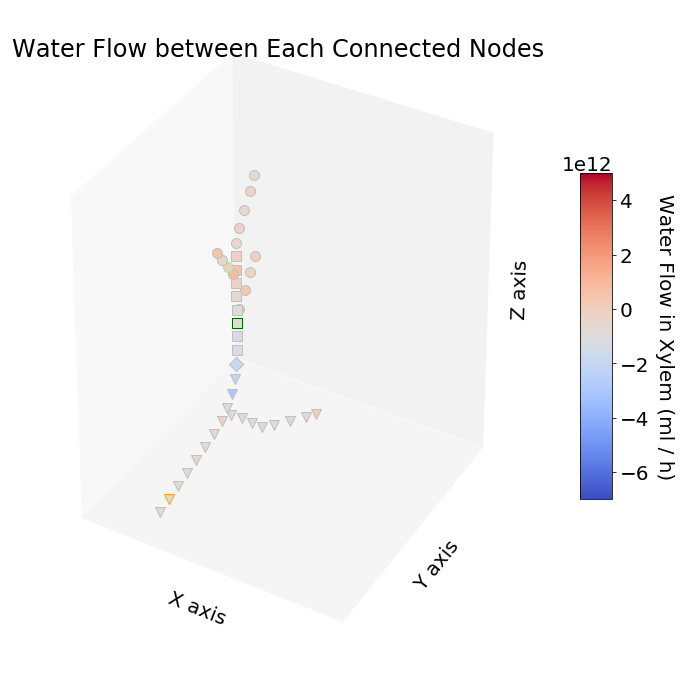

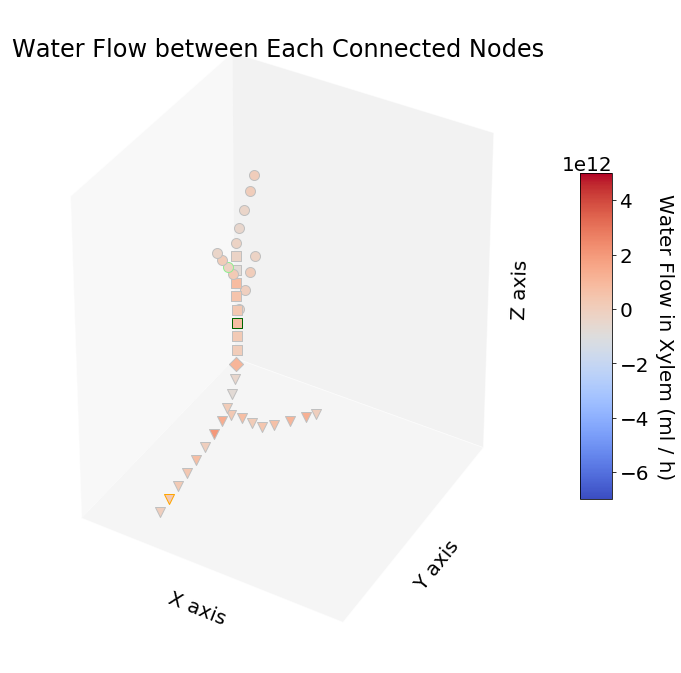

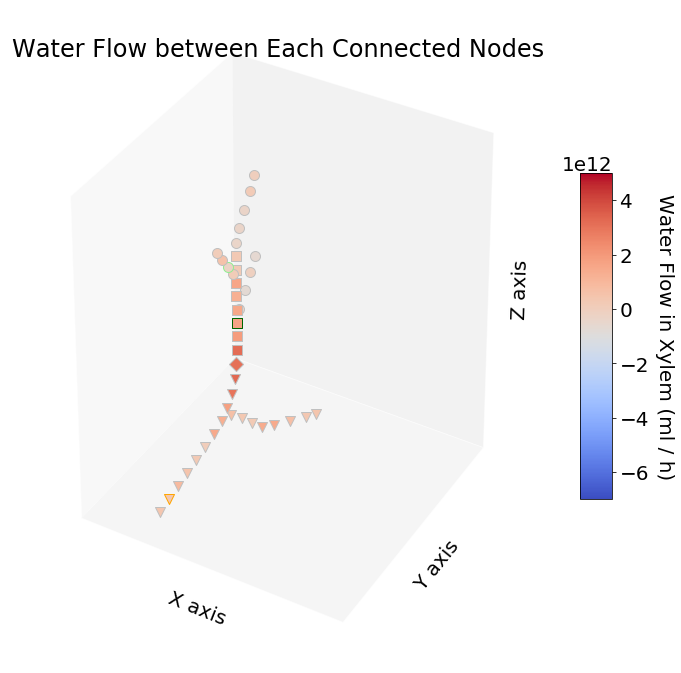

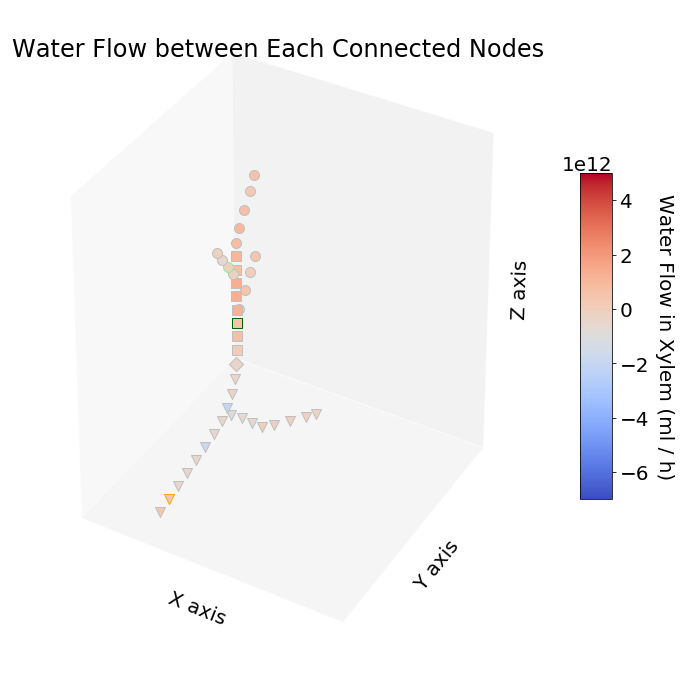

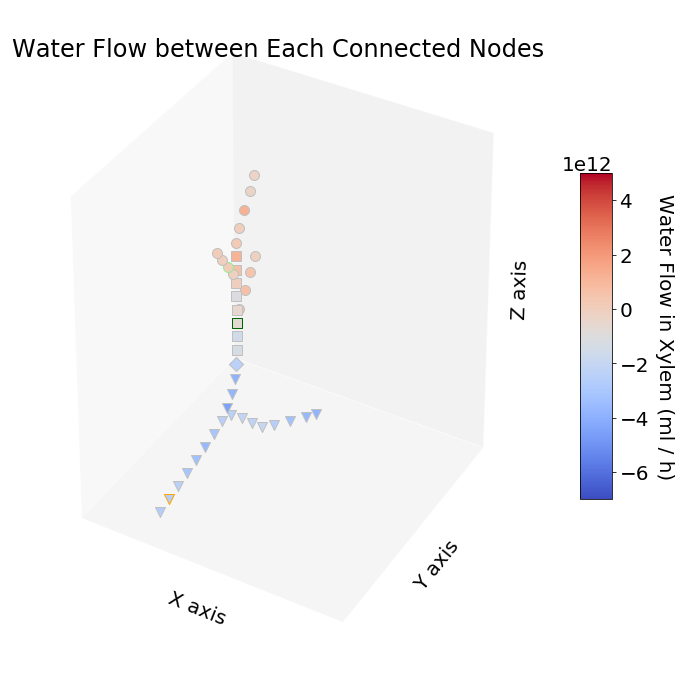

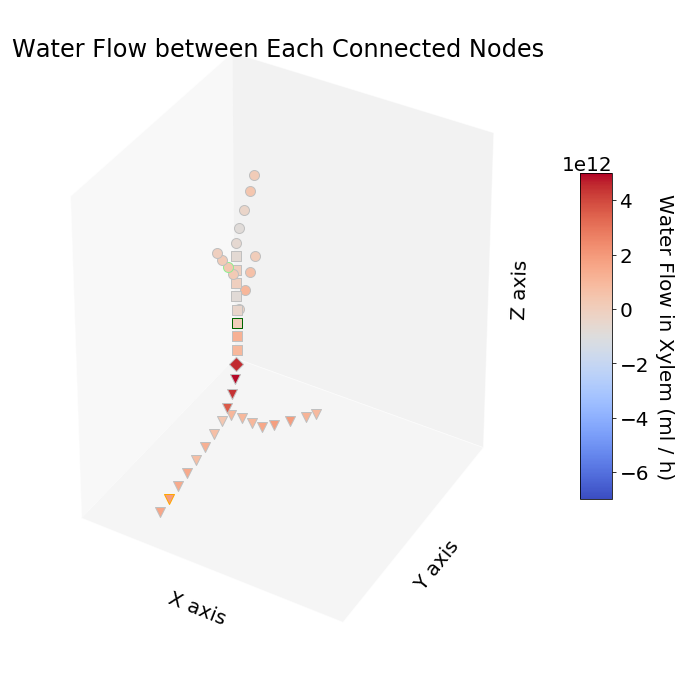

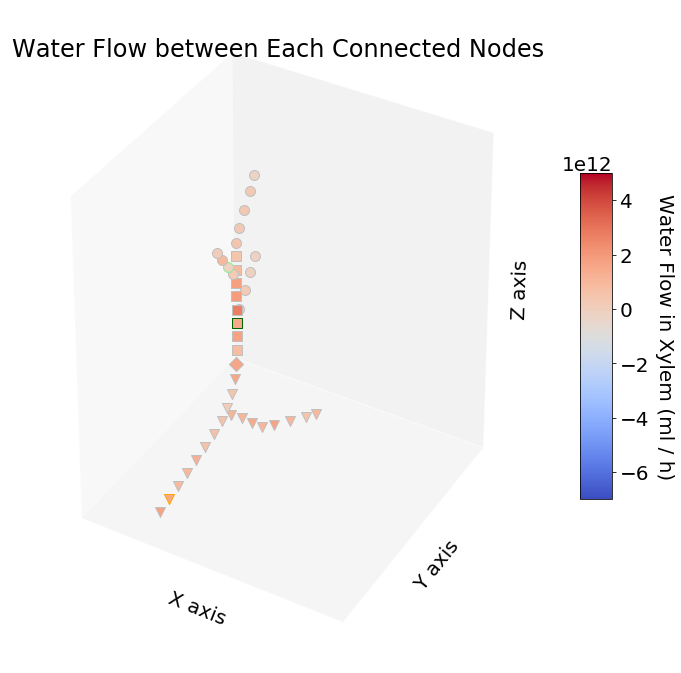

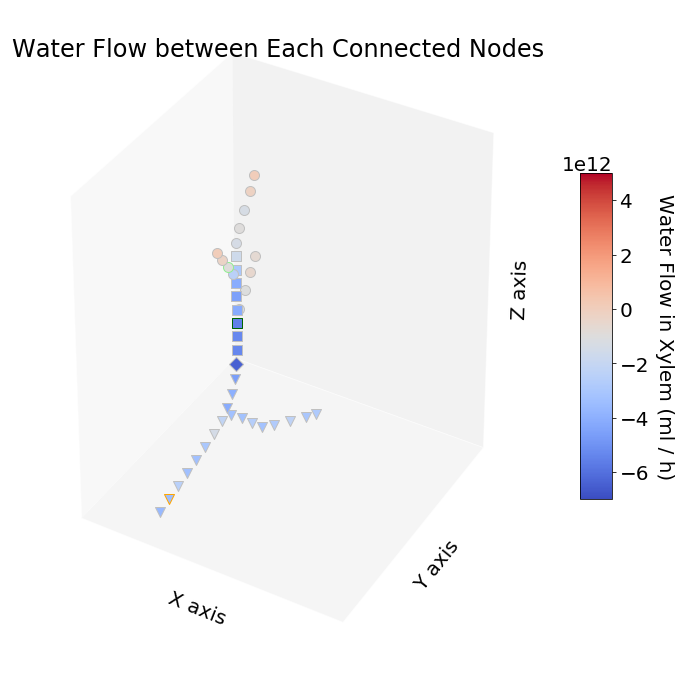

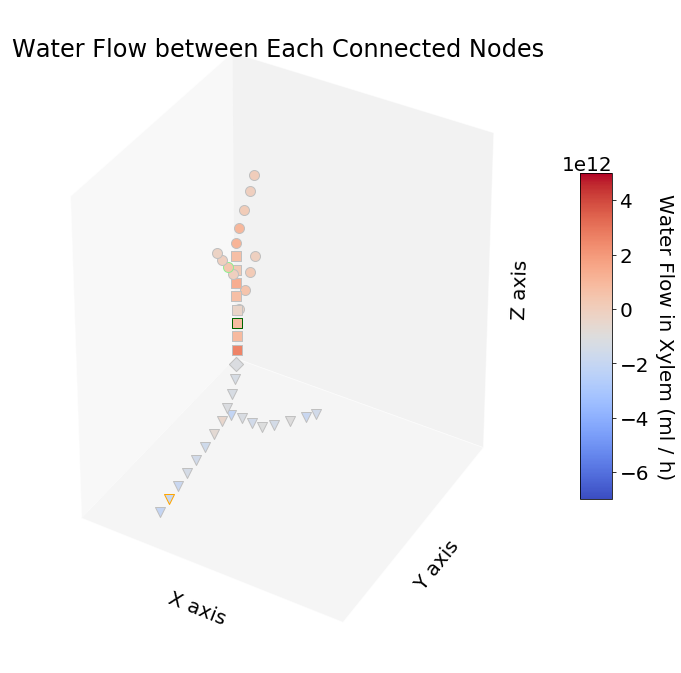

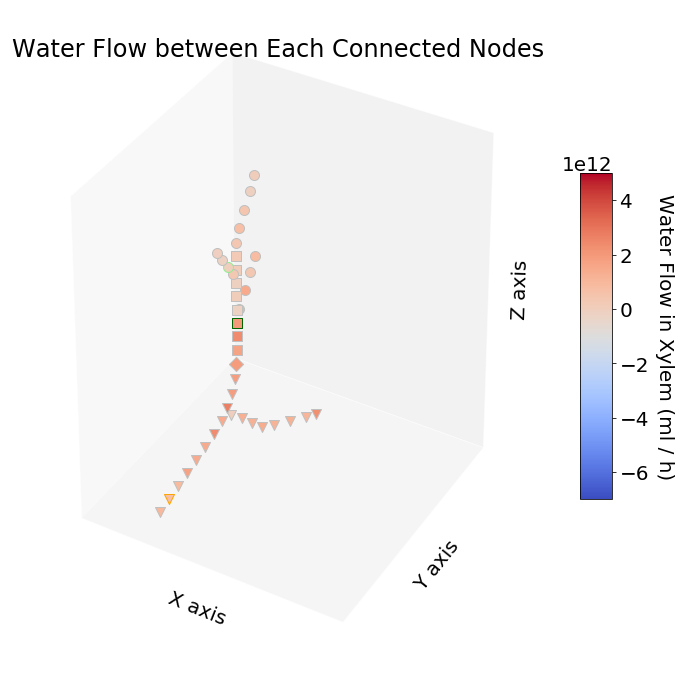

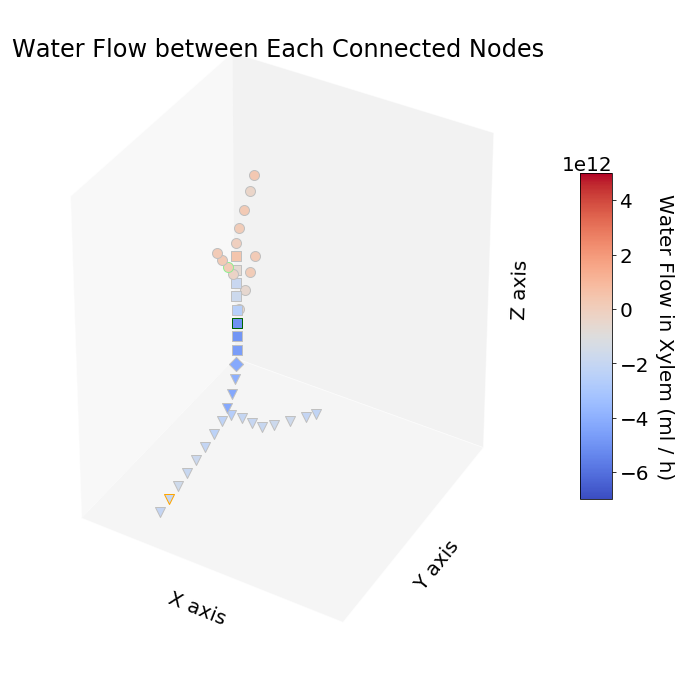

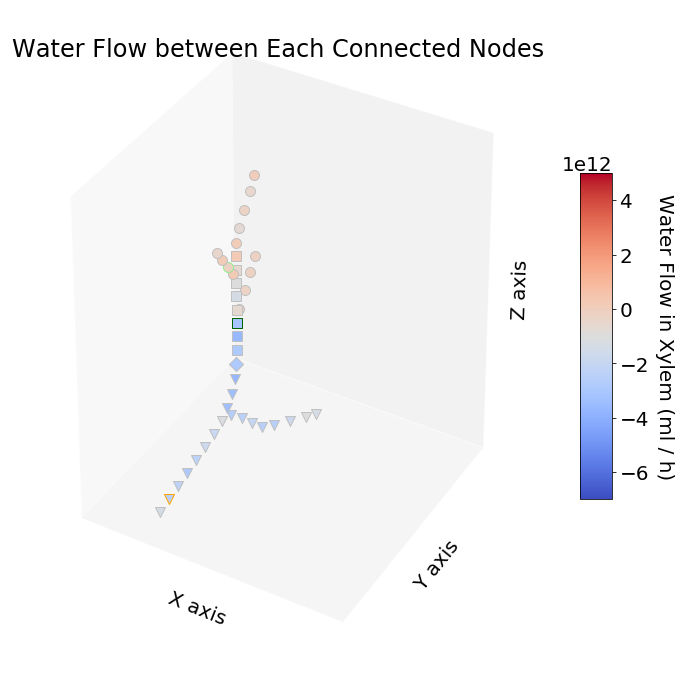

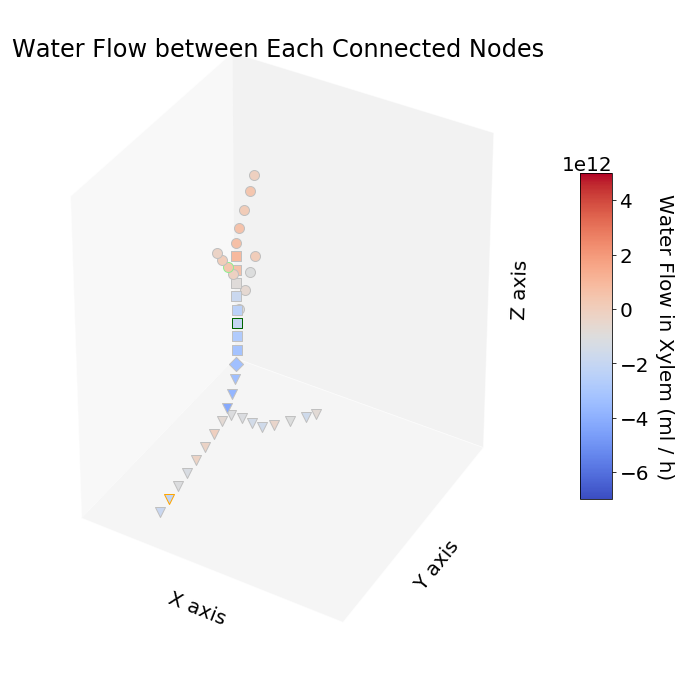

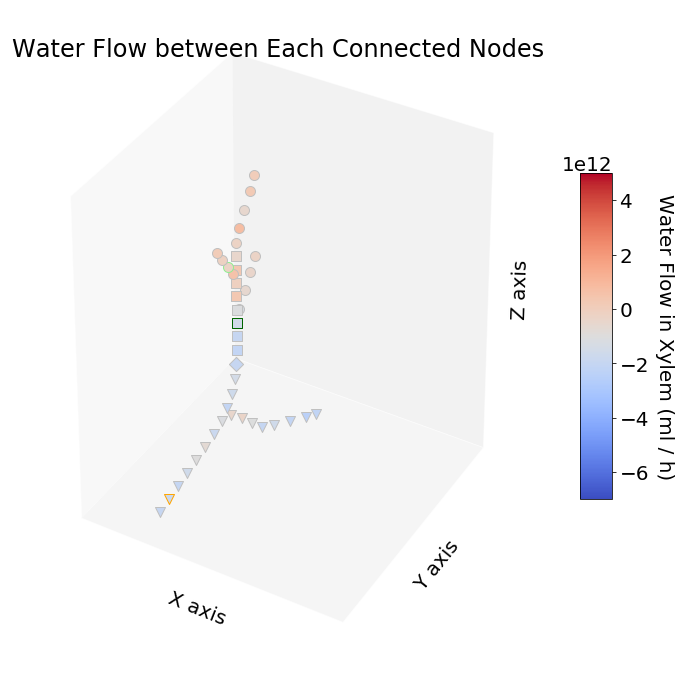

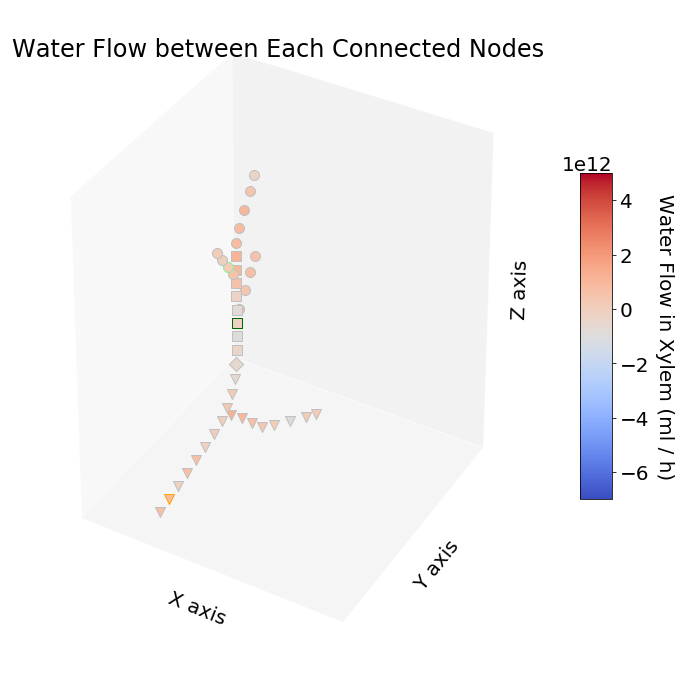

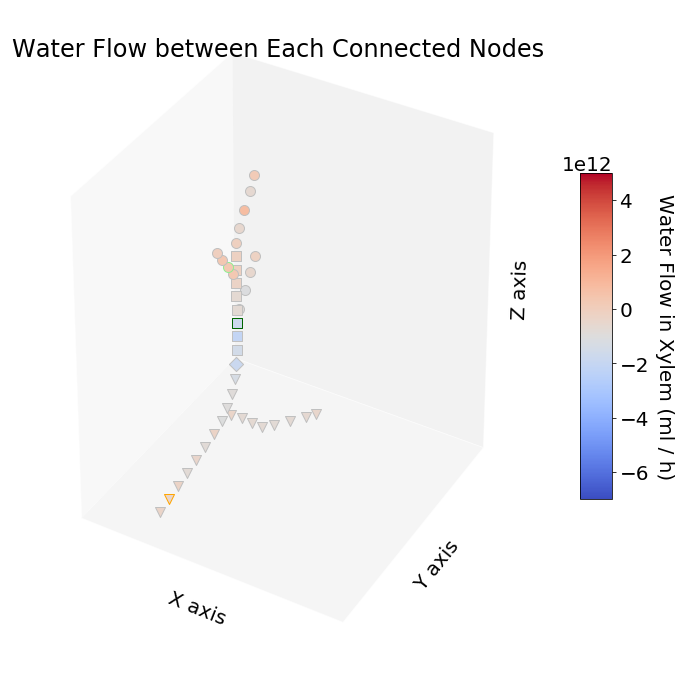

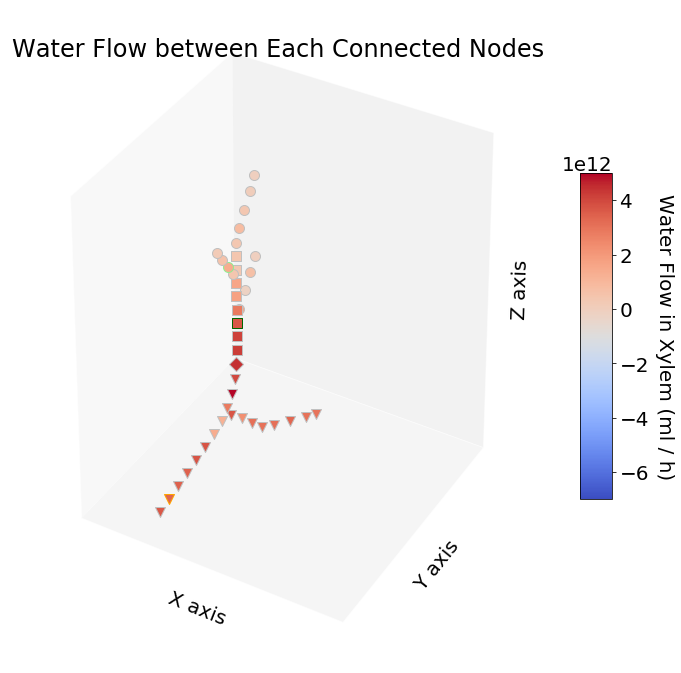

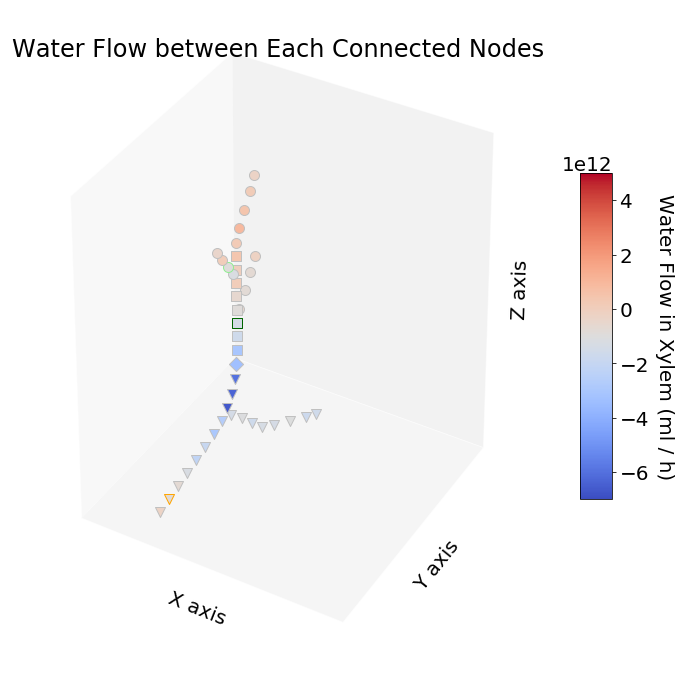

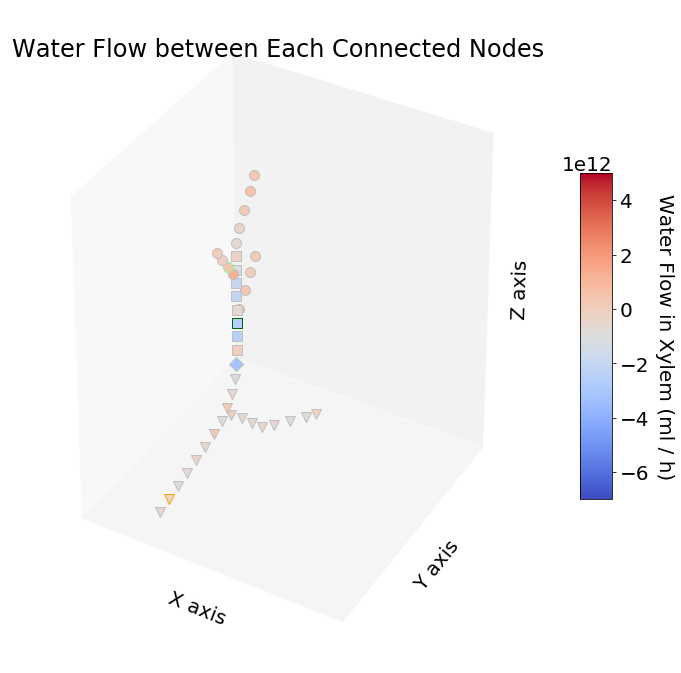

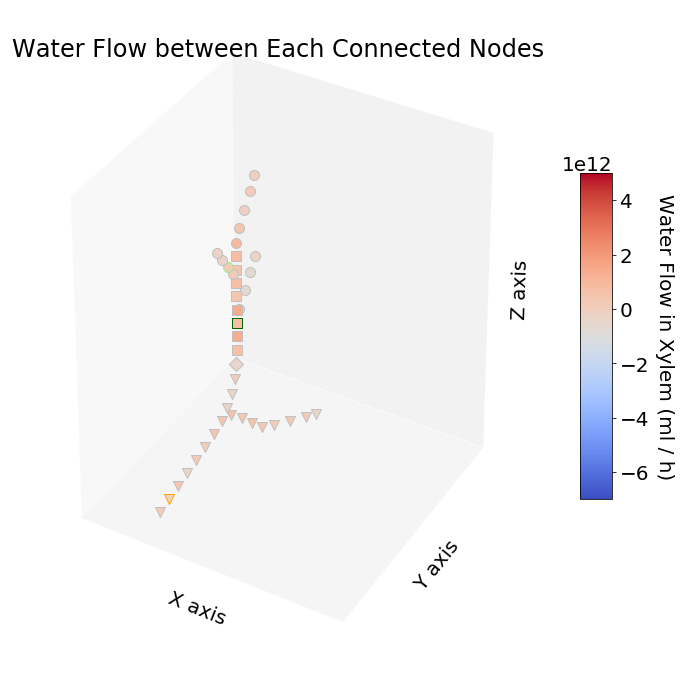

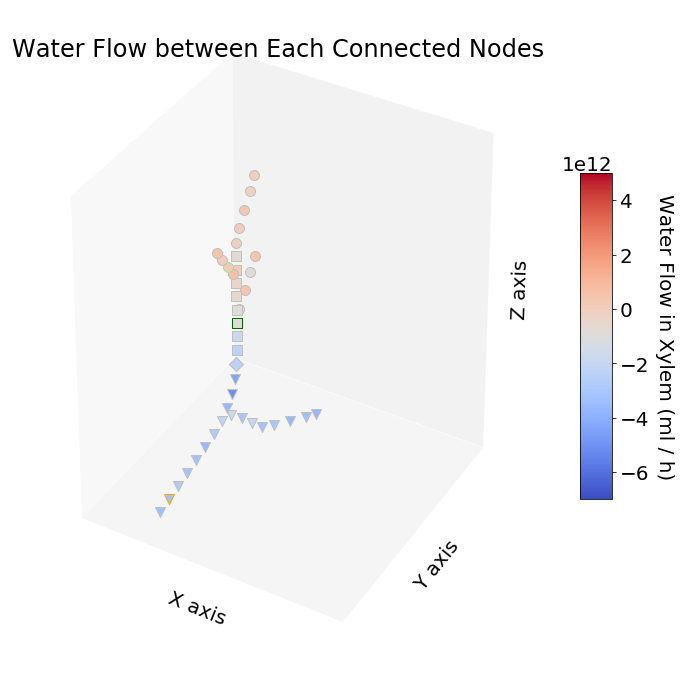

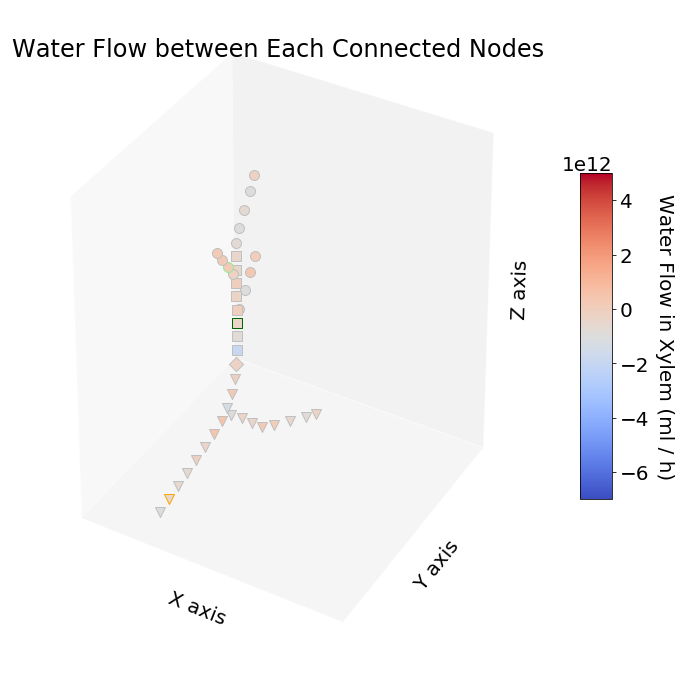

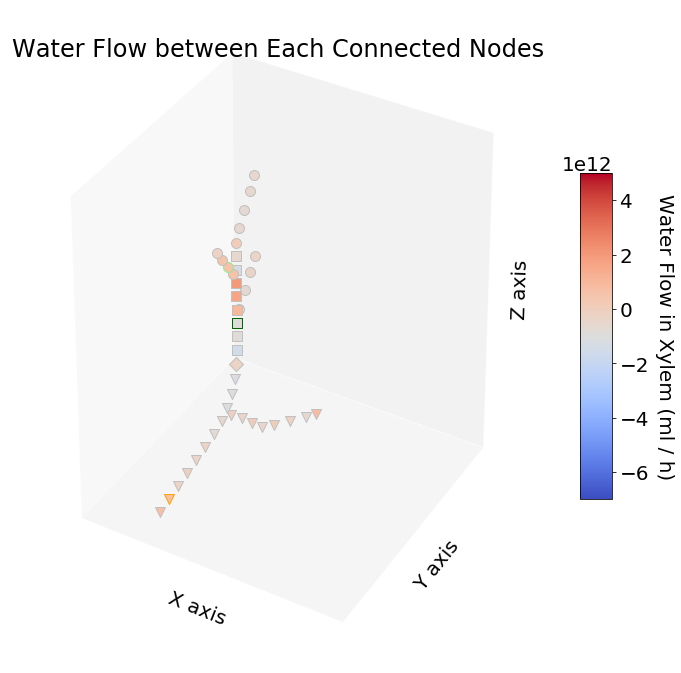

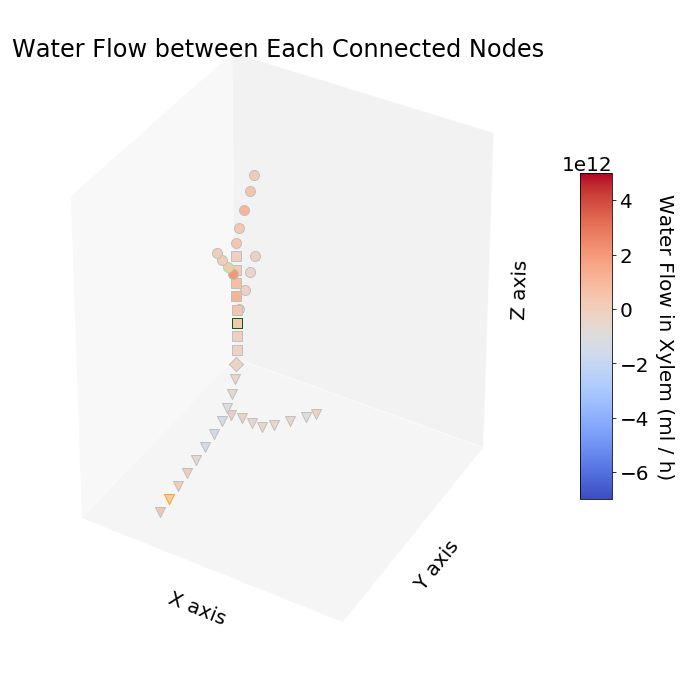

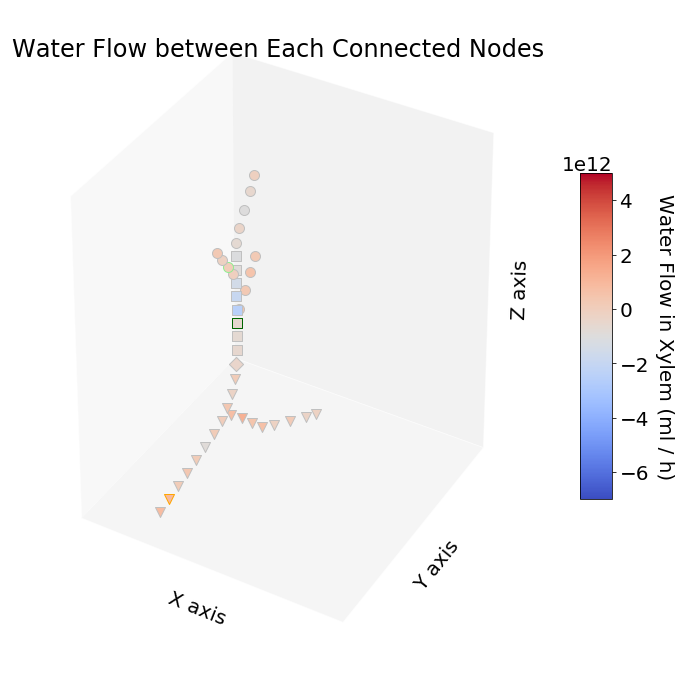

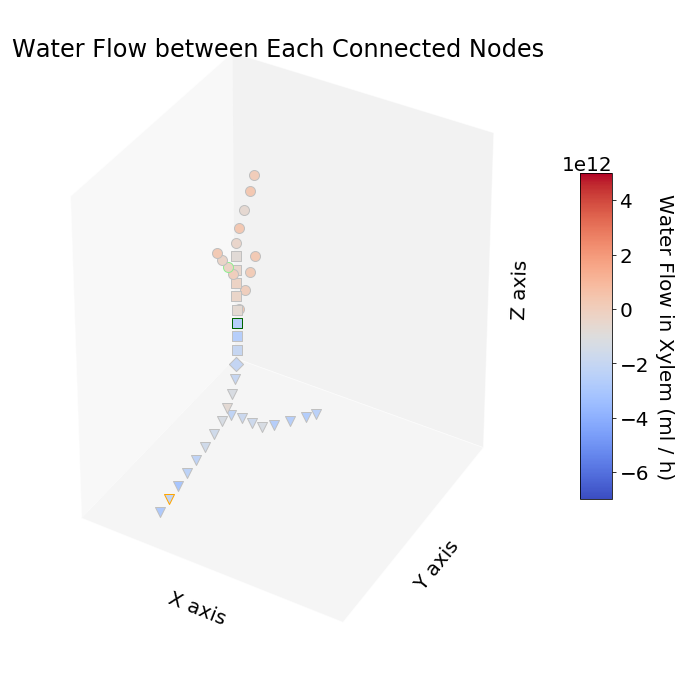

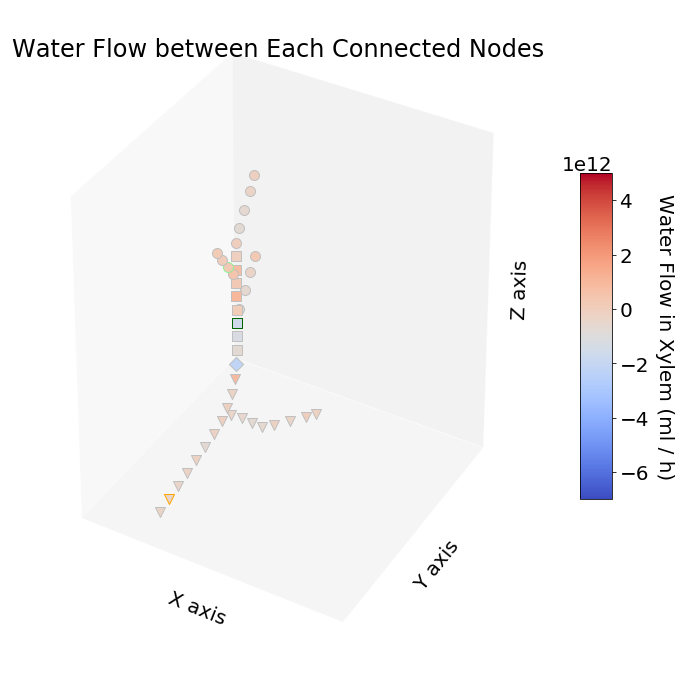

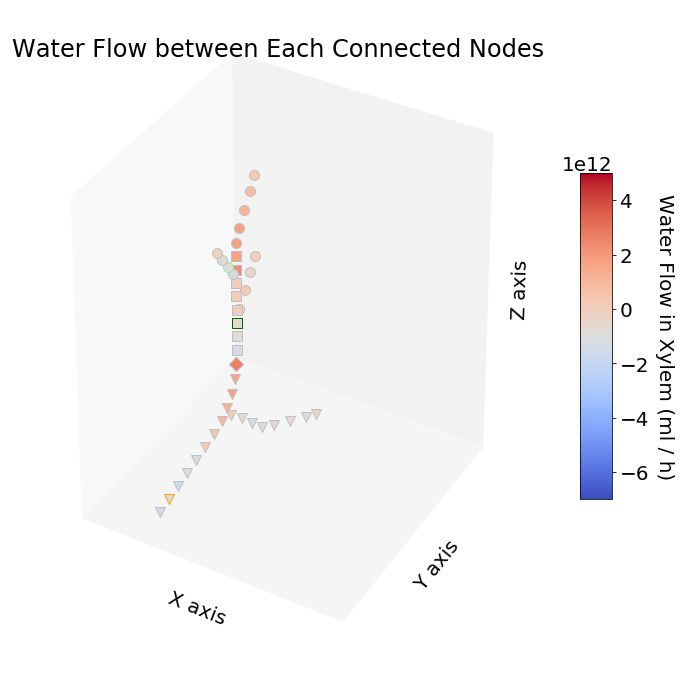

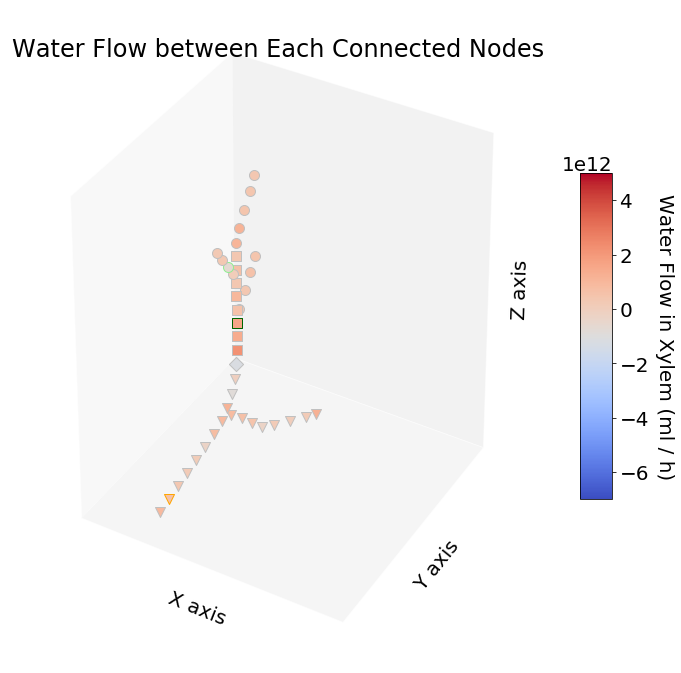

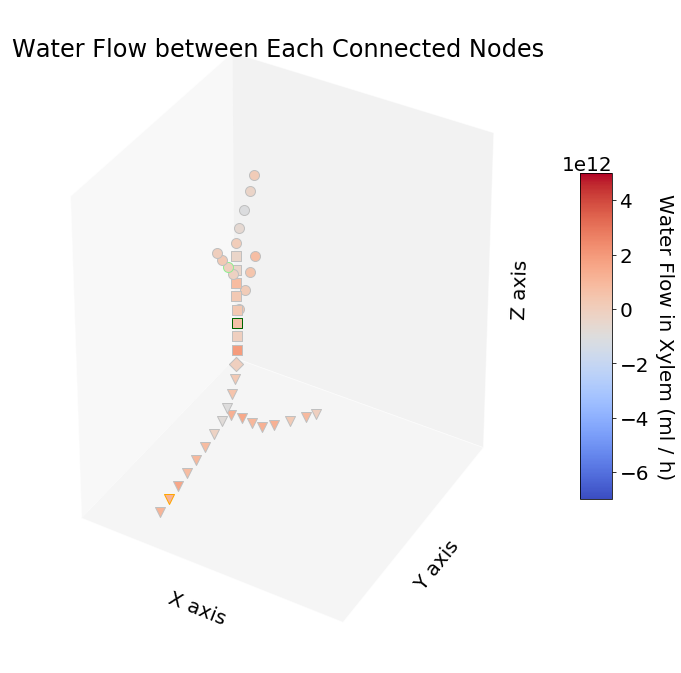

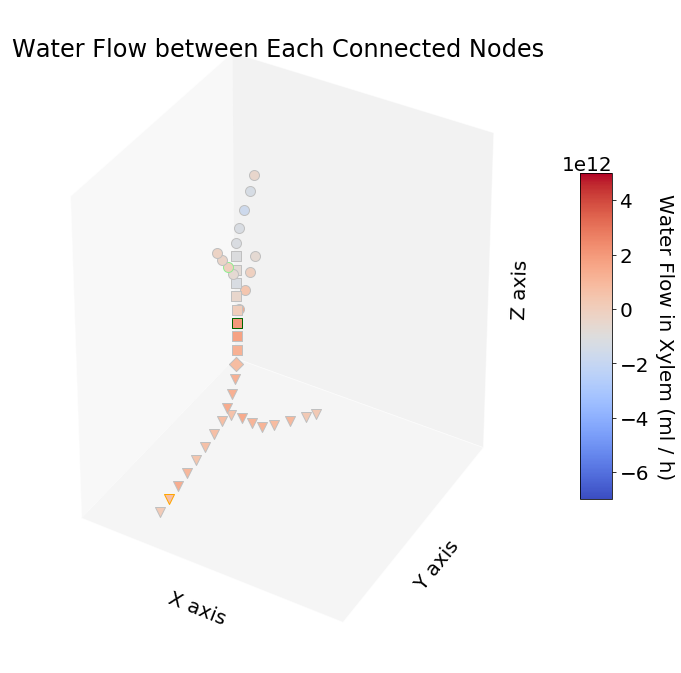

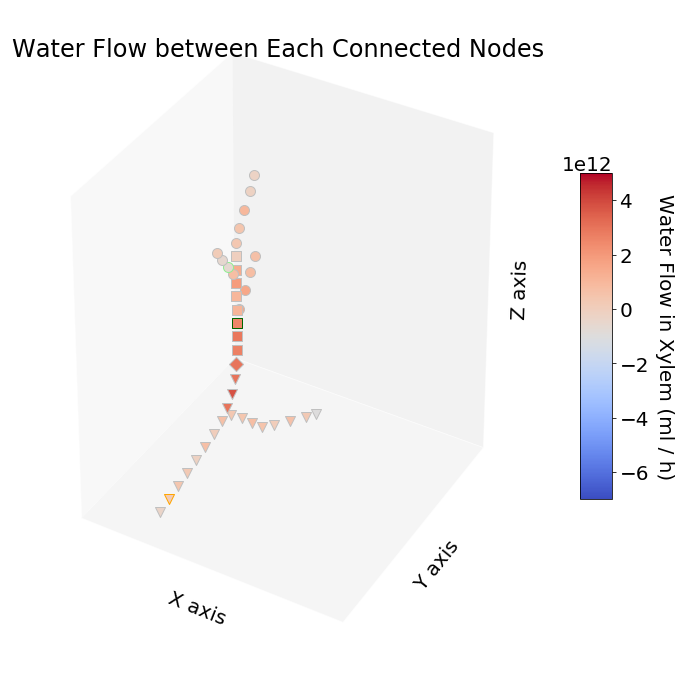

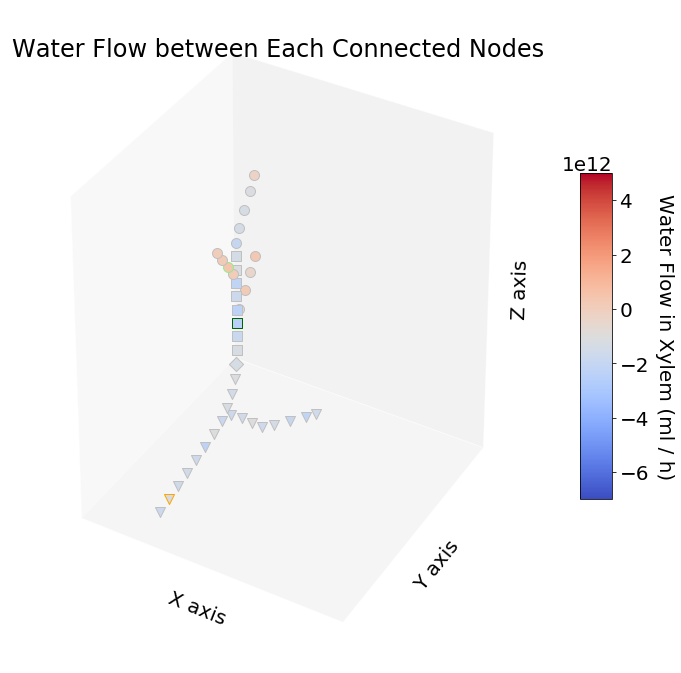

In [488]:

import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
nodes_cor = np.column_stack([nodes_organtype, nodes])

plt.rcParams['figure.figsize'] = [12, 12]
path = 'PiafMunch2_PMA1_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)
JS_ST_begin = (len(node_connection))*37-7
JS_ST_end = JS_ST_begin +(len(node_connection))
output.iloc[100, JS_ST_begin:JS_ST_end]

#JS_ST_1_out=output.iloc[2, JS_ST_begin:JS_ST_end]
#JS_ST_1_out_array = JS_ST_1_out.values
def organ_marker(int):
    if int in leaf_nodes:
    #if int == 21: #int is source 
        return 'o'
    elif int in root_nodes : #int is sink
        return 'v'
    elif int == 1 : #int is sink
        return 'D'
    #elif int == 40 :
    elif int in stem_nodes:
        return 's'
    else:
        return 'None'

cor_x =nodes_c_cor[:,0]
cor_y =nodes_c_cor[:,1]
cor_z =nodes_c_cor[:,2]
cor_m = nodes_c_marker[:,0]
    
def organ_color3(int):
    if int == 34: #int is source 
        return 'lightgreen'
    elif int == 10: #int is source 
        return 'orange'
    elif int == 22:
        return 'darkgreen'
    else:
        return 'silver'

for i in range(0,100):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')


    # Get rid of colored axes planes
    # First remove fill
    #ax.set_axis_off()
    # Get rid of the panes
    #ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the spines
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')


    ax.set_xticks([]) 
    ax.set_yticks([]) 
    ax.set_zticks([])

    # Bonus: To get rid of the grid as well:
    ax.grid(False)
    for j in range(41):
        ax.scatter(cor_x[j], cor_y[j],cor_z[j], s=100, marker = organ_marker(node_connection[j,0]) ,edgecolors= organ_color3(j),
                   c=output.iloc[i, JS_ST_begin+j:JS_ST_begin+j+1] , cmap=cm.coolwarm,  
                   alpha=1, vmin=-7e12, vmax=5e12)
        
    #connectionflow = ax.scatter(cor_x, cor_y, cor_z, s=100 , c=output.iloc[i, JS_ST_begin:JS_ST_end] , cmap=cm.coolwarm, alpha=1, vmin=-7e12, vmax=5e12) #vmin = 0, vmax =0.0005

    
    
    plt.rcParams.update({'font.size': 20})

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_xlim3d(0, 0.03)
    ax.set_ylim3d(0.03 ,0)
    ax.set_zlim3d(-0.03,0.02)
    #plt.title('Carbon Flow at Time {:.2f} (Hours)'.format(output.iloc[i, 0]))
    plt.title('Water Flow between Each Connected Nodes at Time {:.2f} (hour)'.format(output.iloc[i, 0]))

    #ax.elev = 89.9
    #ax.azim = 270.1
    #ax.dist = 8.0
    #ax.view_init(0, 90)

    cbar = fig.colorbar(connectionflow, shrink=0.5, aspect=10 )
    cbar.ax.get_yaxis().labelpad = 25
    #cbar.ax.set_ylabel('Carbon Flow in Sieve Tube (mmol / h)', rotation=270)
    cbar.ax.set_ylabel('Water Flow in Xylem (ml / h)', rotation=270)
    
    green_star1 = mlines.Line2D([], [],color='darkgreen', markerfacecolor='white', marker='s', linestyle='',
                          markersize=12, label='Connection between 24th and 23th node')
    orange_cross1 = mlines.Line2D([], [],color='orange', markerfacecolor='white', marker='v', linestyle='',
                              markersize=12, label='Connection between 19th and 20th node')
    lgreen_circle1 = mlines.Line2D([], [],color='lightgreen', markerfacecolor='white', marker='o', linestyle='',
                              markersize=12, label='Connection between 33th and 32th node')
    star1 = mlines.Line2D([], [], color='silver', marker='s', linestyle='',
                              markersize=10,markerfacecolor='white', label='Connection between nodes of CPlantBox Stem')
    cross1 = mlines.Line2D([], [], color='silver', marker='v', linestyle='',
                              markersize=10,markerfacecolor='white', label='Connection between nodes of CPlantBox Root')
    circle1 = mlines.Line2D([], [], color='silver', marker='o', linestyle='',
                              markersize=10, markerfacecolor='white',label='Connection between nodes of CPlantBox Leaf')




    plt.legend(handles=[green_star1,orange_cross1, lgreen_circle1, star1, cross1, circle1],
               bbox_to_anchor=(0.42, 0.245), loc=2, borderaxespad=0. , fontsize = 12)

    
    filename='step{:02d}.png'.format(i)
    plt.savefig(filename, dpi=96)
    plt.show()

# Then use image magick (this is bash, not python)
#convert -delay 80 *.png animated_chart.gif



#fig.savefig("{}.pdf".format('JW_ST'), bbox_inches='tight')


#def animate(i):
#    connectionflow.set_c(output.iloc[i, JS_ST_begin:JS_ST_end])  # update the data
#    return connectionflow


# Init only required for blitting to give a clean slate.
#def init():
#    connectionflow.set_c(output.iloc[1, JS_ST_begin:JS_ST_end])
#    return connectionflow

#ani = animation.FuncAnimation(fig, animate, np.arange(1, 100), init_func=init,
#                              interval=25, blit=True)
#plt.show()

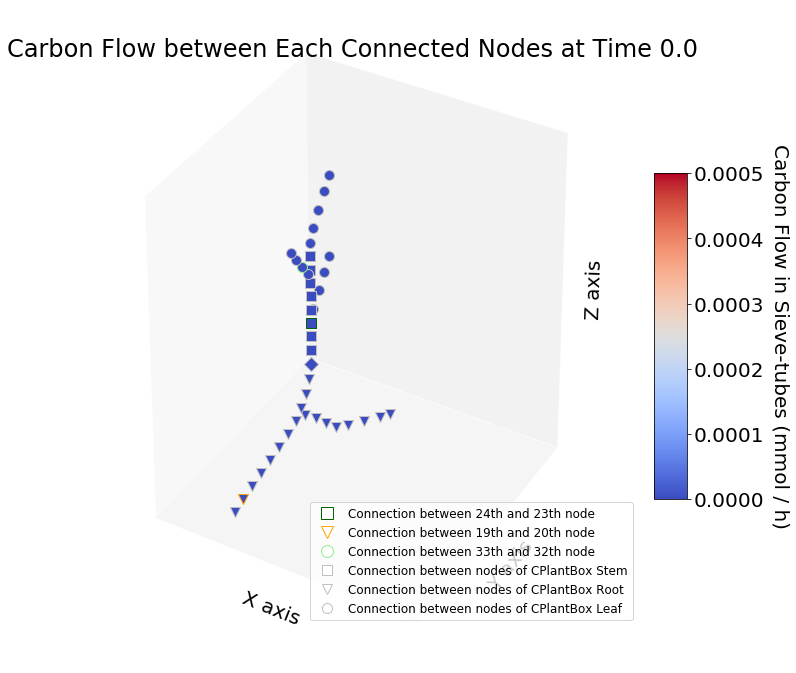

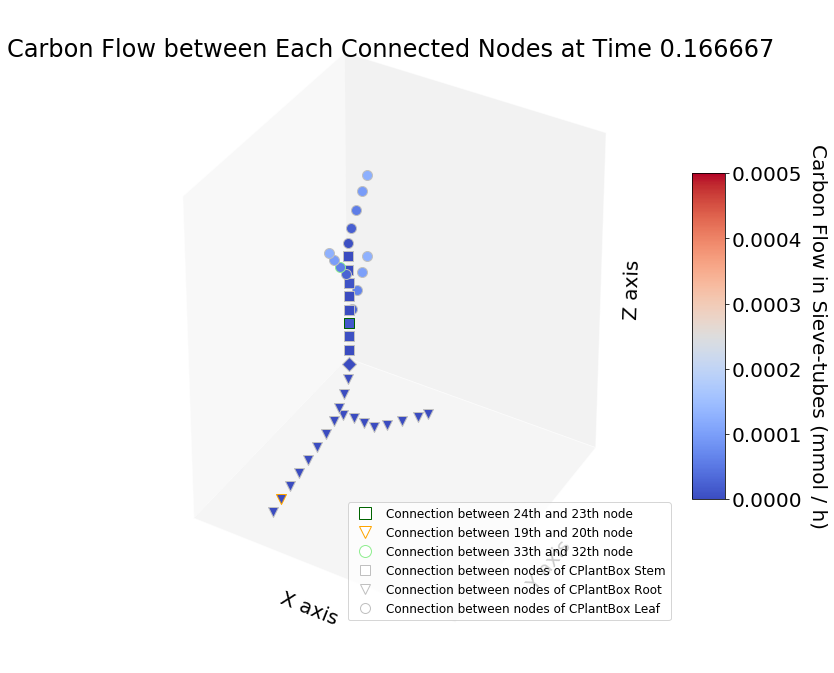

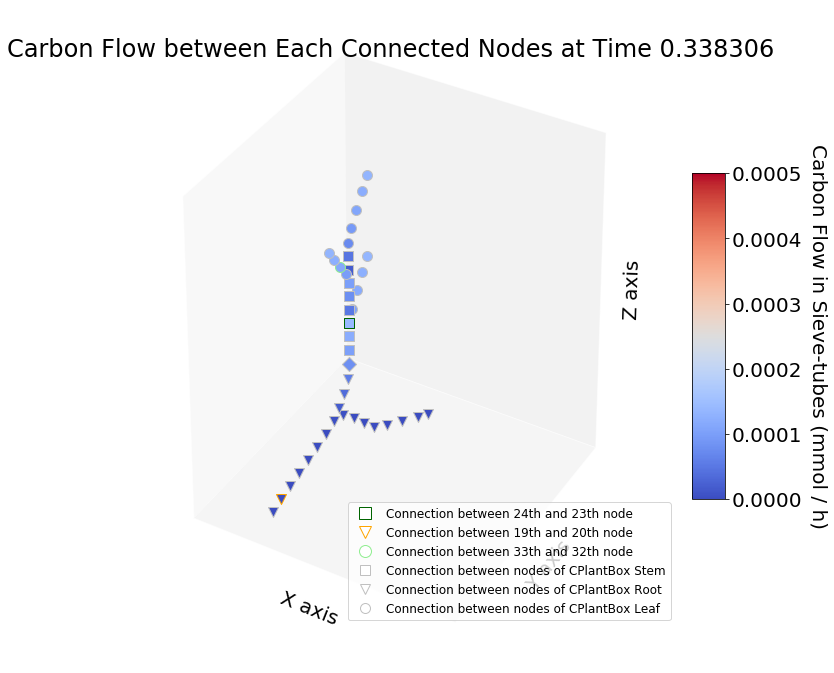

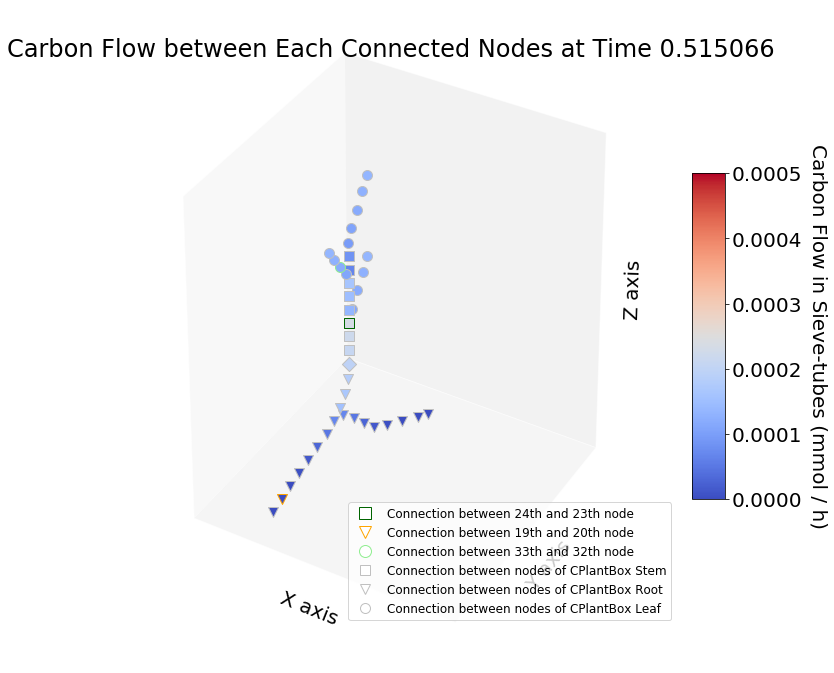

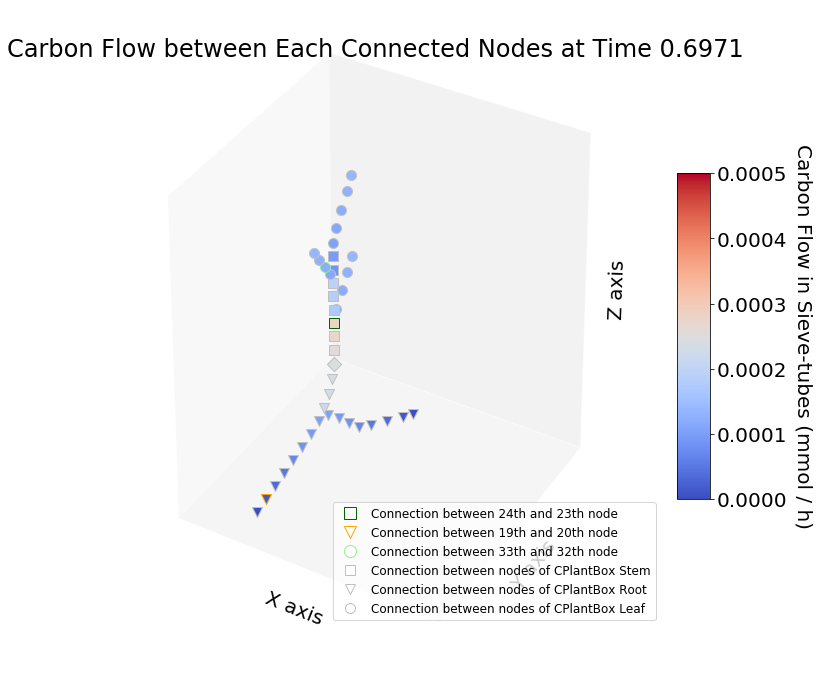

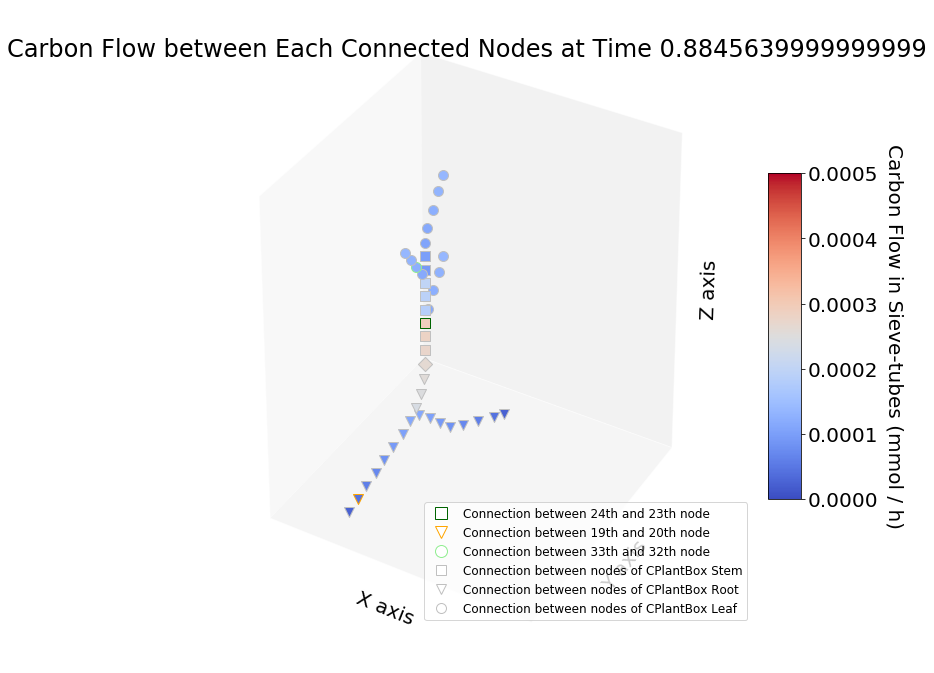

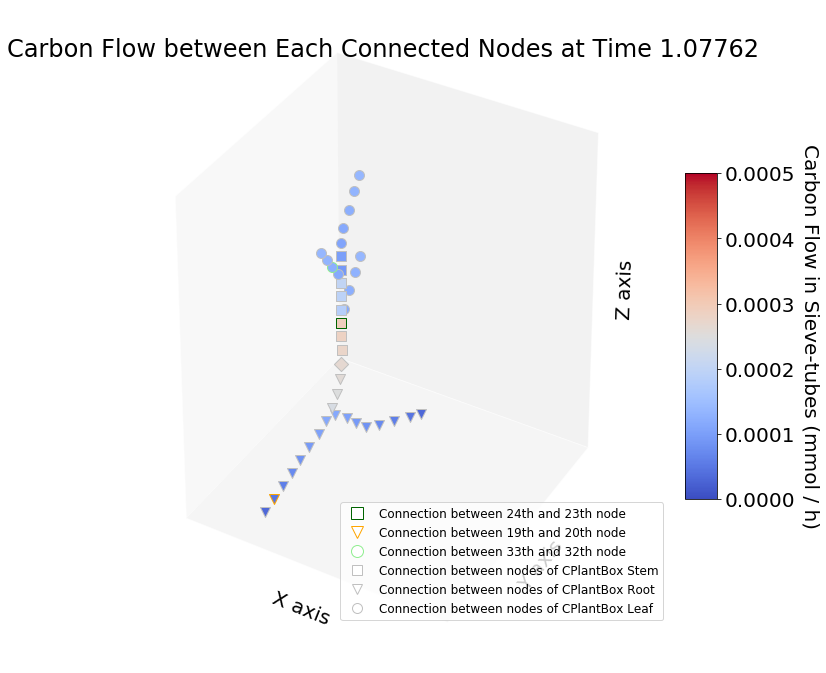

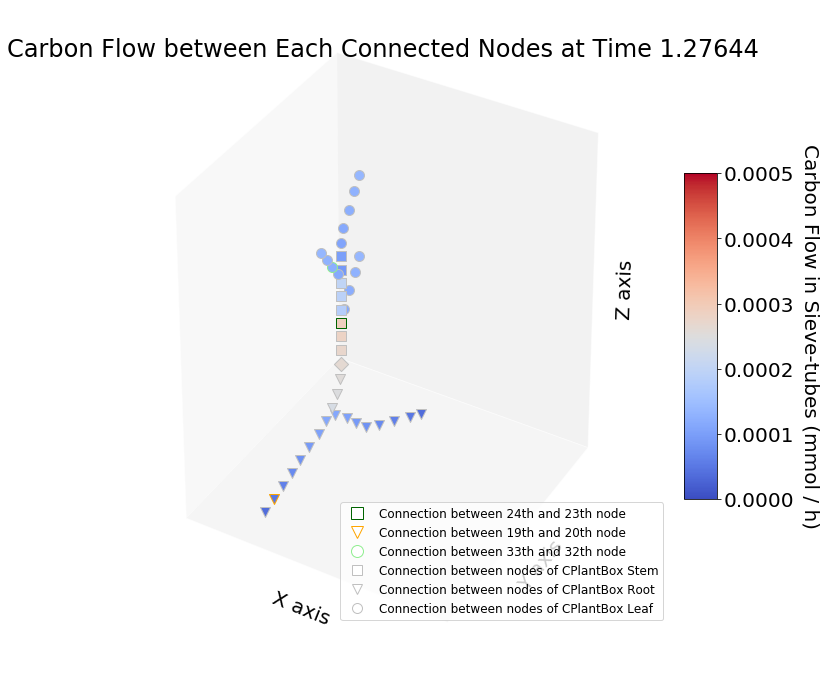

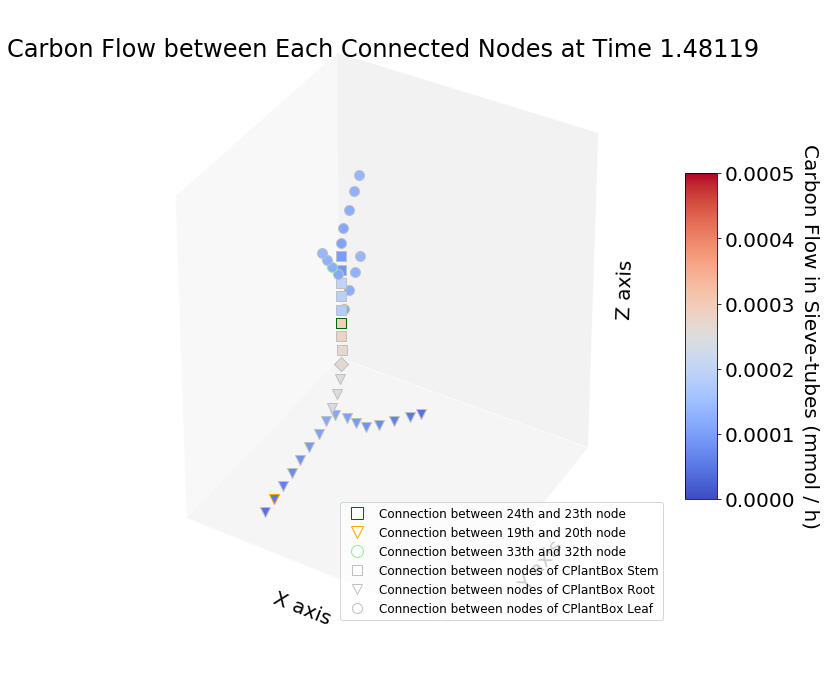

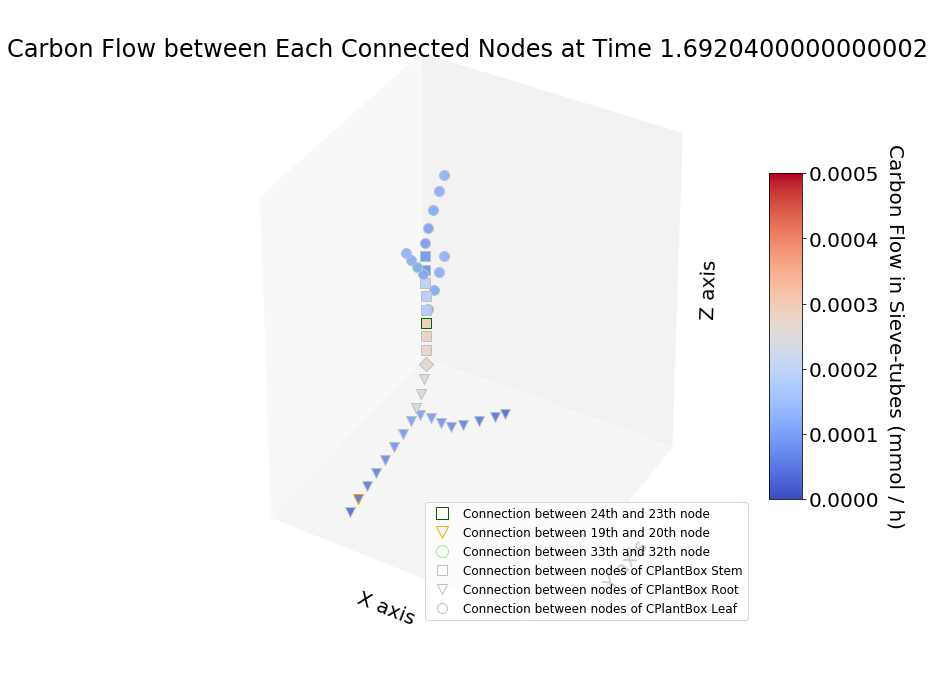

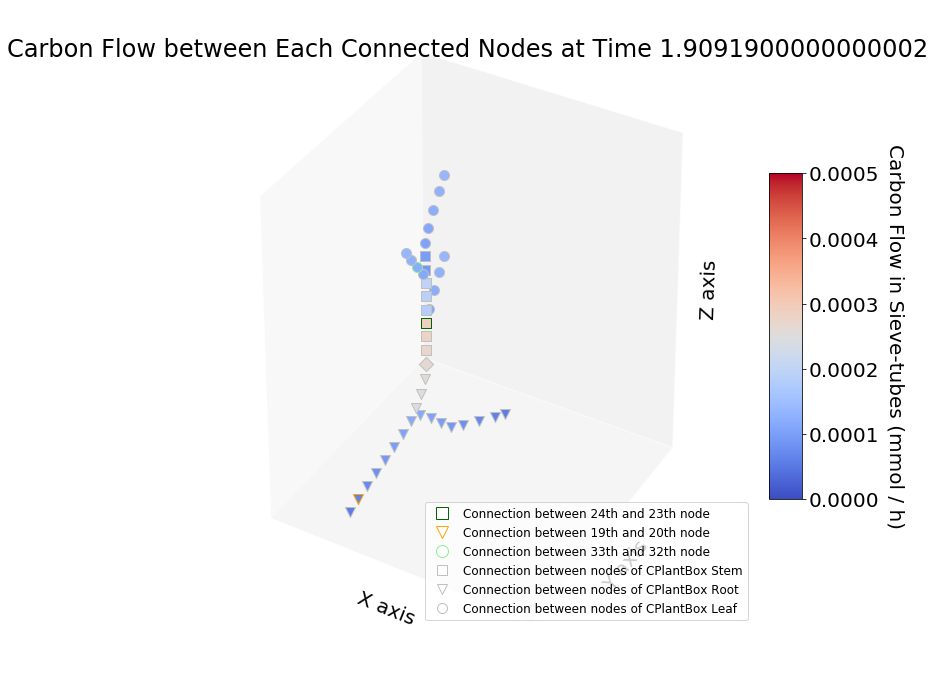

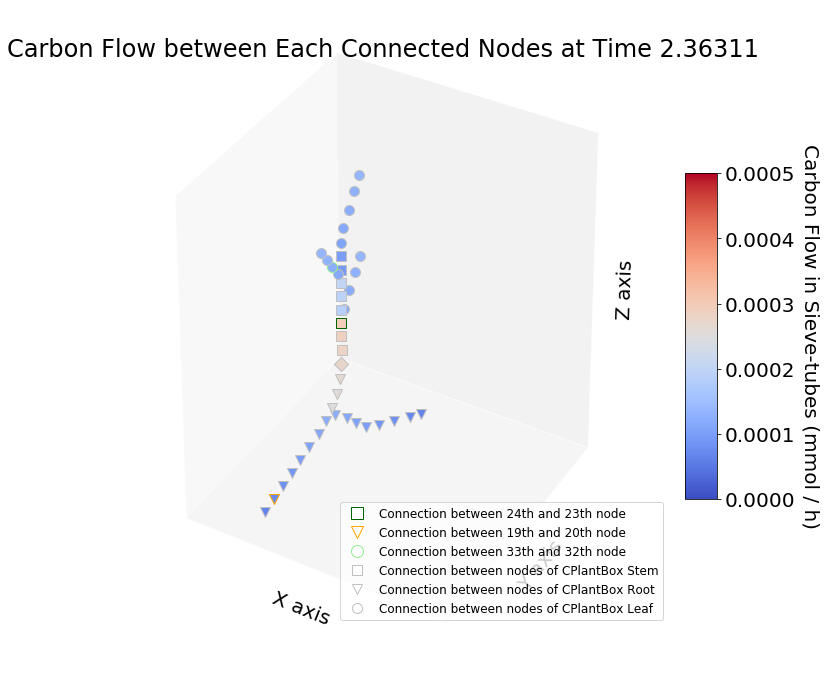

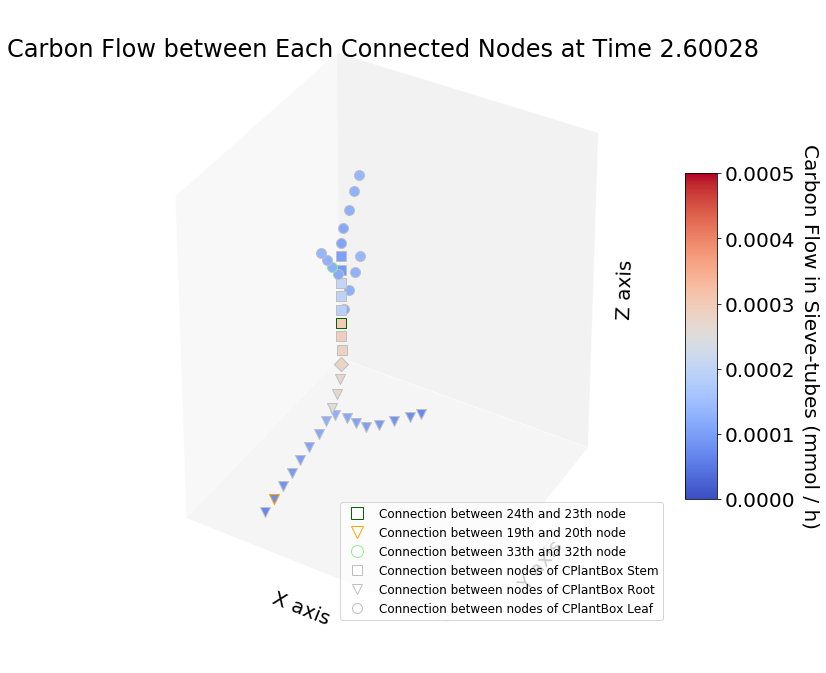

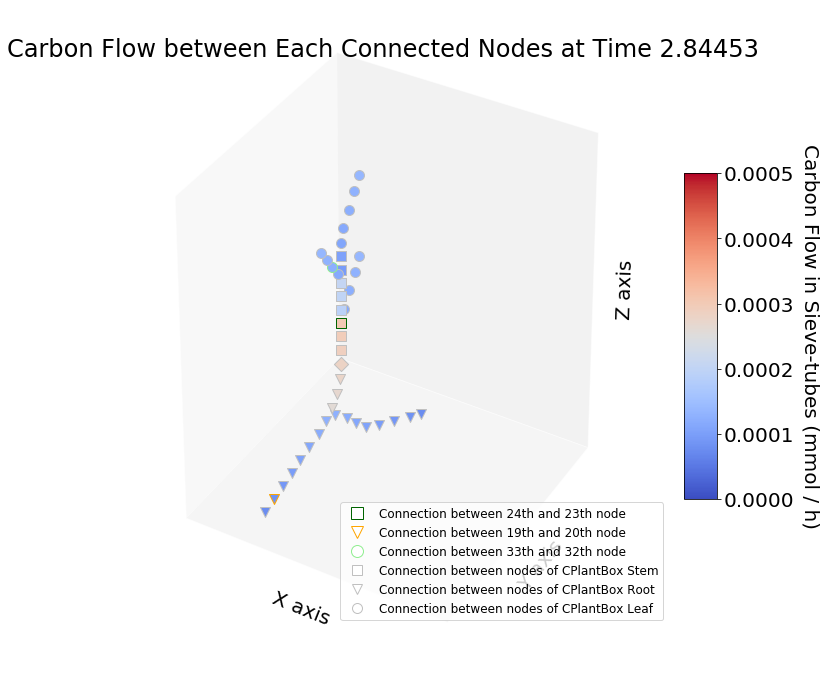

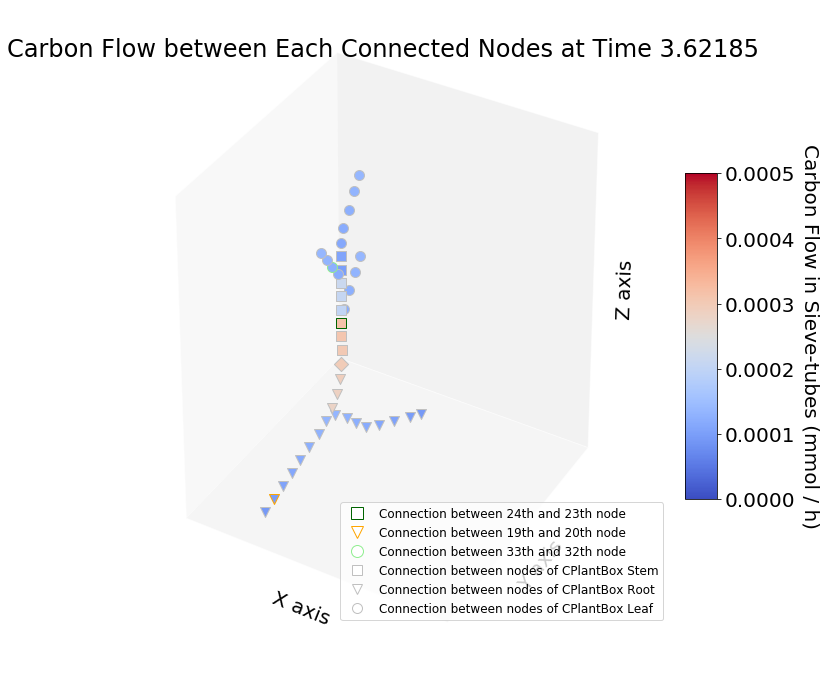

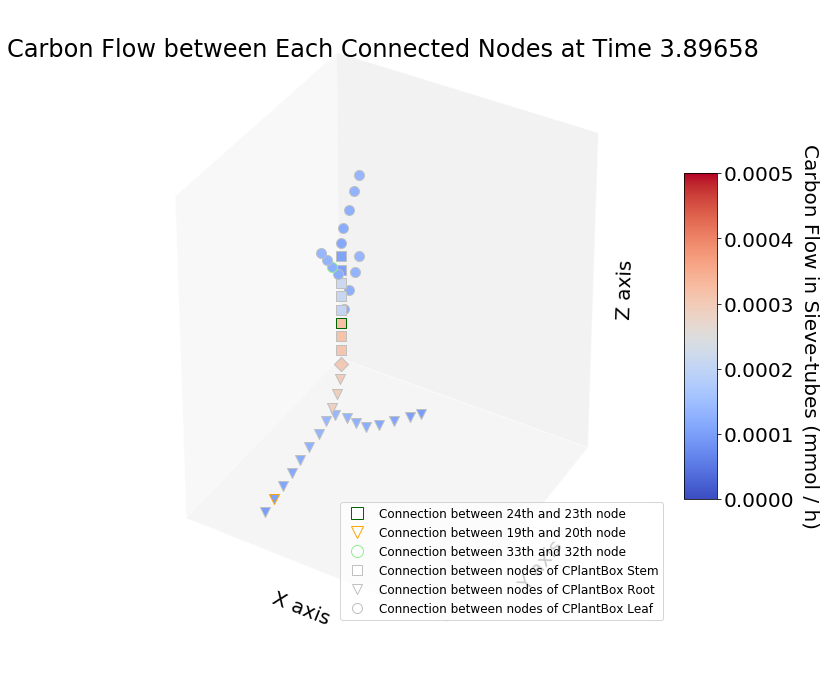

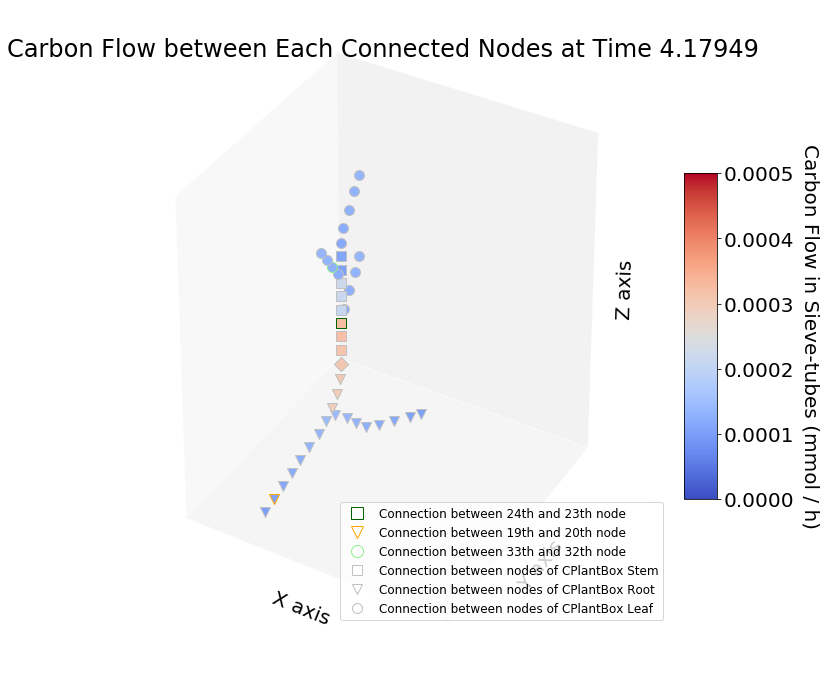

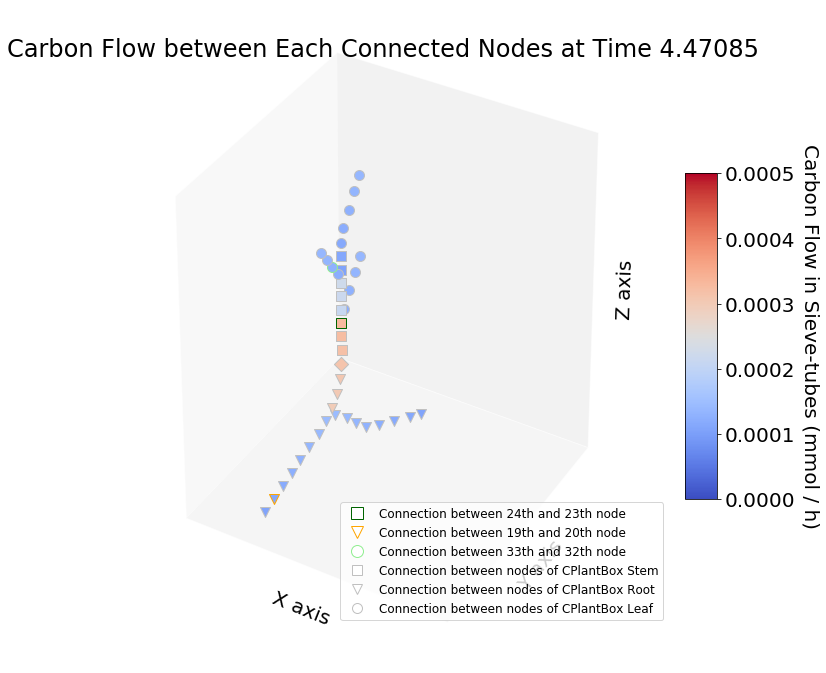

KeyboardInterrupt: 

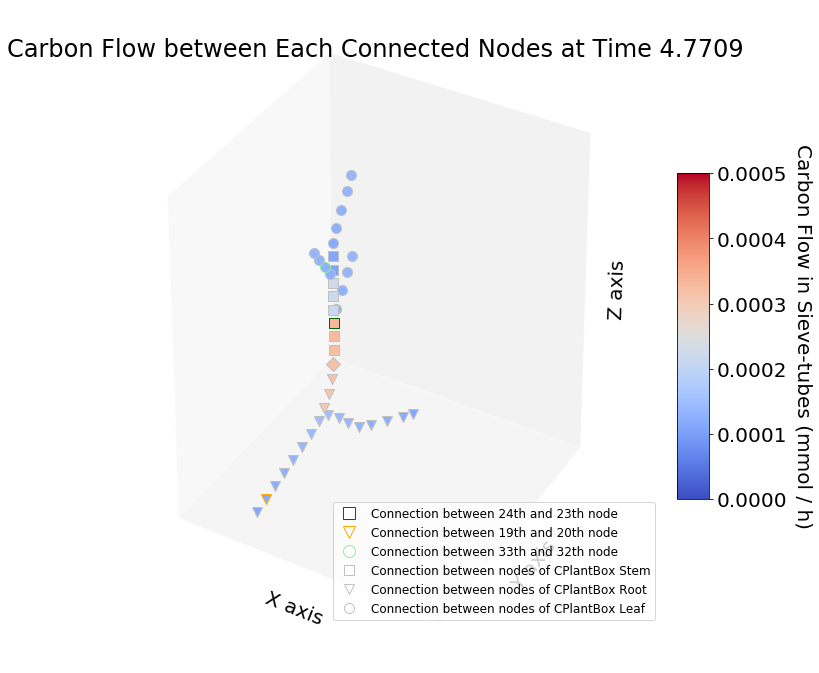

In [492]:

import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
nodes_cor = np.column_stack([nodes_organtype, nodes])

plt.rcParams['figure.figsize'] = [12, 12]
path = 'PiafMunch2_PMA1_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)
JS_ST_begin = (len(node_connection))*34-7
JS_ST_end = JS_ST_begin +(len(node_connection))
output.iloc[100, JS_ST_begin:JS_ST_end]

#JS_ST_1_out=output.iloc[2, JS_ST_begin:JS_ST_end]
#JS_ST_1_out_array = JS_ST_1_out.values
def organ_marker(int):
    if int in leaf_nodes:
    #if int == 21: #int is source 
        return 'o'
    elif int in root_nodes : #int is sink
        return 'v'
    elif int == 1 : #int is sink
        return 'D'
    #elif int == 40 :
    elif int in stem_nodes:
        return 's'
    else:
        return 'None'

cor_x =nodes_c_cor[:,0]
cor_y =nodes_c_cor[:,1]
cor_z =nodes_c_cor[:,2]
cor_m = nodes_c_marker[:,0]
    
def organ_color3(int):
    if int == 34: #int is source 
        return 'lightgreen'
    elif int == 10: #int is source 
        return 'orange'
    elif int == 22:
        return 'darkgreen'
    else:
        return 'silver'

for i in range(0,100):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')


    # Get rid of colored axes planes
    # First remove fill
    #ax.set_axis_off()
    # Get rid of the panes
    #ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the spines
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')


    ax.set_xticks([]) 
    ax.set_yticks([]) 
    ax.set_zticks([])

    # Bonus: To get rid of the grid as well:
    ax.grid(False)
    for j in range(41):
        carbonflow = ax.scatter(cor_x[j], cor_y[j],cor_z[j], s=100, marker = organ_marker(node_connection[j,0]) ,edgecolors= organ_color3(j),
                   c=output.iloc[i, JS_ST_begin+j:JS_ST_begin+j+1] , cmap=cm.coolwarm,  
                   alpha=1, vmin=0, vmax=0.0005)
        
    #connectionflow = ax.scatter(cor_x, cor_y, cor_z, s=100 , c=output.iloc[i, JS_ST_begin:JS_ST_end] , cmap=cm.coolwarm, alpha=1, vmin=-7e12, vmax=5e12) #vmin = 0, vmax =0.0005

    
    
    plt.rcParams.update({'font.size': 20})

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_xlim3d(0, 0.03)
    ax.set_ylim3d(0.03 ,0)
    ax.set_zlim3d(-0.03,0.02)
    #plt.title('Carbon Flow at Time {:.2f} (Hours)'.format(output.iloc[i, 0]))
    plt.title('Carbon Flow between Each Connected Nodes at Time {:.2f}'.format(output.iloc[i, 0]))

    #ax.elev = 89.9
    #ax.azim = 270.1
    #ax.dist = 8.0
    #ax.view_init(0, 90)
    green_star1 = mlines.Line2D([], [],color='darkgreen', markerfacecolor='white', marker='s', linestyle='',
                          markersize=12, label='Connection between 24th and 23th node')
    orange_cross1 = mlines.Line2D([], [],color='orange', markerfacecolor='white', marker='v', linestyle='',
                              markersize=12, label='Connection between 19th and 20th node')
    lgreen_circle1 = mlines.Line2D([], [],color='lightgreen', markerfacecolor='white', marker='o', linestyle='',
                              markersize=12, label='Connection between 33th and 32th node')
    star1 = mlines.Line2D([], [], color='silver', marker='s', linestyle='',
                              markersize=10,markerfacecolor='white', label='Connection between nodes of CPlantBox Stem')
    cross1 = mlines.Line2D([], [], color='silver', marker='v', linestyle='',
                              markersize=10,markerfacecolor='white', label='Connection between nodes of CPlantBox Root')
    circle1 = mlines.Line2D([], [], color='silver', marker='o', linestyle='',
                              markersize=10, markerfacecolor='white',label='Connection between nodes of CPlantBox Leaf')




    plt.legend(handles=[green_star1,orange_cross1, lgreen_circle1, star1, cross1, circle1],
               bbox_to_anchor=(0.42, 0.245), loc=2, borderaxespad=0., fontsize= 12)

    cbar = fig.colorbar(carbonflow, shrink=0.5, aspect=10 )
    cbar.ax.get_yaxis().labelpad = 25
    #cbar.ax.set_ylabel('Carbon Flow in Sieve Tube (mmol / h)', rotation=270)
    cbar.ax.set_ylabel('Carbon Flow in Sieve-tubes (mmol / h)', rotation=270)
    
    filename='step{:02d}.png'.format(i)
    plt.savefig(filename, dpi=96)
    plt.show()

# Then use image magick (this is bash, not python)
#convert -delay 80 *.png animated_chart.gif



#fig.savefig("{}.pdf".format('JW_ST'), bbox_inches='tight')


#def animate(i):
#    connectionflow.set_c(output.iloc[i, JS_ST_begin:JS_ST_end])  # update the data
#    return connectionflow


# Init only required for blitting to give a clean slate.
#def init():
#    connectionflow.set_c(output.iloc[1, JS_ST_begin:JS_ST_end])
#    return connectionflow

#ani = animation.FuncAnimation(fig, animate, np.arange(1, 100), init_func=init,
#                              interval=25, blit=True)
#plt.show()

In [102]:
JS_ST_begin = (len(node_connection))*37-7
JS_ST_end = JS_ST_begin +(len(node_connection))
output.iloc[100, JS_ST_begin:JS_ST_end]

JW_Xyl (ml / h)[ 1]     3.24185e+12
JW_Xyl (ml / h)[ 2]     3.31291e+12
JW_Xyl (ml / h)[ 3]     3.22409e+12
JW_Xyl (ml / h)[ 4]     1.98952e+12
JW_Xyl (ml / h)[ 5]     1.32339e+12
JW_Xyl (ml / h)[ 6]     1.93623e+12
JW_Xyl (ml / h)[ 7]     1.27898e+12
JW_Xyl (ml / h)[ 8]     1.24345e+12
JW_Xyl (ml / h)[ 9]     1.59872e+11
JW_Xyl (ml / h)[10]     5.81757e+11
JW_Xyl (ml / h)[11]    -8.88178e+09
JW_Xyl (ml / h)[12]     4.30767e+11
JW_Xyl (ml / h)[13]     8.26006e+11
JW_Xyl (ml / h)[14]     1.08802e+12
JW_Xyl (ml / h)[15]     1.85185e+12
JW_Xyl (ml / h)[16]     8.08242e+11
JW_Xyl (ml / h)[17]     7.68274e+11
JW_Xyl (ml / h)[18]     6.08402e+11
JW_Xyl (ml / h)[19]      2.9754e+11
JW_Xyl (ml / h)[20]     7.06102e+11
JW_Xyl (ml / h)[21]     3.64153e+12
JW_Xyl (ml / h)[22]     4.03233e+12
JW_Xyl (ml / h)[23]     3.86358e+12
JW_Xyl (ml / h)[24]     3.90799e+11
JW_Xyl (ml / h)[25]     7.28306e+11
JW_Xyl (ml / h)[26]     1.25677e+12
JW_Xyl (ml / h)[27]    -4.57412e+11
JW_Xyl (ml / h)[28]    -7.72

In [490]:
JS_ST_begin = (len(node_connection))*34-7
JS_ST_end = JS_ST_begin +(len(node_connection))
output.iloc[100, JS_ST_begin:JS_ST_end]

JS_ST (mmol / h)[ 1]     0.00042942
JS_ST (mmol / h)[ 2]    0.000429418
JS_ST (mmol / h)[ 3]    0.000429417
JS_ST (mmol / h)[ 4]    0.000429416
JS_ST (mmol / h)[ 5]    0.000214708
JS_ST (mmol / h)[ 6]    0.000214707
JS_ST (mmol / h)[ 7]    0.000214707
JS_ST (mmol / h)[ 8]    0.000214706
JS_ST (mmol / h)[ 9]    0.000214705
JS_ST (mmol / h)[10]    0.000214705
JS_ST (mmol / h)[11]    0.000214704
JS_ST (mmol / h)[12]    0.000214704
JS_ST (mmol / h)[13]    0.000214707
JS_ST (mmol / h)[14]    0.000214706
JS_ST (mmol / h)[15]    0.000214706
JS_ST (mmol / h)[16]    0.000214705
JS_ST (mmol / h)[17]    0.000214705
JS_ST (mmol / h)[18]    0.000214705
JS_ST (mmol / h)[19]    0.000214704
JS_ST (mmol / h)[20]    0.000214704
JS_ST (mmol / h)[21]      0.0004294
JS_ST (mmol / h)[22]    0.000429402
JS_ST (mmol / h)[23]    0.000429403
JS_ST (mmol / h)[24]     0.00028627
JS_ST (mmol / h)[25]     0.00028627
JS_ST (mmol / h)[26]    0.000286271
JS_ST (mmol / h)[27]    0.000143136
JS_ST (mmol / h)[28]    0.00

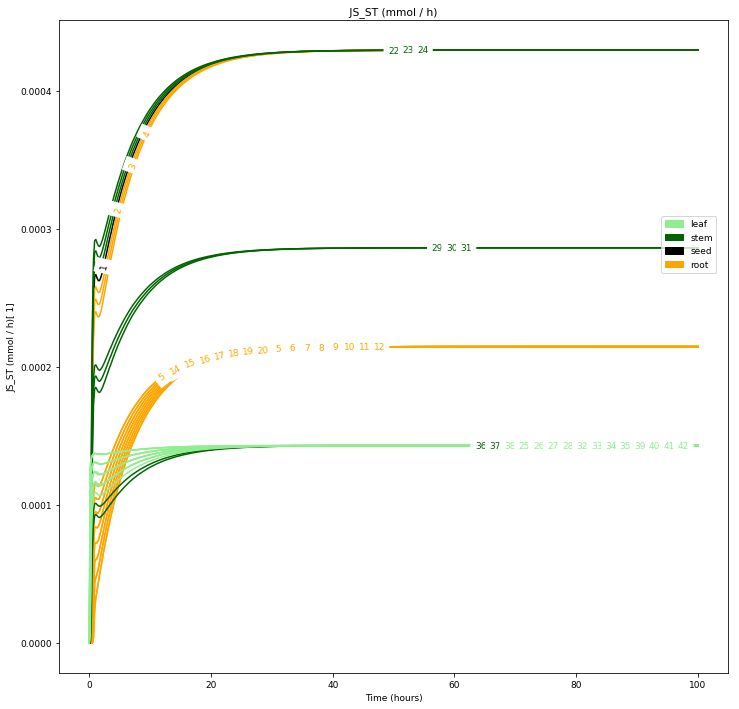

In [78]:


import pandas as pd
path = 'PiafMunch2_PMA1_output.txt'
#pd.read_table(path,sep='\t')
testoutput = pd.read_table(path,sep='\t',header=1)

plt.rcParams['figure.figsize'] = [12, 12]
import numpy as np
i=31
f = plt.figure()
time = np.array(testoutput.iloc[:, 0])
n_begin = (len(node_connection))*i-10
n_end = n_begin +(len(node_connection))
var_all = np.array(testoutput.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.xlabel("Time (hours)")
plt.ylabel("{}".format(output.columns[n_begin]))
plt.title(" {:.16s} ".format(output.columns[n_begin]))

def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'orange'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'black'
def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
    
for i in range(len(np.transpose(y))):
    plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(node_connection[i,0]),
    c=organ_color(node_connection[i,0]),alpha=1)
    #plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(node_connection[i,1]),
    #c=so_si_color(node_connection[i,1]),alpha=1)
root_patch = mpatches.Patch(color='orange', label='root')
seed_patch = mpatches.Patch(color='black', label='seed')
stem_patch = mpatches.Patch(color='darkgreen', label='stem')
leaf_patch = mpatches.Patch(color='lightgreen', label='leaf')
plt.legend(handles=[leaf_patch,stem_patch, seed_patch, root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)

labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=2.5, alpha=1)
plt.rcParams.update({'font.size': 9})
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
f.savefig("{}JS_STcarbonflow1.pdf".format(s), bbox_inches='tight')